In [ ]:
import pandas as pd
sub=pd.read_csv('../input/cnn-models-petfinder/lastVersionXGB.csv')
sub.to_csv('submission.csv', index=False)


# PetFinder !

In [1]:
pip install --upgrade pip


     |████████████████████████████████| 1.6 MB 907 kB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1
Note: you may need to restart the kernel to use updated packages.


In [2]:

!pip install -U tensorflow-text==2.4.1
!pip install -U tensorflow-estimator==2.4.1
!pip install -U tensorflow tensorflow_hub==2.4.1




#libraries
import numpy as np 
import pandas as pd 
import os
import json
import seaborn as sns 
import cv2 
import matplotlib.pyplot as plt
import glob
from wordcloud import WordCloud
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import cohen_kappa_score 
from tabulate import tabulate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans
import tensorflow_hub as hub
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications.vgg16 import preprocess_input
from PIL import Image
from sklearn.cluster import KMeans
import tensorflow as tf
import tensorflow_text as text
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'
#pd.set_option('display.max_colwidth', -1)


device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

     |████████████████████████████████| 3.4 MB 862 kB/s eta 0:00:01
ERROR: Could not find a version that satisfies the requirement tensorflow-estimator==2.4.1 (from versions: 1.10.6, 1.10.7, 1.10.8, 1.10.9, 1.10.10, 1.10.11, 1.10.12, 1.13.0rc0, 1.13.0, 1.14.0rc0, 1.14.0rc1, 1.14.0, 1.15.0, 1.15.1, 1.15.2, 2.0.0, 2.0.1, 2.1.0rc0, 2.1.0, 2.2.0rc0, 2.2.0, 2.3.0rc0, 2.3.0, 2.4.0rc0, 2.4.0, 2.5.0rc0, 2.5.0, 2.6.0rc0, 2.6.0)
ERROR: No matching distribution found for tensorflow-estimator==2.4.1
     |████████████████████████████████| 458.3 MB 8.7 kB/s  eta 0:00:01     |████████▋                       | 123.5 MB 63.9 MB/s eta 0:00:06     |█████████                       | 128.5 MB 20.5 MB/s eta 0:00:17     |█████████▌                      | 135.9 MB 20.5 MB/s eta 0:00:16     |██████████▏                     | 145.3 MB 20.5 MB/s eta 0:00:16     |██████████████████              | 257.1 MB 53.1 MB/s eta 0:00:04     |███████████████████▎            | 275.4 MB 53.1 MB/s eta 0:00:04     |███████████

# Project Overview


Millions of stray animals suffer on the streets or are euthanized in shelters every day around the world. If homes can be found for them, many precious lives can be saved — and more happy families created.

In this Project i will uncover the Secrets behind pet adoption.

# **Project Goals**

1. **Uncover valueable information:**

    extract insights about what makes pets more likely to be adopted, Find the most important variables that effects AdoptionSpeed.
    
    Opensource, send the insights I gathered to Animal Sheleters in hope that these insights will help save stray pets lives and help find an Home for all Pets (AMEN).
    
    Animal Shelters could use the insights to emphasis Pets profile to maximize their Adoption Speed.
    
    
2. **Build a Model that will manage to predict AdoptionSpeed for Pets and Submit my first Kaggle Competition**

    Build a model that will use the Data provided in this Competition to predict the AdoptionSpeed on the Test data.
    
    
    
3. **Learn New Techniques for Data visualization, Data Cleaning, ML Models, Try out NLP for the first time and most importantly have fun!!!**  
    


# What I Plan to achieve:

1. Using the rest of the not Tabular data - I Plan on using the pictures with CNN to extract features, Use the Description Column to extract sentiment and work with NLP techniques (woho! cant wait to learn something new), Ensembling all the models to improve the test results.

2. Dive Deeper to the data set and gather more insights from the Tabular Data, Images, Description Column. ( I want to find deep insights like which words should we use in the Pet Description)

3. Try out many more versions of handling the data (Data Cleaning and Binning, Feature Selection) aiming to improving the results.

4. Learn and Deploy more Machine Learning models and hyper tuning them.

5. Edit this whole notebook to make it more visually pleasing!

6. Summarize the Insights in a cool PDF\PPT and send it to Animal Shelters.


# Summary 



In this notebook you can find a Big EDA on all the tabular data and Text data followed by 5 models that are being used to predict the adoptionSpeed of each pet.

1. XGBOOST
2. AdaBoost
3. Bert
5. VGG16
5. VGG16 2

In the End of the notebook i will summarize all my findings and insights on how should animal adoption posts improve!





Loading up the CSV Files 


In [3]:
colors = pd.read_csv('../input/petfinder-adoption-prediction/color_labels.csv')
breeds = pd.read_csv('../input/petfinder-adoption-prediction/breed_labels.csv')
states = pd.read_csv('../input/petfinder-adoption-prediction/state_labels.csv')

train_df = pd.read_csv('../input/petfinder-adoption-prediction/train/train.csv')
test_df = pd.read_csv('../input/petfinder-adoption-prediction/test/test.csv')


trainImagesPath = ('../input/petfinder-adoption-prediction/train_images')
testImagesPath = ('../input/petfinder-adoption-prediction/test_images')



# Exploring the Train Tabular Data

seems like we have 24 cols of information about each pet in our dataset.


In [4]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

let's take a SneakPeak into the head of the Dataset to see some values.

In [5]:
train_df.head()

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health  \
0             1          1           2         2           2       1   
1             2          2           3         3           3       1   
2             2          2           1         1           2       1   
3             2          1           1         1           2       1   
4             2          1           2         2           2       1   

   Quantity  Fee  State                         RescuerID  VideoAmt  \
0         1  100  41326  8480853f516546f6cf33aa88cd76c379         0   
1         1    0  41401  3082c7125d8fb66f7dd4bff4192c8b14         0   
2         1    0  41326  fa90fa5b1ee11c86938398b60abc32cb         0   
3         1  150  41401  9238e4f44c71a75282e62f7136c6b240         0   
4         1    0  41326  95481e953f8aed9ec3d16fc4509537e8         0   

                                         Description      PetID  PhotoAmt  \
0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3       1.0   
1  I just found it alone yesterday near my apartm...  6296e909a       2.0   
2  Their pregnant mother was dumped by her irresp...  3422e4906       7.0   
3  Good guard dog, very alert, active, obedience ...  5842f1ff5       8.0   
4  This handsome yet cute boy is up for adoption....  850a43f90       3.0   

   AdoptionSpeed  
0              2  
1              0  
2              3  
3              2  
4              2

# Overview the Dataset columns:

* the DS has two kinds of animals here, Dogs=1 and Cats=2 represented by the Column 'Type', Pets also has a Name column.
* each Pet in the DS has information about it physical apperance, we can see the Columns: Age, Breed, Gender, Color, FurLength and MaturitySize.
* There are some columns concerning the Health status of the pet : Vaccinated, Dewormed, Sterilized and general Health condtion(Healthy, Minor Injury, Serious Injury).
* Fee and local information, some of the pets has a Fee that is required for adoption, we can also see some local info like the State of where the pet in, RescuerID that is a Unique ID of who rescued the pet.
* Some of the pets are tagged along with some Pictures and even Videos! We will be able to take advantage of that and use them with some Computer Vision Models.
* There is a Description field that include free written Text describing the pet, we would be able to analyze some of it with NLP models.


# AdoptionSpeed

Adoption Speed is a column that represent how quickly and if a pet were adopted.

Whenever a Pet were listed in "PetFinder.my" site PetFinder tracked how much time passed till someone adopted the pet.

The values of that column were categorized into 5 time slices.

**0** - Pet was adopted on the same day as it was listed.

**1** - Pet was adopted between 1 and 7 days (1st week) after being listed.

**2** - Pet was adopted between 8 and 30 days (1st month) after being listed.

**3** - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.

**4** - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).





# An Example of a Listing in PetFinder.my 
https://www.petfinder.my/pets/108197/

![](https://i.imgur.com/IxK3VXx.png)

What a Cutie! , Crossing my fingers for him!

#  Exploring the TrainSet - EDA Start



Let's check out the distrubtion of AdoptionSpeed in the DS

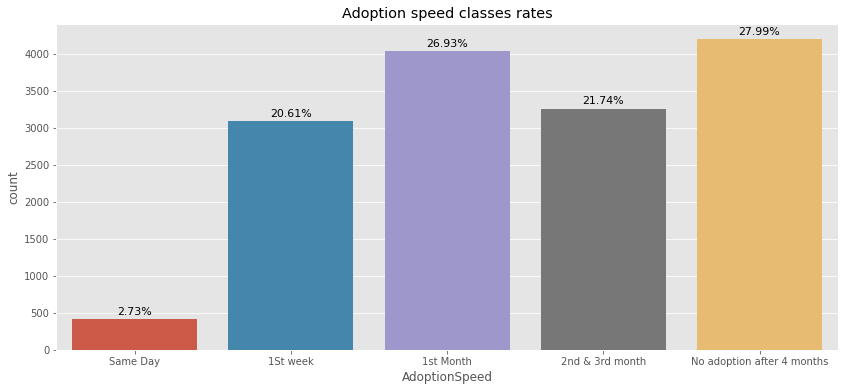

In [6]:
plt.figure(figsize=(14, 6));
g = sns.countplot(x='AdoptionSpeed', data=train_df)
plt.title('Adoption speed classes rates');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / train_df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 8),
         textcoords='offset points')  
ax=ax.set_xticklabels(['Same Day', '1St week','1st Month','2nd & 3rd month','No adoption after 4 months'])


Seems like 28% of the pets werent adopted after 100 Days, that means 72% of the pets were adopted before 100 days.

**From now on i will be reffering to pets who werent adopted after 100 as not adopted to make the notebook more clean**



# correlation Matrix 


there are Many intersting feature to check that stands out in the correlation Matrix!

* Quantity X Gender is not surprsing since Gender 3 is only for More than one pet
* Seems like Dewormed Sterilized and Vaccianted have an high correlection
* we can see that there is a postive correlection between The age of the pet and the adoption Speed (that means older pets are less likely to be adopted :( )
* By looking at the binary adoption df (left heatmap) we can see that small amounts of pictures effects the chances of pet adoption
* People tend to adopt pet's with higher fur length



Text(0.5, 1.0, 'AdoptionSpeed')

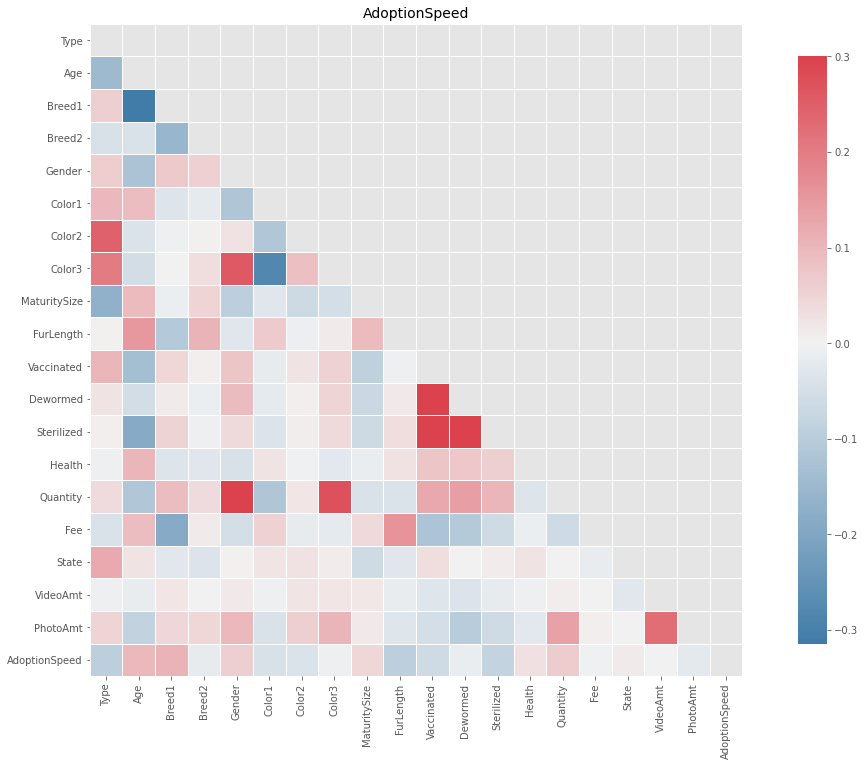

In [7]:
adopted01_df=train_df.copy()
adopted01_df['AdoptionSpeed'].replace(
    to_replace=[ 0, 1, 2 ,3 ],
    value=0,
    inplace=True
)
adopted01_df['AdoptionSpeed'].replace(
    to_replace=[ 4 ],
    value=1,
    inplace=True
)

f, ax1 = plt.subplots(1,1,figsize=(20,12))

corr=train_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(240, 10, as_cmap=True,n=9)




ax1=sns.heatmap(corr, mask=mask, cmap=cmap,  center=0,
            square=True, linewidths=.5,vmax=0.3, cbar_kws={"shrink": .9})
ax1.set_title("AdoptionSpeed",fontsize=14)


# OK, now let's Deep Dive into our Columns data!

# **Dogs Vs Cats** #1 

**How many Dogs and Cats do we have in the Train set?**

We can see that we have 8132 Dogs and 6861 Cats in the Data set, 54% of the Dataset pets are dogs,there is almost a blance between the listings of cats and dogs.

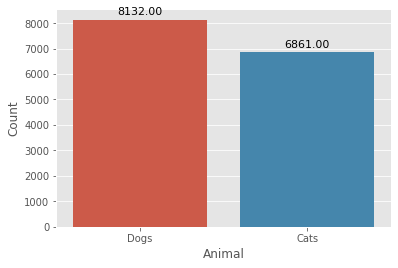

In [8]:
ax = sns.countplot(x="Type", data=train_df)
sns.set(font_scale=1.0)
ax.set(xlabel = 'Animal', ylabel = 'Count')
ax.set_xticklabels(["Dogs","Cats"])
for i,p in enumerate(ax.patches):
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()-80),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                textcoords='offset points')




**Do people Adopt any kind of Pet faster than the other?**

Seems like Cats are adopted more quickly than dogs, We can see 8% difference between adoption of dogs and cats between 1St week and 1St Month.

we can also see that 74% of the Cats were adopted while only 70% of the dogs were adopted

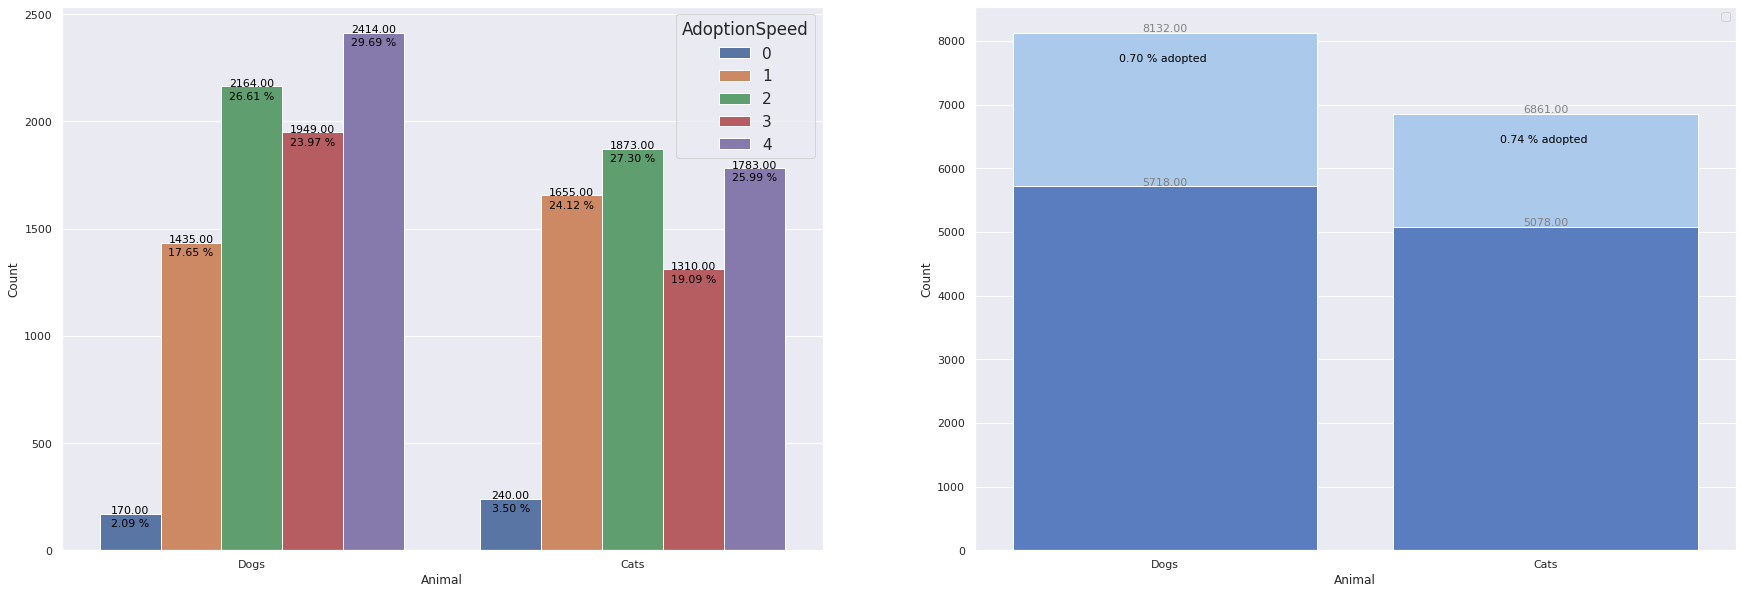

In [9]:
fig, ax = plt.subplots(1,2,figsize=(30,10))
sns.set(font_scale=1.4)
ax[0] = sns.countplot(x="Type",hue='AdoptionSpeed', data=train_df,ax=ax[0])
ax[0].set(xlabel = 'Animal', ylabel = 'Count')
ax[0].set_xticklabels(["Dogs","Cats"])
TypeP=[]

for i in range(1,3):
    TypeP.append((train_df['Type']==i).value_counts()[1])

for i,p in enumerate(ax[0].patches):
    ax[0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()-80),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                textcoords='offset points')
    ax[0].annotate("%.2f %%" % (p.get_height() *100  / TypeP[i%2]) , (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, -10),
         textcoords='offset points')  

plt.legend(title='Adoption Speed', loc='upper left', labels=['Same Day', '1St week','1st Month','2nd & 3rd month','No adoption'])



adopted=train_df[train_df['AdoptionSpeed']<=3]
dogsP=(adopted['Type']==1).value_counts()[1]/(train_df['Type'].value_counts()[1])
catsP=(adopted['Type']==2).value_counts()[1]/(train_df['Type'].value_counts()[2])
precent=[]
precent.append(dogsP)
precent.append(catsP)

sns.set_color_codes("pastel")
ax[1]=sns.countplot(x="Type", data=train_df,color='b',ax=ax[1])
for i,p in enumerate(ax[1].patches):
    ax[1].annotate("%.2f %% adopted " %precent[i]   , (p.get_x() + p.get_width() / 2., p.get_height()-250),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, -10),
                textcoords='offset points')

sns.set_color_codes("muted")
sns.countplot(x="Type", data=adopted, color='b')
sns.set(font_scale=1.0)
ax[1].set(xlabel = 'Animal', ylabel = 'Count')
ax[1].set_xticklabels(["Dogs","Cats"])
heightlist=[]
for p in ax[1].patches:
    ax[1].annotate("%.2f" % p.get_height() , (p.get_x() + p.get_width() / 2., p.get_height()-250),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                textcoords='offset points')
plt.legend()


# Pets with a Name Vs Pets without a Name #2


I wonder if a pet Name can make a difference on it adoptionSpeed.

Suprisngly enough we find out that animals with a name(any name) are adopted at a better rate than animals without a name!

there is a 6.3% difference between having a name or not!

this is an important insights that we discovered and should share with animal shelters!

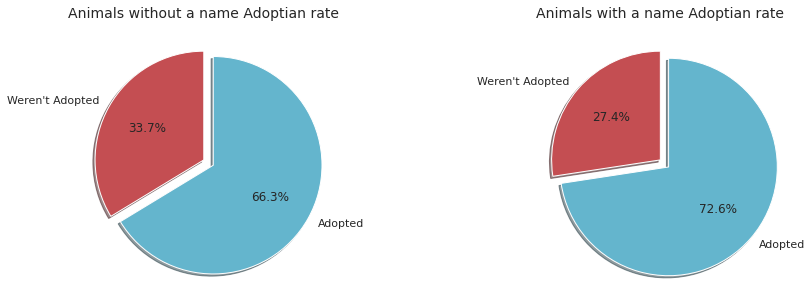

In [10]:
train_df['Name'] =train_df['Name'].fillna('NULL')

noName_df=train_df.copy() #df without any names
noName_df['Name']=noName_df['Name'].replace({"No Name": "NULL", "No Name Yet": "NULL", "Unknown": "NULL", "Baby": "NULL","Lucky": "NULL","Brownie": "NULL","Blackie": "NULL","Puppy": "NULL","Kitty": "NULL","Kittens":"NULL"})
noName_df=noName_df[noName_df['Name']=='NULL']

noName_df['Name'].value_counts()

adoptedNoName=noName_df[noName_df['AdoptionSpeed']<=3]
adoptedNoNameCount=adoptedNoName.count()[1]
adoptedNoNamePercent=adoptedNoNameCount/noName_df.count()[1]

yesName_df=train_df.copy() # df with all the names
yesName_df.drop(yesName_df.index[yesName_df['Name'] == "NULL"], inplace = True)
adoptedYesName=yesName_df[yesName_df['AdoptionSpeed']<=3]
adoptedYesNameCount=adoptedYesName.count()[1]
adoptedYesNamePercent=adoptedYesNameCount/yesName_df.count()[1]

fig1, ax1 = plt.subplots(1,2,figsize=(15,5))
explode = (0, 0.1)
labels = "Weren't Adopted" ,'Adopted'
ax1[0].set_title("Animals without a name Adoptian rate",fontsize=14)
ax1[0].pie([noName_df.count()[1]-adoptedNoNameCount,adoptedNoNameCount], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=['C3','C9'])

ax1[1].set_title("Animals with a name Adoptian rate",fontsize=14)
ax1[1].pie([yesName_df.count()[1]-adoptedYesNameCount,adoptedYesNameCount], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=['C3','C9'])


plt.show()


# Age Distribution by Type #3

Let's checkout how the Age of the pet effects it adoptionSpeed, we can make a guess that the younger the pet the higher adoptionSpeed it has.

We can see that most of the pet's are quite young and there is bumps in the dataset every 12 months, we can make a guess that most of the stray pets doesnt have an exact birth date so people have to make an estimate of their age therefore it easier to estimate in years and not in months.



Text(0.5, 1.0, 'Age distribution')

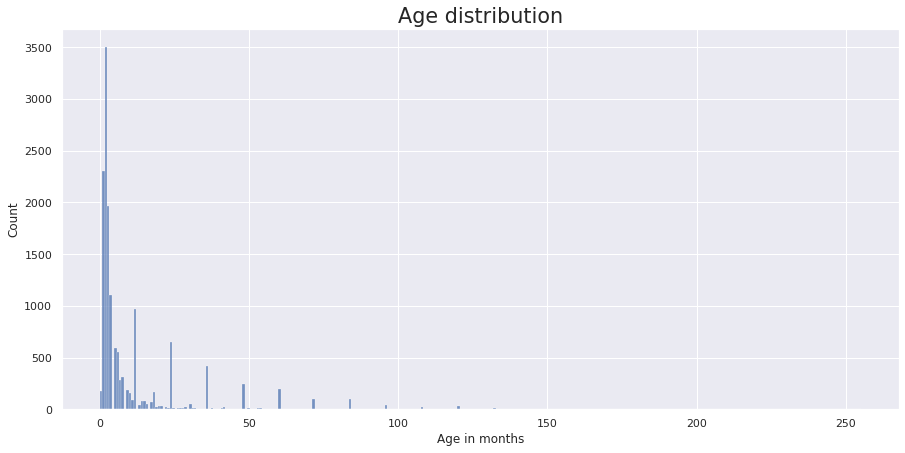

In [11]:
plt.figure(figsize=(15, 7));
sns.set(font_scale=1)
ax = sns.histplot(x="Age", data=train_df)
ax.set(xlabel = 'Age in months', ylabel = 'Count')
plt.title('Age distribution', fontsize = 'xx-large')

Let's remove some of the outliers and Bin the age data to see understand it better, I will use bins of 1-12 months as it is a Puppy phase for dogs and cats, after that the bins will be on year basis, 

**We can see Clearly that the 'No Adoption Bar' for each month except 1-3 is the highest bar :(**

I'm pretty surprised to see that even dogs that are young 1-2 have such a huge bar

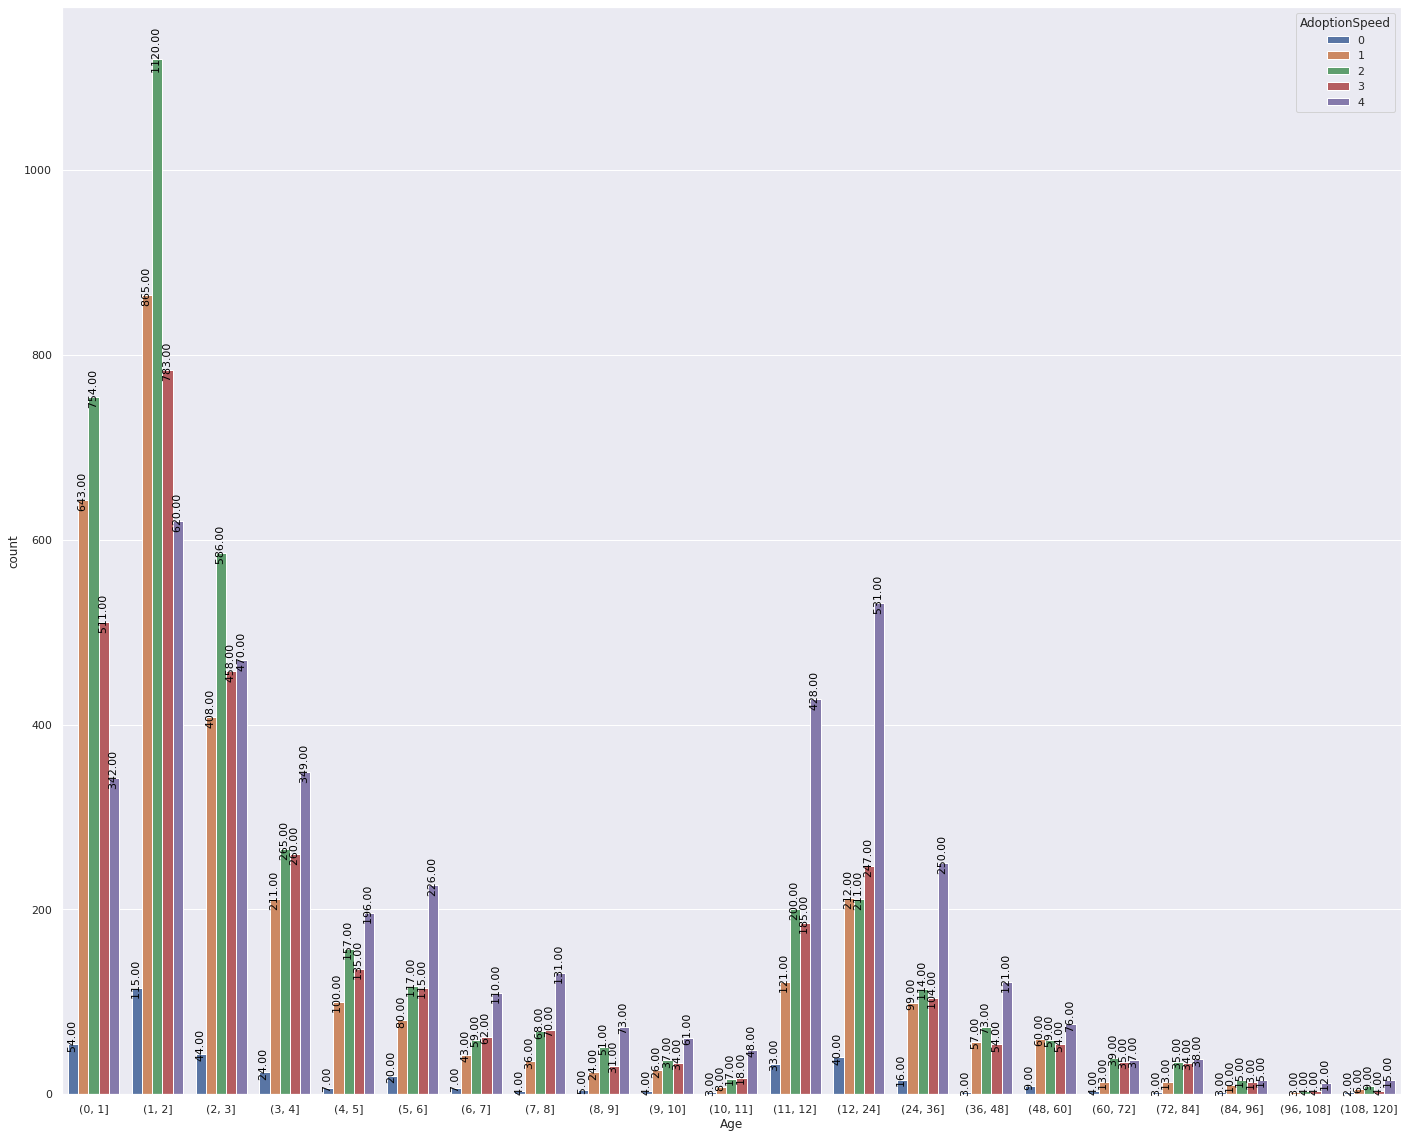

In [12]:
trainAge_df=train_df.copy()

trainAge_df.drop(trainAge_df[trainAge_df['Age'] >121].index, inplace=True)
plt.figure(figsize=(24, 20));

bins =[i  for i in range(0,13)]
for i in range(2,11):
    bins.append(i*12)

trainAge_df['Age'] = pd.cut(trainAge_df['Age'], bins)
ax=sns.countplot(x='Age',hue='AdoptionSpeed',data=trainAge_df)
for i,p in enumerate(ax.patches):
    
    ax.annotate("%.2f " % (p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=90, xytext=(0, 10),
         textcoords='offset points')  

 let's look at the percentage of each bar to get some prespective.

**We can see that the age of the pet has a big effect on the AdoptionRate and speed of the pet**

Younger pet's have better chances of adoption, no surprises here.

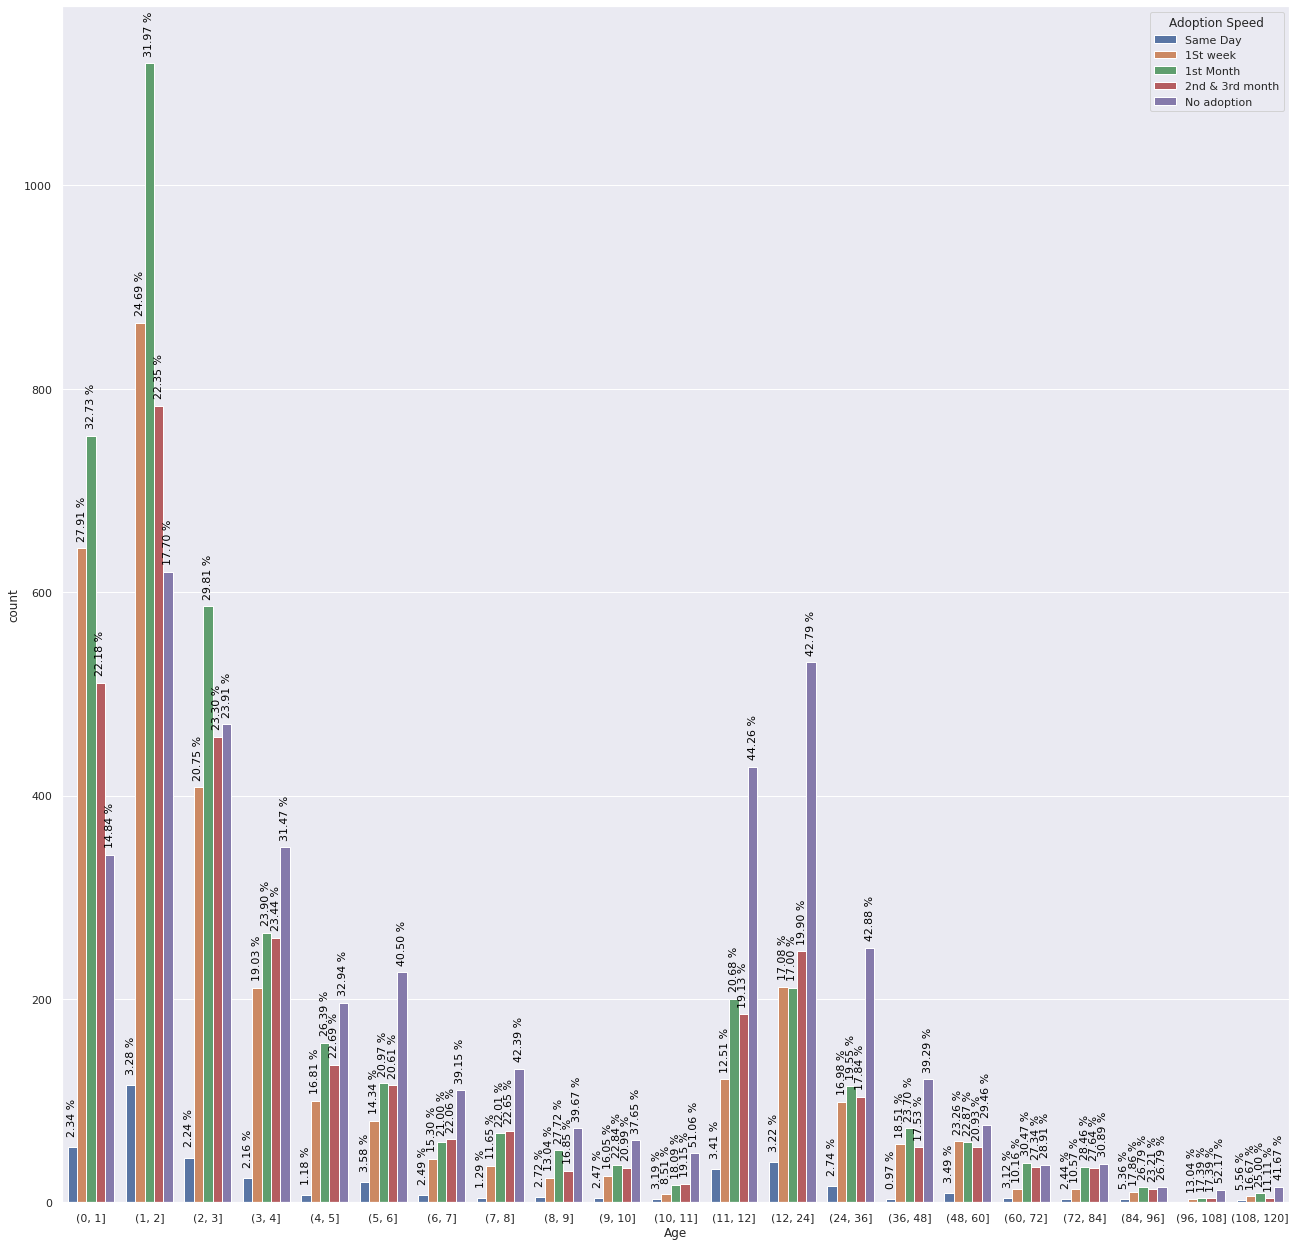

In [13]:
ageP=[]

for i in range(0,12):
    ageP.append((trainAge_df['Age']==pd.Interval(i, i+1, closed='right')).value_counts()[1])
for i in range(1,10):
    ageP.append((trainAge_df['Age']==pd.Interval(i*12, (i+1)*12, closed='right')).value_counts()[1])
    

plt.figure(figsize=(22, 22))
ax=sns.countplot(data=trainAge_df, x="Age",hue='AdoptionSpeed')
plt.legend(title='Adoption Speed', loc='upper right', labels=['Same Day', '1St week','1st Month','2nd & 3rd month','No adoption'])
for i,p in enumerate(ax.patches):
    
    ax.annotate("%.2f %%" % (p.get_height() *100  / ageP[i%21]) , (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=90, xytext=(0, 30),
         textcoords='offset points')  

the past charts were a bit overwhelming, I want to see the data in more simple way, Let's visualize the precentages of Adoption Rate.

seems like pets in age 1-3 has a really low adoption rate, after age 3 the adoptin rate picks up again .

i can guess that the reason behind these adoption rate is that pets in age 1-3 are no longer considered "puppies\kittens" so they are less attractive but do need a lot of attention, compared to older dogs 3+ that considered adults and are more behaved.

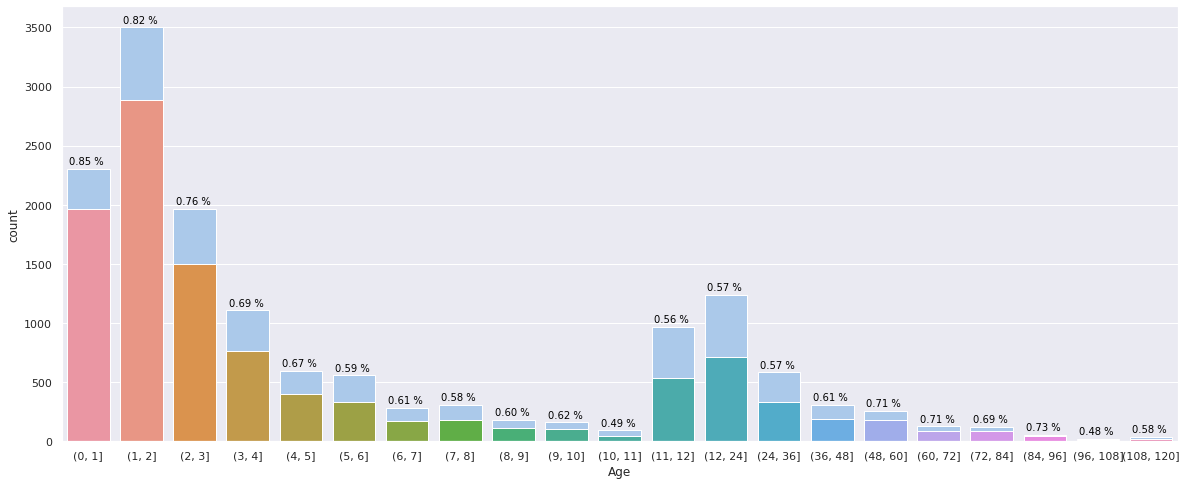

In [14]:
adoptedAge01_df=trainAge_df.copy()

adoptedAge01_df['AdoptionSpeed'].replace(
    to_replace=[ 0, 1, 2 ,3 ],
    value=0,
    inplace=True
)
adoptedAge01_df['AdoptionSpeed'].replace(
    to_replace=[ 4 ],
    value=1,
    inplace=True
)


plt.figure(figsize=(20, 8));

sns.set_color_codes("pastel")
ax=sns.countplot(data=adoptedAge01_df, x="Age",order = adoptedAge01_df['Age'].value_counts().sort_index(ascending =True).index,color='b')
adoptedAge0_df=adoptedAge01_df.loc[adoptedAge01_df['AdoptionSpeed']==0]

df=adoptedAge0_df['Age'].value_counts().sort_index(ascending =True)/adoptedAge01_df['Age'].value_counts().sort_index(ascending =True) # getting the right P%
df=df.to_numpy()

for i,p in enumerate(ax.patches):
    ratio = df[i]
    ax.annotate("%.2f %% " % ratio  , (p.get_x() + p.get_width() / 2., p.get_height()+20),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
sns.set_color_codes("muted")
ax=sns.countplot(data=adoptedAge0_df, x="Age",order = adoptedAge01_df['Age'].value_counts().sort_index(ascending =True).index)

**Let's check the adoption rate per Pet Type:**


we can see that a young age for a dog is more important than a young age for a cat, in the first 3 months dogs had a higher rate of adoption by 9% in totall compared to cats, while cats have a better adoption rate across the later years.

**Age is an important factor for adoptaion speed so that lead me into thinking about making seprate models for dogs and cats, will be sure to check that out.**

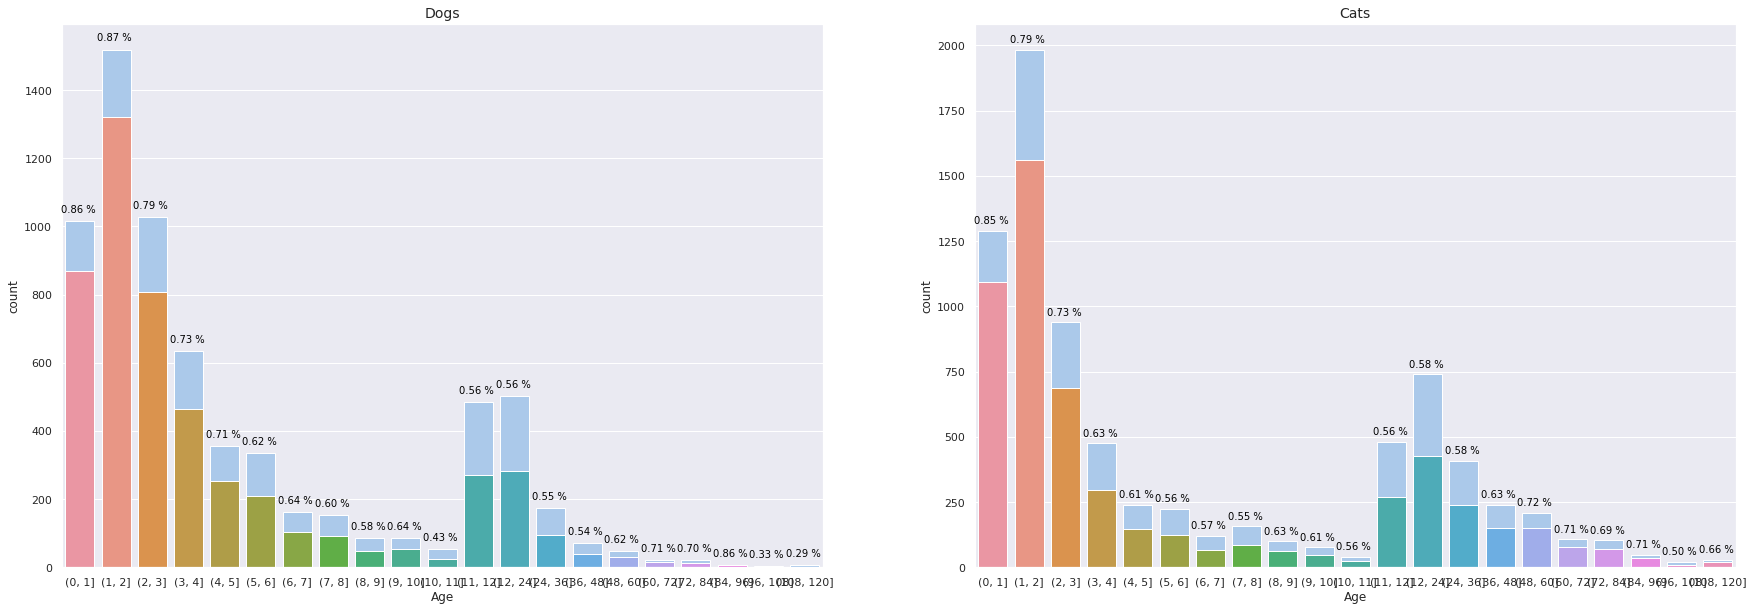

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

In [15]:
fig, ax = plt.subplots(1,2,figsize=(30,10))
ax[0].set_title("Dogs",fontsize=14)
ax[1].set_title("Cats",fontsize=14)

adoptedAge01_df=trainAge_df.copy()

adoptedAge01_df['AdoptionSpeed'].replace(
    to_replace=[ 0, 1, 2 ,3 ],
    value=0,
    inplace=True
)
adoptedAge01_df['AdoptionSpeed'].replace(
    to_replace=[ 4 ],
    value=1,
    inplace=True
)

adoptedAge01_df.drop(adoptedAge01_df[adoptedAge01_df['Type'] ==1].index, inplace=True)

plt.figure(figsize=(20, 8));

sns.set_color_codes("pastel")
ax[0]=sns.countplot(data=adoptedAge01_df, x="Age",order = adoptedAge01_df['Age'].value_counts().sort_index(ascending =True).index,color='b',ax=ax[0])
adoptedAge0_df=adoptedAge01_df.loc[adoptedAge01_df['AdoptionSpeed']==0]



df=adoptedAge0_df['Age'].value_counts().sort_index(ascending =True)/adoptedAge01_df['Age'].value_counts().sort_index(ascending =True) # getting the right P%
df=df.to_numpy()


for i,p in enumerate(ax[0].patches):
    ratio = df[i]
    ax[0].annotate("%.2f %% " % ratio  , (p.get_x() + p.get_width() / 2., p.get_height()+20),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
sns.set_color_codes("muted")
ax[0]=sns.countplot(data=adoptedAge0_df, x="Age",order = adoptedAge01_df['Age'].value_counts().sort_index(ascending =True).index,ax=ax[0])

################# Cats


adoptedAge01_df=trainAge_df.copy()

adoptedAge01_df['AdoptionSpeed'].replace(
    to_replace=[ 0, 1, 2 ,3 ],
    value=0,
    inplace=True
)
adoptedAge01_df['AdoptionSpeed'].replace(
    to_replace=[ 4 ],
    value=1,
    inplace=True
)

adoptedAge01_df.drop(adoptedAge01_df[adoptedAge01_df['Type'] ==2].index, inplace=True)

plt.figure(figsize=(20, 8));

sns.set_color_codes("pastel")
ax[1]=sns.countplot(data=adoptedAge01_df, x="Age",order = adoptedAge01_df['Age'].value_counts().sort_index(ascending =True).index,color='b',ax=ax[1])
adoptedAge0_df=adoptedAge01_df.loc[adoptedAge01_df['AdoptionSpeed']==0]



df=adoptedAge0_df['Age'].value_counts().sort_index(ascending =True)/adoptedAge01_df['Age'].value_counts().sort_index(ascending =True) # getting the right P%
df=df.to_numpy()


for i,p in enumerate(ax[1].patches):
    ratio = df[i]
    ax[1].annotate("%.2f %% " % ratio  , (p.get_x() + p.get_width() / 2., p.get_height()+20),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
sns.set_color_codes("muted")
ax[1]=sns.countplot(data=adoptedAge0_df, x="Age",order = adoptedAge01_df['Age'].value_counts().sort_index(ascending =True).index,ax=ax[1])



# Breed #4


Let's discover the range of Breeds in our dataset!

In [16]:
print(breeds.info())
print(train_df[train_df['Type']==1]['Breed1'].value_counts())
print(train_df[train_df['Type']==2]['Breed1'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BreedID    307 non-null    int64 
 1   Type       307 non-null    int64 
 2   BreedName  307 non-null    object
dtypes: int64(2), object(1)
memory usage: 7.3+ KB
None
307    5923
141     205
205     189
179     167
218     161
       ... 
93        1
85        1
81        1
25        1
99        1
Name: Breed1, Length: 116, dtype: int64
266    3634
265    1258
299     342
264     296
292     264
       ... 
218       1
114       1
257       1
70        1
0         1
Name: Breed1, Length: 68, dtype: int64


Seems like we have 307 different breeds for dogs and cats in total.
checkingout why some breeds have such high numbers and finding out we have some "Mixed" Breeds labels.



In [17]:
print(breeds[breeds['BreedID']==307]['BreedName']) # Mixed Dog
print(breeds[breeds['BreedID']==266]['BreedName']) # Domestic short Hair Cat
print(breeds[breeds['BreedID']==265]['BreedName']) # Domestic Medium Hair Cat
print(breeds[breeds['BreedID']==264]['BreedName']) # Domestic Long Hair Cat


240    Mixed Breed
Name: BreedName, dtype: object
266    Domestic Short Hair
Name: BreedName, dtype: object
265    Domestic Medium Hair
Name: BreedName, dtype: object
264    Domestic Long Hair
Name: BreedName, dtype: object


# Building a Dataframe with more focused breeds section :
1. **Mixed Dogs** -  Dogs with mixed Breed
2. **Pure Dogs** -  Dogs with a pure Breed (taking all different Breeds into one category) 
3. **Pure Cars** - Cats with a Pure Breed
4. **Domestin Short Hair Cats** - Domestic short-haired cat is a cat of mixed ancestry—thus not belonging to any particular recognised cat breed
5. **Domestin Medium Hair Cats** 
6. **Domestin  Hair Cats** 

In [18]:

dogBreedsMixed_df=train_df[(train_df['Breed1']==307)& (train_df['Type']== 1)] #this is a df with only the mixed breeds dogs
dogBreedsMixed_df['Breed1']='Mixed Dogs'
dogBreedsPure_df=train_df[(train_df['Breed1']!=307) & (train_df['Type']== 1)] #this is a df with only the Pure breeds dogs

dogBreedsPure_df['Breed1']='PureDogs'

catBreedsPure_df=train_df[(train_df['Breed1']!=266) & (train_df['Breed1']!=265) & (train_df['Breed1']!=264) & (train_df['Type']== 2)  ] #this is a df with Pure Breeds Cats
catBreedsPure_df['Breed1']='PureCats'

catShortHair_df=train_df[(train_df['Breed1']==266) & (train_df['Type']== 2)]# Domestic Short Hair Cats
catShortHair_df['Breed1']='Domestic Short Hair Cats'
catMediumHair_df=train_df[(train_df['Breed1']==265) & (train_df['Type']== 2)]#Domestic Medium Hair Cats
catMediumHair_df['Breed1']='Domestic Medium Hair Cats'

catLongHair_df=train_df[(train_df['Breed1']==264) & (train_df['Type']== 2)]# Domestic Long Hair Cats
catLongHair_df['Breed1']='Domestic Long Hair Cats'


Breeds_df=dogBreedsMixed_df.copy() #combining all dataframes to one 
Breeds_df=Breeds_df.append(dogBreedsPure_df)
Breeds_df=Breeds_df.append(catBreedsPure_df)
Breeds_df=Breeds_df.append(catShortHair_df)
Breeds_df=Breeds_df.append(catMediumHair_df)
Breeds_df=Breeds_df.append(catLongHair_df)


BreedsAdopted_df=Breeds_df[Breeds_df['AdoptionSpeed']<=3] #df of all the adopted animals
BreedsP=BreedsAdopted_df['Breed1'].value_counts() /Breeds_df['Breed1'].value_counts() #get the precent of adoption per Breed



**Seems like PureDogs and Domestic Long Hair Cats are leading in adoptation percentage**

there is a 16% difference in Adoptation percentage between Pure Dogs and Mixed Dogs, that a lot! and a bit sad to be honest...

Text(0.5, 0, 'Breed')

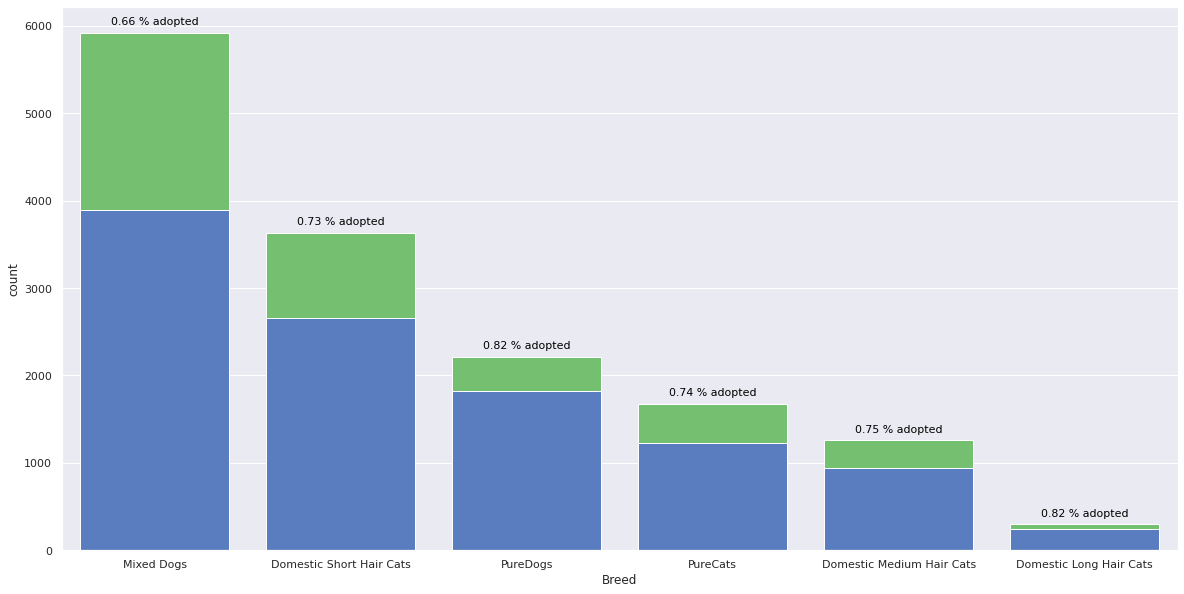

In [19]:
plt.figure(figsize=(20, 10));




ax=sns.countplot(x="Breed1", data=Breeds_df,color='g',order = Breeds_df['Breed1'].value_counts().index)
for i,p in enumerate(ax.patches):
    
    ax.annotate("%.2f %% adopted" % BreedsP[i] , (p.get_x() + p.get_width() / 2., p.get_height()-100),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                textcoords='offset points')

    
ax=sns.countplot(x="Breed1", data=BreedsAdopted_df,color='b',order = Breeds_df['Breed1'].value_counts().index)
plt.xlabel('Breed')

Are there any breeds that are adopted in a better rate?

I will check the Adoption Rate of popular Breeds in our data base.

seems like there are some breeds that can effect the adoption rate even if they are not pure, we will keep the popular breeds information and the less popular breeds will be turned into the value- Mixed dogs .



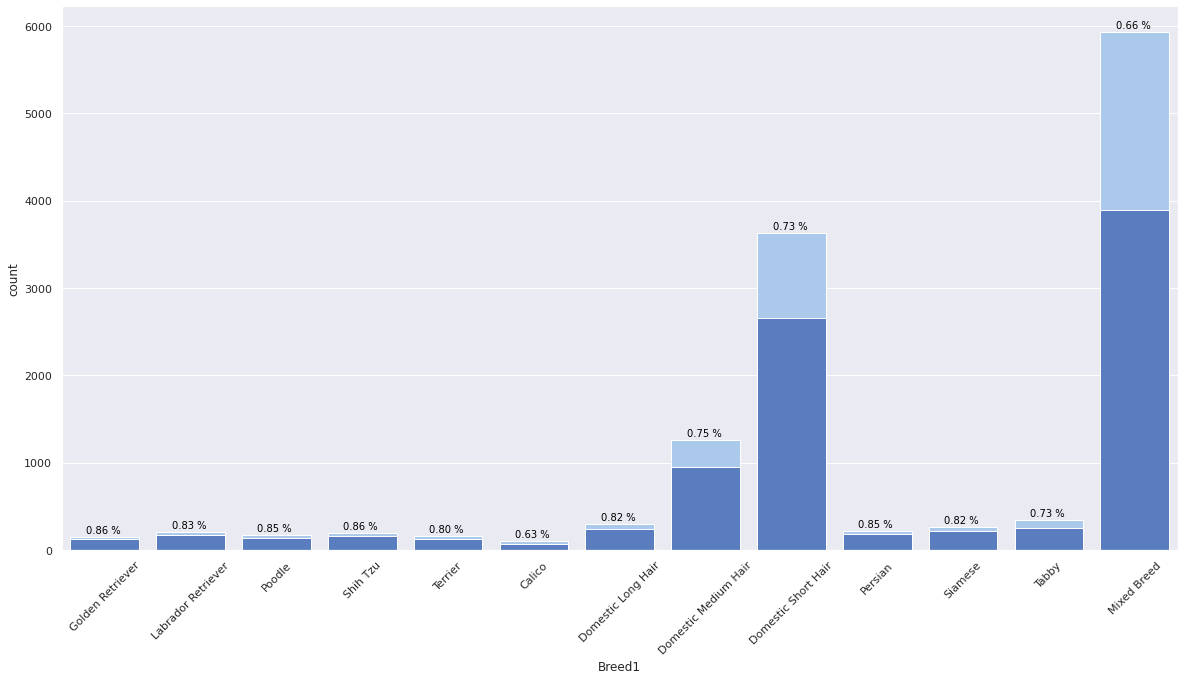

In [20]:
a=train_df.copy()
counts = a['Breed1'].value_counts()
counts[counts>100]
a=a[a['Breed1'].isin(counts[counts > 100].index)]
popBreeds=a['Breed1'].value_counts().index
BreedNames=[]
#for i in popBreeds:
    #print(breeds[breeds['BreedID']==i]['BreedName']) # Mixed Dog
plt.figure(figsize=(20, 10))

    
sns.set_color_codes("pastel")
ax=sns.countplot(data=a, x="Breed1",order = a['Breed1'].value_counts().sort_index(ascending =True).index,color='b')
a0=a.loc[a['AdoptionSpeed']!=4]

df=a0['Breed1'].value_counts().sort_index(ascending =True)/a['Breed1'].value_counts().sort_index(ascending =True) # getting the right P%
df=df.to_numpy()


for i,p in enumerate(ax.patches):
    ratio = df[i]
    ax.annotate("%.2f %% " % ratio  , (p.get_x() + p.get_width() / 2., p.get_height()+20),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
sns.set_color_codes("muted")
ax=sns.countplot(data=a0, x="Breed1",order = a['Breed1'].value_counts().sort_index(ascending =True).index, color='b')

_=ax.set_xticklabels(['Golden Retriever','Labrador Retriever','Poodle','Shih Tzu','Terrier','Calico','Domestic Long Hair','Domestic Medium Hair','Domestic Short Hair',
                   'Persian','Siamese','Tabby','Mixed Breed'],rotation=45)


# Does Gender effects Adoptain speed?#5 

we have 5536 Male Pets, 7277 Female Pets and 2180 Mixed Pets-a group of pets

In [21]:
train_df['Gender'].value_counts()

2    7277
1    5536
3    2180
Name: Gender, dtype: int64

Is there any gender perfernce, does it effects the Adoption Speed?


Males are adopted more quickly than Femals and Groups, we can see that the mass of Male posts is sitting around adoption 1-2 compared to females wher it is 2-4 .

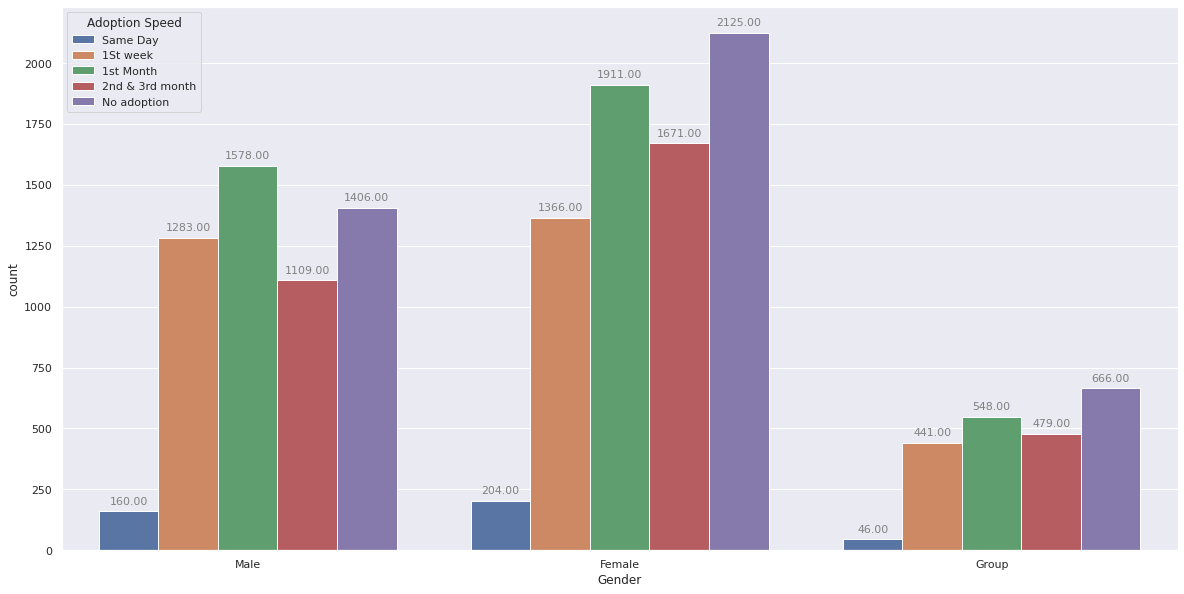

In [22]:
plt.figure(figsize=(20, 10));

ax=sns.countplot(data=train_df, x="Gender", hue="AdoptionSpeed")
ax.set_xticklabels(["Male","Female", "Group"])

plt.legend(title='Adoption Speed', loc='upper left', labels=['Same Day', '1St week','1st Month','2nd & 3rd month','No adoption'])
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height() , (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                textcoords='offset points')
    


Let's look at the adoption rate per gender.

Male Adoption rate is higher in 3.8% than females and 5.2% than groups.

groups are indeed more challenging to adopt, not surprise here, I was thinking groups will have a lower adoption rate!

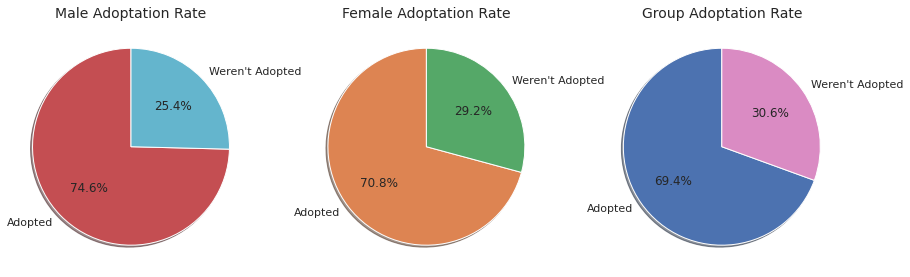

In [23]:
adopted_df=train_df.copy()
adopted_df['AdoptionSpeed'].replace(
    to_replace=[ 0, 1, 2 ,3 ],
    value='Yes',
    inplace=True
)
adopted_df['AdoptionSpeed'].replace(
    to_replace=[ 4 ],
    value='No',
    inplace=True
)
fig1, ax1 = plt.subplots(1,3,figsize=(15,5))
explode = (0, 0.1)
labels = "Adopted" ,"Weren't Adopted"
ax1[0].set_title("Male Adoptation Rate",fontsize=14)
ax1[1].set_title("Female Adoptation Rate",fontsize=14)
ax1[2].set_title("Group Adoptation Rate",fontsize=14)


ax1[0].pie([adopted_df[(adopted_df['Gender']==1) & (adopted_df['AdoptionSpeed']=='Yes')].count()[0],adopted_df[(adopted_df['Gender']==1) & (adopted_df['AdoptionSpeed']=='No')].count()[0]], autopct='%1.1f%%',
        shadow=True, startangle=90,colors=['C3','C9'],labels=labels)

ax1[1].pie([adopted_df[(adopted_df['Gender']==2) & (adopted_df['AdoptionSpeed']=='Yes')].count()[0],adopted_df[(adopted_df['Gender']==2) & (adopted_df['AdoptionSpeed']=='No')].count()[0]], autopct='%1.1f%%',
        shadow=True, startangle=90,colors=['C1','C2'],labels=labels)

ax1[2].pie([adopted_df[(adopted_df['Gender']==3) & (adopted_df['AdoptionSpeed']=='Yes')].count()[0],adopted_df[(adopted_df['Gender']==3) & (adopted_df['AdoptionSpeed']=='No')].count()[0]], autopct='%1.1f%%',
        shadow=True, startangle=90,colors=['C10','C6'],labels=labels)
plt.show()




# Does Color effects Adoptation Speed ? #6

People always say that Black cats or dogs have lower chance of adoption, does it stand with our data?

Well yes and no,

Black pets are dominating the dataset (in terms of sum of posts) and have 72% adoption rate **BUT** Brown and Yellow colors has lower adoption rate of 70%!

while the most liked color is Cream with 77% adoption rate!





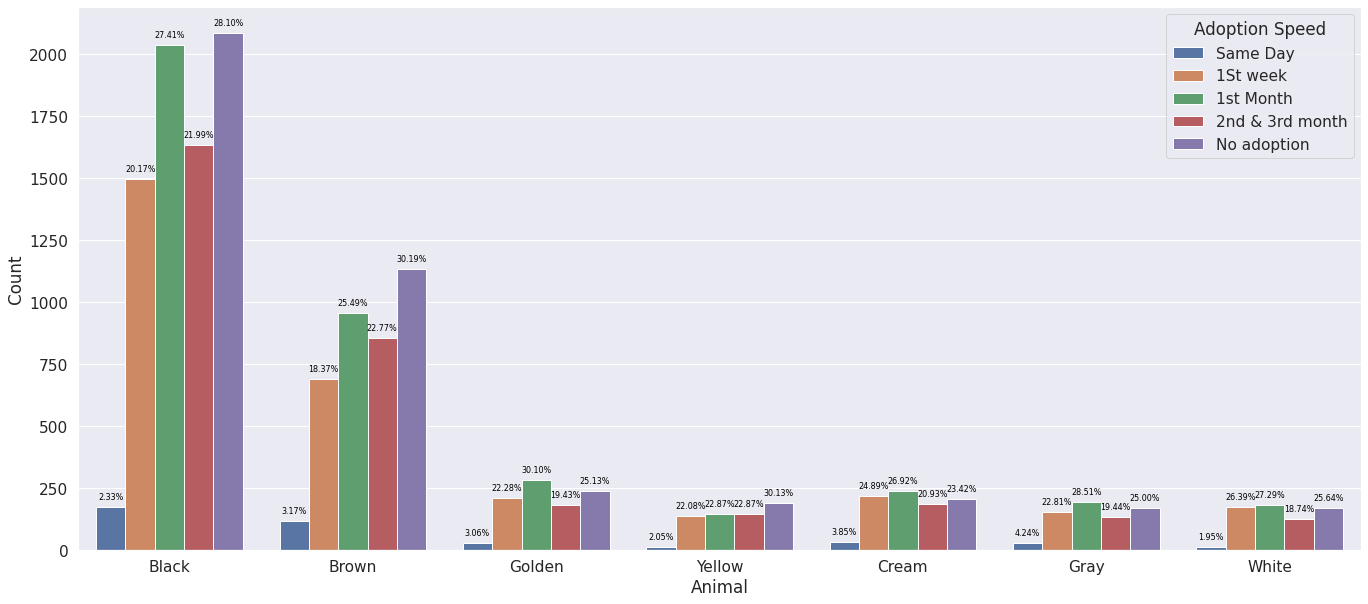

In [24]:



plt.figure(figsize=(23, 10));
sns.set(font_scale=1.4)
ax = sns.countplot(x="Color1",hue='AdoptionSpeed', data=train_df)
ax.set(xlabel = 'Animal', ylabel = 'Count')
ax.set_xticklabels(["Black","Brown","Golden","Yellow","Cream","Gray","White"])
colorP=[]

for i in range(1,8):
    colorP.append((train_df['Color1']==i).value_counts()[1])


for i,p in enumerate(ax.patches):
    ax.annotate("%.2f%%" % (p.get_height() *100  / colorP[i%7]) , (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=8, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')  

plt.legend(title='Adoption Speed', loc='upper right', labels=['Same Day', '1St week','1st Month','2nd & 3rd month','No adoption'])









well colors are important but Golden color cat is different than a Golden Color Dog, let's test the difference when looking and Cats and Dogs separately!



there are some changes between the charts, while cats adoption rate stay somewhat consistent Dogs on the other hand are more effected by the main color.
Brown dogs have 65% adoption rate, compared to 75% in cats.
Yellow Dogs have 59% adoptin rate compare to 74% in cats.





**making two different models for dogs and cats seems reasonable here, i will try that and see if it make sense**

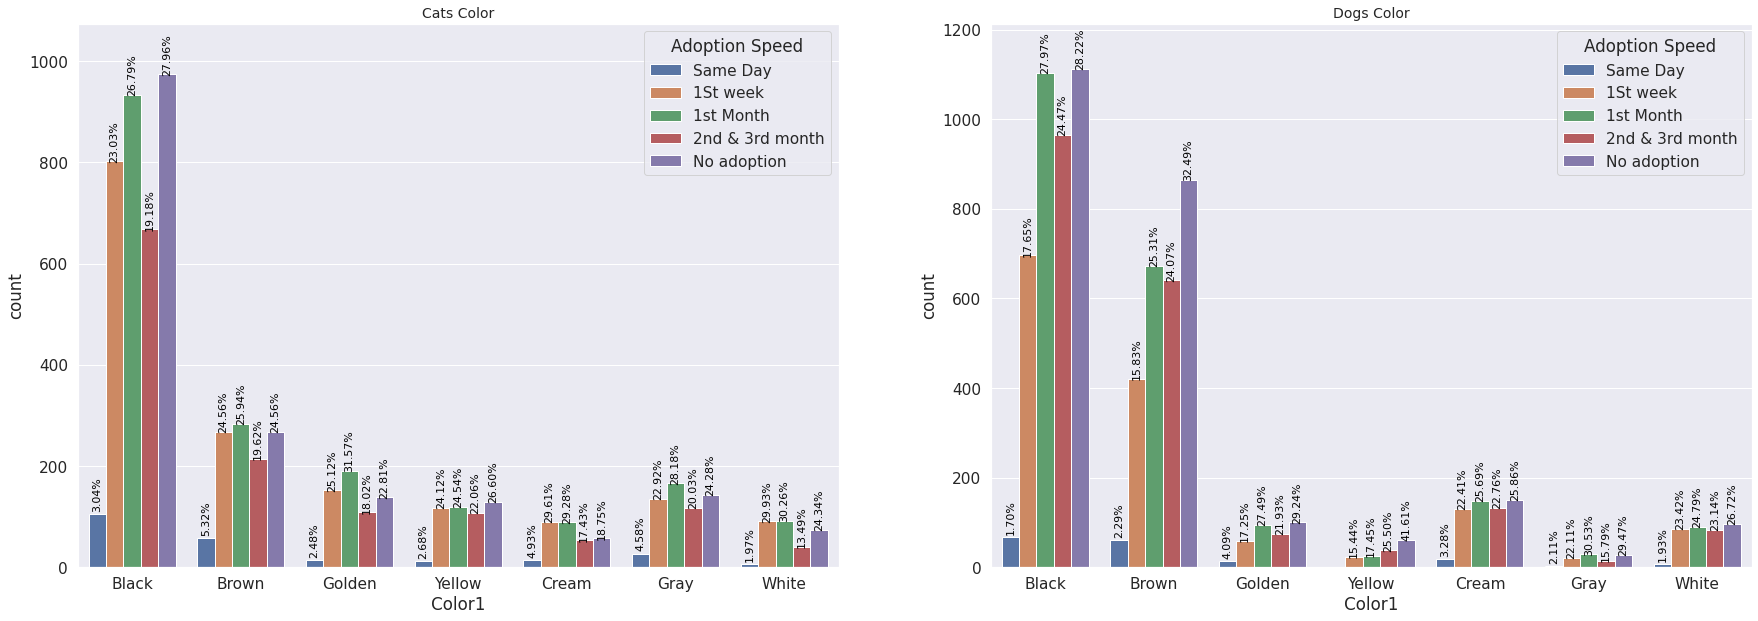

In [25]:

fig, ax = plt.subplots(1,2,figsize=(30,10))
ax[0].set_title("Cats Color",fontsize=14)
ax[1].set_title("Dogs Color",fontsize=14)

trainCats_df=train_df.copy()

trainCats_df.drop(trainCats_df[trainCats_df['Type'] ==1].index, inplace=True)

ax[0]=sns.countplot(data=trainCats_df, x="Color1",hue='AdoptionSpeed',ax=ax[0])
colorP=[]

for i in range(1,8):

    colorP.append((trainCats_df['Color1']==i).value_counts()[1])

max=0
for i,p in enumerate(ax[0].patches):
    
    ax[0].annotate("%.2f%%" % (p.get_height() *100  / colorP[i%7]) , (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=90, xytext=(0, 20),
         textcoords='offset points') 
    if p.get_height()>max:
        max=p.get_height()

ax[0].set_xticklabels(["Black","Brown","Golden","Yellow","Cream","Gray","White"])
ax[0].set_ylim(0,max+100)


###########Dogs
    
trainDogs_df=train_df.copy()
trainDogs_df.drop(trainDogs_df[trainDogs_df['Type'] ==2].index, inplace=True)
    
ax[1]=sns.countplot(data=trainDogs_df, x="Color1",hue='AdoptionSpeed',ax=ax[1])
colorP=[]

for i in range(1,8):
    colorP.append((trainDogs_df['Color1']==i).value_counts()[1])

max=0
for i,p in enumerate(ax[1].patches):
    
    ax[1].annotate("%.2f%%" % (p.get_height() *100  / colorP[i%7]) , (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=90, xytext=(0, 20),
         textcoords='offset points')
    if p.get_height()>max:
        max=p.get_height()
ax[1].set_xticklabels(["Black","Brown","Golden","Yellow","Cream","Gray","White"])
ax[1].set_ylim(0,max+100)


ax[0].legend(title='Adoption Speed', loc='upper right', labels=['Same Day', '1St week','1st Month','2nd & 3rd month','No adoption'])
ax[1].legend(title='Adoption Speed', loc='upper right', labels=['Same Day', '1St week','1st Month','2nd & 3rd month','No adoption'])



**What about Color2 and Color 3?**

for now i will ignore Color2 and Color3 and just use Color1.

It's possible to explore them and make a column that will represent one colored pets and two or tri-colored pets.



# Does MaturitySize effects Adoptation Speed?  #7 
MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)

** most of the pets in our database will mature to a Medium size, (not a surprise because we have cats too in our database)**

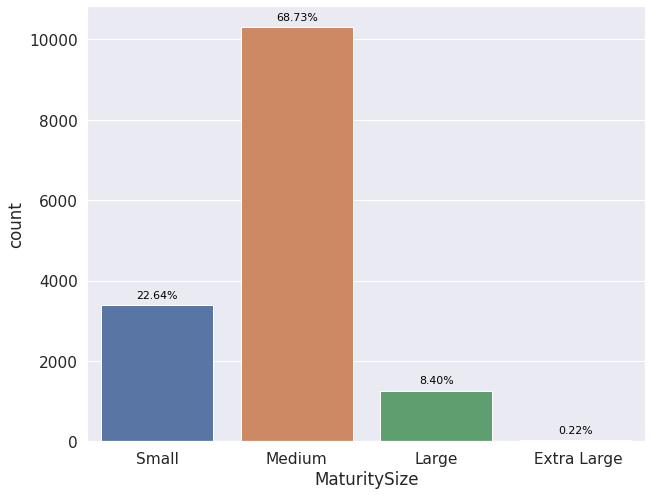

In [26]:

plt.figure(figsize=(10, 8))
ax=sns.countplot(data=train_df, x="MaturitySize")

for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / train_df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')  
ax=ax.set_xticklabels(["Small","Medium", "Large"," Extra Large"])



some people prefer small pets because they are easier to handle, does it shown in our database?

Small Pets have an advantage of 4% adoptation rate from Medium and Large, while extra large have 91% adoption rate, well it doesnt tell us much because Extra large pets are only 0.22% of our database.

[Text(0, 0, 'Small'),
 Text(1, 0, 'Medium'),
 Text(2, 0, 'Large'),
 Text(3, 0, ' Extra Large')]

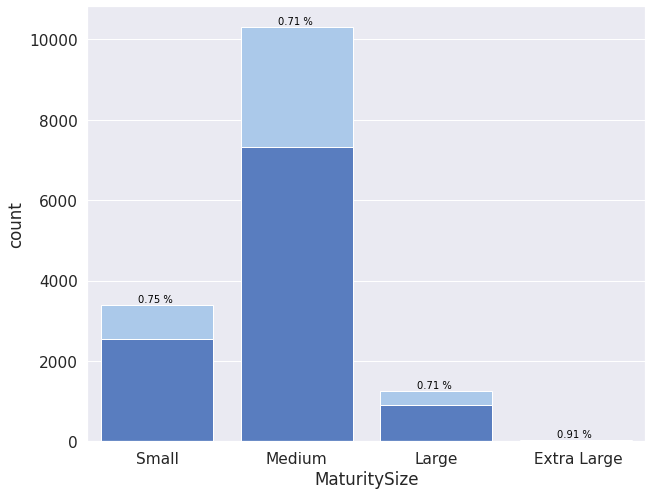

In [27]:
plt.figure(figsize=(10, 8))
adoptedYes_df=adopted_df.loc[adopted_df['AdoptionSpeed']=='Yes'] # all adopted pets

sns.set_color_codes("pastel")
ax=sns.countplot(x="MaturitySize", data=adopted_df, color='b',order = adopted_df['MaturitySize'].value_counts().sort_index(ascending =True).index) #plot all the pets by MaturitySize

df=adoptedYes_df['MaturitySize'].value_counts().sort_index(ascending =True)/adopted_df['MaturitySize'].value_counts().sort_index(ascending =True) # getting the right P%
df=df.to_numpy()

for i,p in enumerate(ax.patches):
    ratio = df[i]
    ax.annotate("%.2f %% " % ratio  , (p.get_x() + p.get_width() / 2., p.get_height()+20),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
        
    
sns.set_color_codes("muted")

sns.countplot(x="MaturitySize", data=adoptedYes_df ,color='b',order = adopted_df['MaturitySize'].value_counts().sort_index(ascending =True).index) # plot only the adopted by MaturitySize

ax.set_xticklabels(["Small","Medium", "Large"," Extra Large"])


around 55.6% small pets are adopted after a month or less

48.2% of Medium sized pets a are dopted after a month or less.

51.7% of Large sized pets are adopted after a month or less.

seems like small pets are adopted faster than the rest.

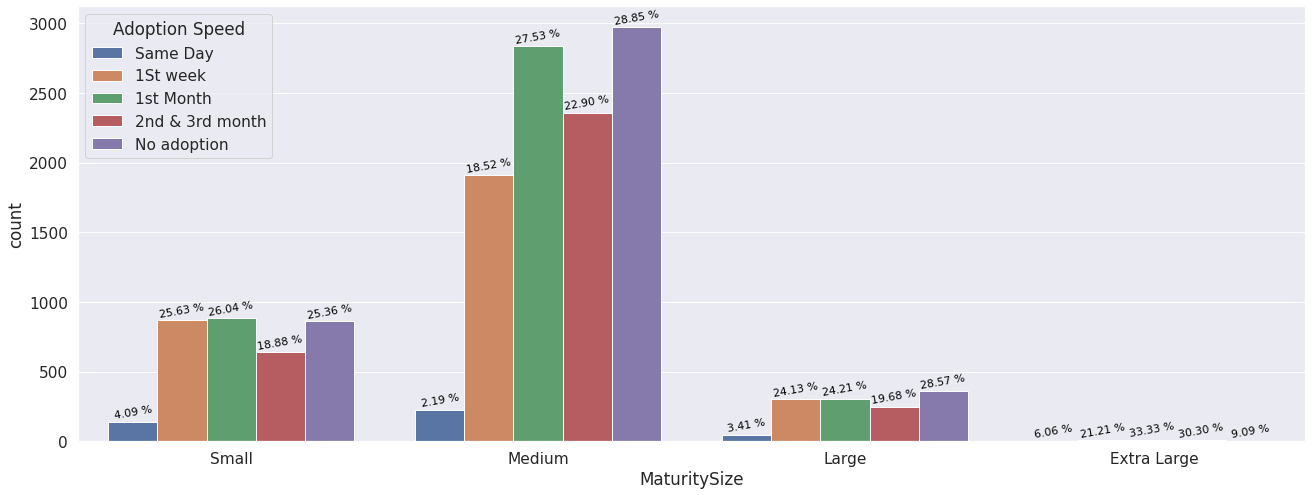

In [28]:
MaturitySizeP=[]
MaturitySizeP.append((train_df['MaturitySize']==1).value_counts()[1])
MaturitySizeP.append((train_df['MaturitySize']==2).value_counts()[1])
MaturitySizeP.append((train_df['MaturitySize']==3).value_counts()[1])
MaturitySizeP.append((train_df['MaturitySize']==4).value_counts()[1])
plt.figure(figsize=(22, 8))
ax=sns.countplot(data=train_df, x="MaturitySize",hue='AdoptionSpeed')
plt.legend(title='Adoption Speed', loc='upper left', labels=['Same Day', '1St week','1st Month','2nd & 3rd month','No adoption'])

ax.set_xticklabels(["Small","Medium", "Large"," Extra Large"])

for i,p in enumerate(ax.patches):
     ax.annotate("%.2f %%" % (p.get_height() *100  / MaturitySizeP[i%4]) , (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=10, xytext=(0, 10),
         textcoords='offset points')  


# Does Fur Length effects adoption Speed? #8


**FurLength** - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)

Fur, The Rival of my IRobot! some people prefer short haired pets and some just want their fav breed, what is the data telling us?


We can see that people prefer Pets with longer hair.


[Text(0, 0, 'Short'), Text(1, 0, 'Medium'), Text(2, 0, 'Long')]

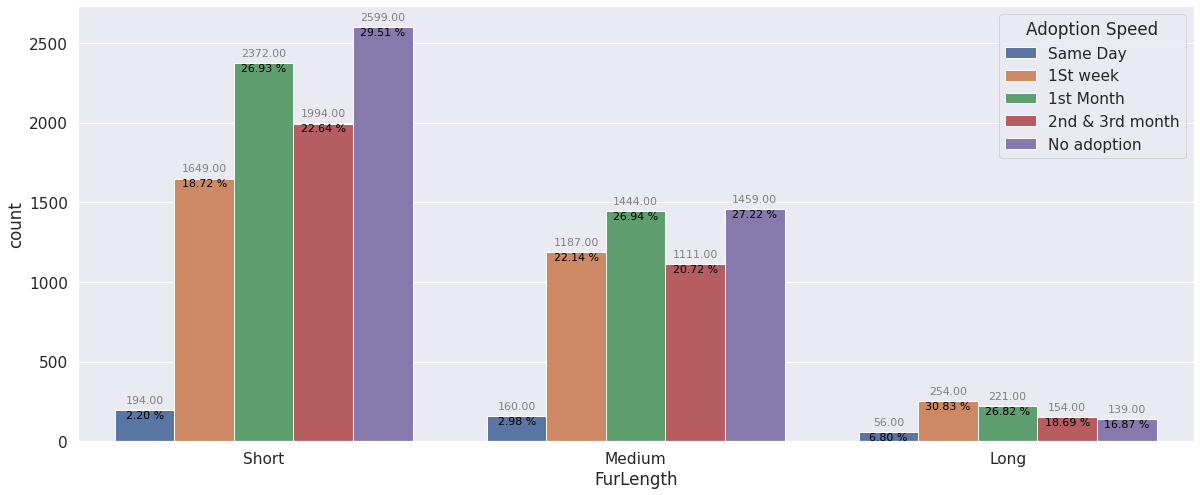

In [29]:

plt.figure(figsize=(20, 8))

ax=sns.countplot(data=train_df, x="FurLength", hue="AdoptionSpeed")
FurLengthP=[]

for i in range(1,4):
    FurLengthP.append((train_df['FurLength']==i).value_counts()[1])


plt.legend(title='Adoption Speed', loc='upper right', labels=['Same Day', '1St week','1st Month','2nd & 3rd month','No adoption'])
for i,p in enumerate(ax.patches):
    ax.annotate("%.2f" % p.get_height() , (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                textcoords='offset points')
    ax.annotate("%.2f %%" % (p.get_height() *100  / FurLengthP[i%3]) , (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, -5),
         textcoords='offset points')  
ax.set_xticklabels(["Short","Medium", "Long"])

  
    



We can see a differnce in adoption Rate per dogs and per Cats, Seems like the fur length on dogs is more important than on cats

[Text(0, 0, 'Short'), Text(1, 0, 'Medium'), Text(2, 0, 'Long')]

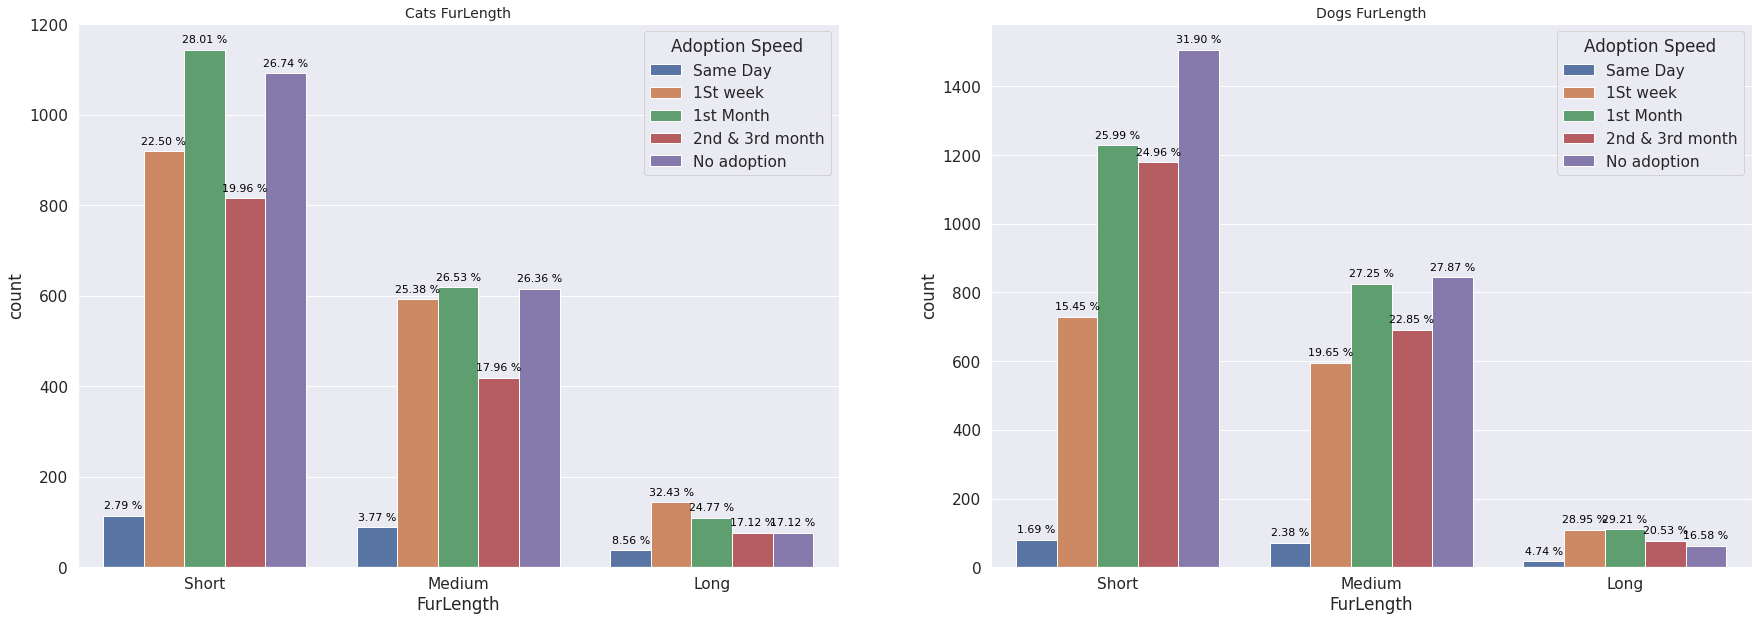

In [30]:

fig, ax = plt.subplots(1,2,figsize=(30,10))
ax[0].set_title("Cats FurLength",fontsize=14)
ax[1].set_title("Dogs FurLength",fontsize=14)

trainCats_df=train_df.copy()

trainCats_df.drop(trainCats_df[trainCats_df['Type'] ==1].index, inplace=True)

ax[0]=sns.countplot(data=trainCats_df, x="FurLength",hue='AdoptionSpeed',ax=ax[0])
FurLengthP=[]

for i in range(1,4):

    FurLengthP.append((trainCats_df['FurLength']==i).value_counts()[1])

for i,p in enumerate(ax[0].patches):
    
    ax[0].annotate("%.2f %%" % (p.get_height() *100  / FurLengthP[i%3]) , (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')  

###########Dogs
    
trainDogs_df=train_df.copy()
trainDogs_df.drop(trainDogs_df[trainDogs_df['Type'] ==2].index, inplace=True)
    
ax[1]=sns.countplot(data=trainDogs_df, x="FurLength",hue='AdoptionSpeed',ax=ax[1])
FurLengthP=[]

for i in range(1,4):
    FurLengthP.append((trainDogs_df['FurLength']==i).value_counts()[1])

for i,p in enumerate(ax[1].patches):
    
    ax[1].annotate("%.2f %%" % (p.get_height() *100  / FurLengthP[i%3]) , (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')  


ax[0].legend(title='Adoption Speed', loc='upper right', labels=['Same Day', '1St week','1st Month','2nd & 3rd month','No adoption'])
ax[1].legend(title='Adoption Speed', loc='upper right', labels=['Same Day', '1St week','1st Month','2nd & 3rd month','No adoption'])
ax[0].set_xticklabels(["Short","Medium", "Long"])
ax[1].set_xticklabels(["Short","Medium", "Long"])




# Health Section 

# Does Vaccinated status effects Adoption Speed? #9

**Vaccinated** - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
seems like pets who are not vaccinated yet get adopted quickly and have higher adoption rate compared to vaccinated pets, that surprisng but maybe it's because of that young pets didnt get vaccinated yet? Let's check that too

[Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'Not Sure')]

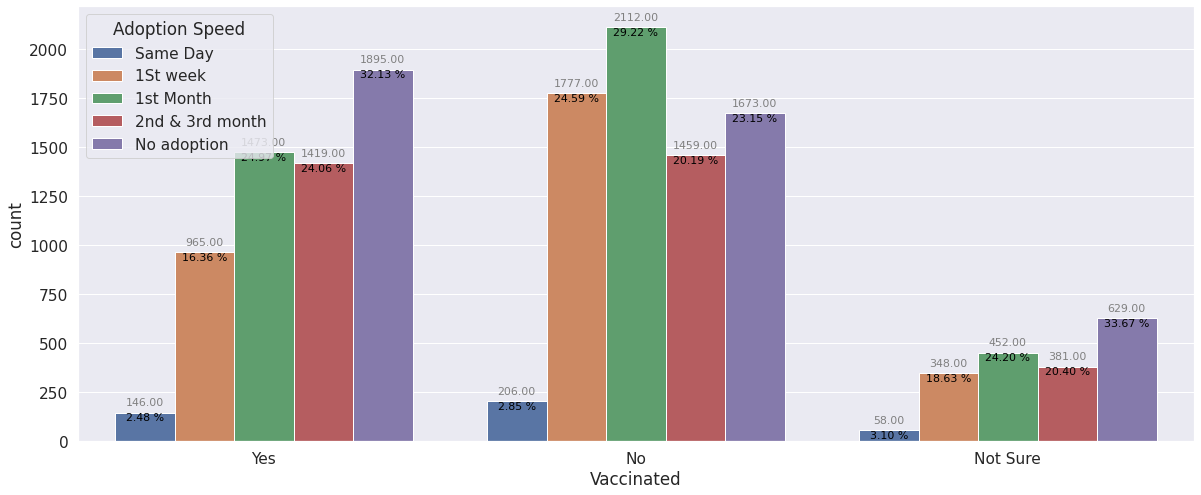

In [31]:

plt.figure(figsize=(20, 8))

ax=sns.countplot(data=train_df, x="Vaccinated", hue="AdoptionSpeed")
FurLengthP=[]

for i in range(1,4):
    FurLengthP.append((train_df['Vaccinated']==i).value_counts()[1])


plt.legend(title='Adoption Speed', loc='upper left', labels=['Same Day', '1St week','1st Month','2nd & 3rd month','No adoption'])
for i,p in enumerate(ax.patches):
    ax.annotate("%.2f" % p.get_height() , (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                textcoords='offset points')
    ax.annotate("%.2f %%" % (p.get_height() *100  / FurLengthP[i%3]) , (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, -5),
         textcoords='offset points')  
ax.set_xticklabels(["Yes","No", "Not Sure"])

  
    



Just as i thought, Younger pets tend to be not Vaccinated yet, we already know that younger pets are adopted more quickly so the information in Vaccinated chart is correlated with the age of the pet, Might drop this col when cleaning the Data

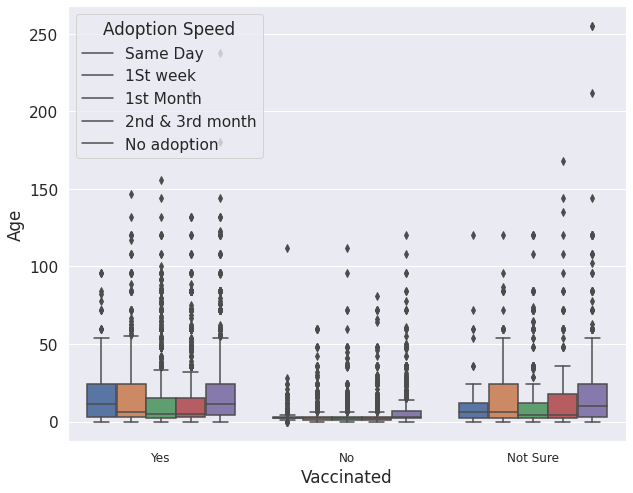

In [32]:
plt.figure(figsize=(10, 8))

ax=sns.boxplot(data=train_df, x="Vaccinated",y='Age',hue='AdoptionSpeed')
ax.set_xticklabels(['Yes','No','Not Sure'], fontsize=12)
ax.legend(title='Adoption Speed', loc='upper left', labels=['Same Day', '1St week','1st Month','2nd & 3rd month','No adoption'])


# Does Dewormed status effects Adoption Speed? #10

Same story here,Just as i thought,  Younger pets tend to be not Dewormed yet, we already know that younger pets are adopted more quickly so the information in Dewormed chart is correlated with the age of the pet, Might drop this col when cleaning the Data

[Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'Not Sure')]

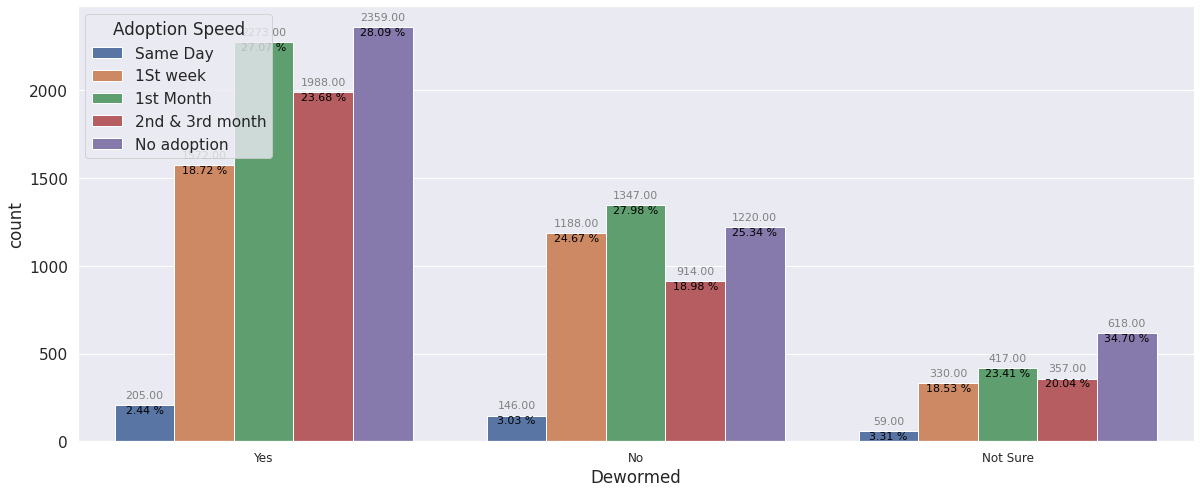

In [33]:

plt.figure(figsize=(20, 8))

ax=sns.countplot(data=train_df, x="Dewormed", hue="AdoptionSpeed")
FurLengthP=[]

for i in range(1,4):
    FurLengthP.append((train_df['Dewormed']==i).value_counts()[1])


plt.legend(title='Adoption Speed', loc='upper left', labels=['Same Day', '1St week','1st Month','2nd & 3rd month','No adoption'])
for i,p in enumerate(ax.patches):
    ax.annotate("%.2f" % p.get_height() , (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                textcoords='offset points')
    ax.annotate("%.2f %%" % (p.get_height() *100  / FurLengthP[i%3]) , (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, -5),
         textcoords='offset points')  

ax.set_xticklabels(['Yes','No','Not Sure'], fontsize=12)

[Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'Not Sure')]

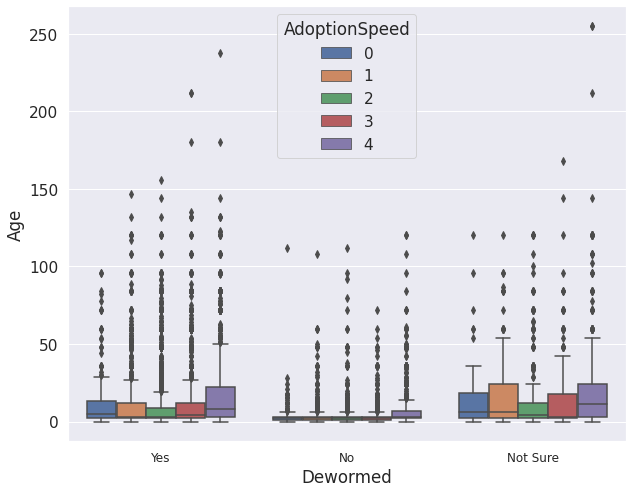

In [34]:
plt.figure(figsize=(10, 8))

ax=sns.boxplot(data=train_df, x="Dewormed",y='Age',hue='AdoptionSpeed')
ax.set_xticklabels(['Yes','No','Not Sure'], fontsize=12)


# Does Sterilized status effects Adoption Speed? #11

We can see here clearly that non Sterilized pets have a big gap in terms of adoption rate and speed, with about 20% adoption rate increase! 



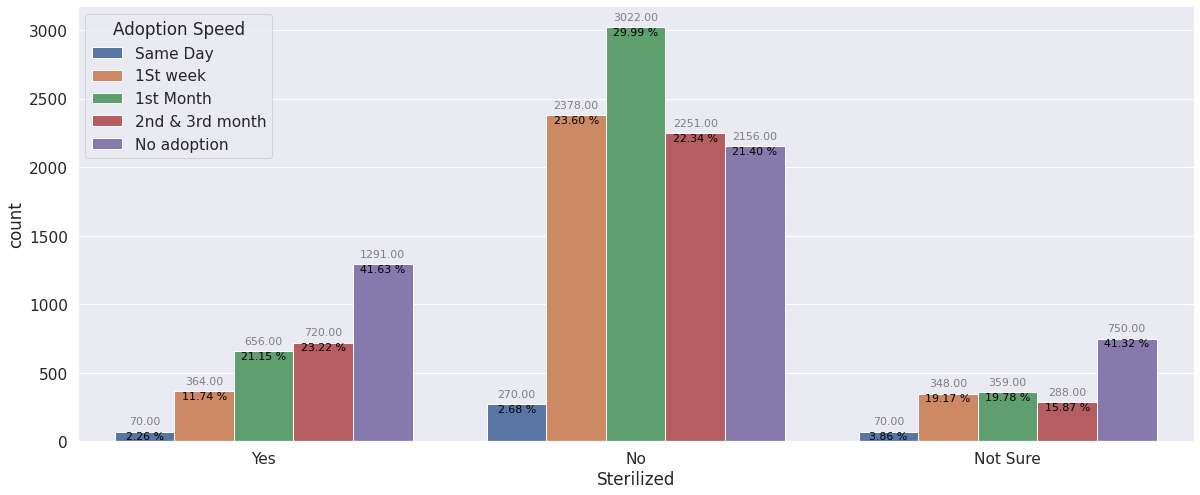

In [35]:

plt.figure(figsize=(20, 8))

ax=sns.countplot(data=train_df, x="Sterilized", hue="AdoptionSpeed")
ax.set_xticklabels(["Yes","No","Not Sure"])

FurLengthP=[]

for i in range(1,4):
    FurLengthP.append((train_df['Sterilized']==i).value_counts()[1])


plt.legend(title='Adoption Speed', loc='upper left', labels=['Same Day', '1St week','1st Month','2nd & 3rd month','No adoption'])
for i,p in enumerate(ax.patches):
    ax.annotate("%.2f" % p.get_height() , (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                textcoords='offset points')
    ax.annotate("%.2f %%" % (p.get_height() *100  / FurLengthP[i%3]) , (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, -5),
         textcoords='offset points')  

  




This colum is also correlated with Age but it seems like the age can be a little higher here.

People prefer to adopt not sterilized pets, wheter or not they would like to breed them in the future or just prefer to choose for themselves

[Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'Not Sure')]

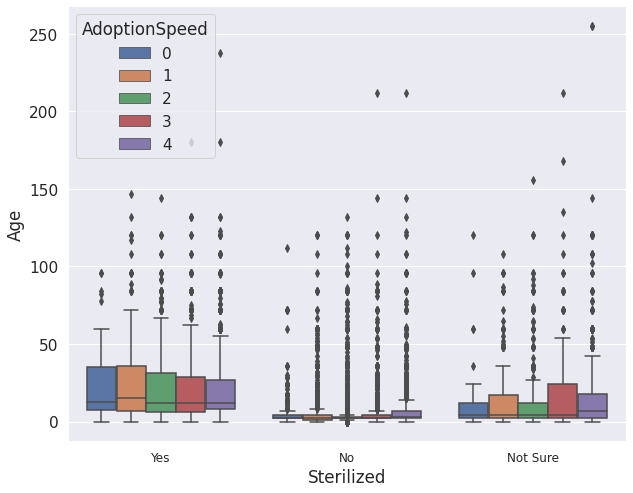

In [36]:
plt.figure(figsize=(10, 8))

ax=sns.boxplot(data=train_df, x="Sterilized",y='Age',hue='AdoptionSpeed')
ax.set_xticklabels(['Yes','No','Not Sure'], fontsize=12)


# Does Health effects adoption Speed? #12

Yay! most of the pets are healthy in the data set, Not surpsingly too see that pets with Minor Injury tends to have a lower adoption rate

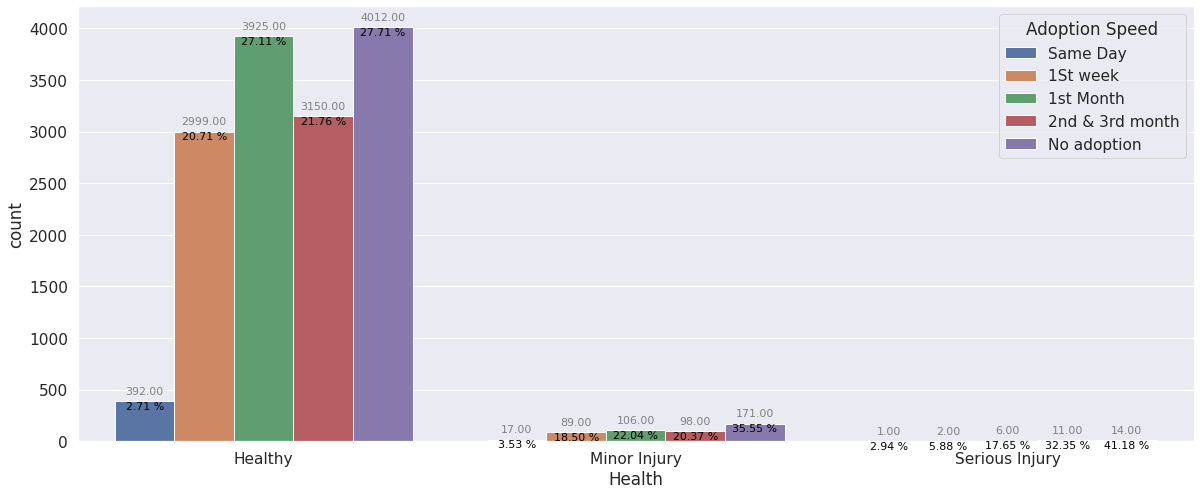

In [37]:

plt.figure(figsize=(20, 8))

ax=sns.countplot(data=train_df, x="Health", hue="AdoptionSpeed")
FurLengthP=[]
ax.set_xticklabels(["Healthy","Minor Injury","Serious Injury"])

for i in range(1,4):
    FurLengthP.append((train_df['Health']==i).value_counts()[1])


plt.legend(title='Adoption Speed', loc='upper right', labels=['Same Day', '1St week','1st Month','2nd & 3rd month','No adoption'])
for i,p in enumerate(ax.patches):
    ax.annotate("%.2f" % p.get_height() , (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                textcoords='offset points')
    ax.annotate("%.2f %%" % (p.get_height() *100  / FurLengthP[i%3]) , (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, -5),
         textcoords='offset points')  

  
    



# Does Quantity effects adoption Speed? #13

surprsingly we can see some listing of pets with a very high Qauntity, I will bin all the 10+ listing to a one column that will be called 10+ 

In [38]:
train_df['Quantity'].value_counts()


1     11565
2      1422
3       726
4       531
5       333
6       185
7        84
8        52
9        33
10       19
20       12
11       10
12        6
15        4
17        3
16        3
13        2
14        2
18        1
Name: Quantity, dtype: int64

pretty much obvious but pets who are grouped have lower Adoption rate... It might be better to list every pet on their own if possible.

This is an insight that people should be aware of.

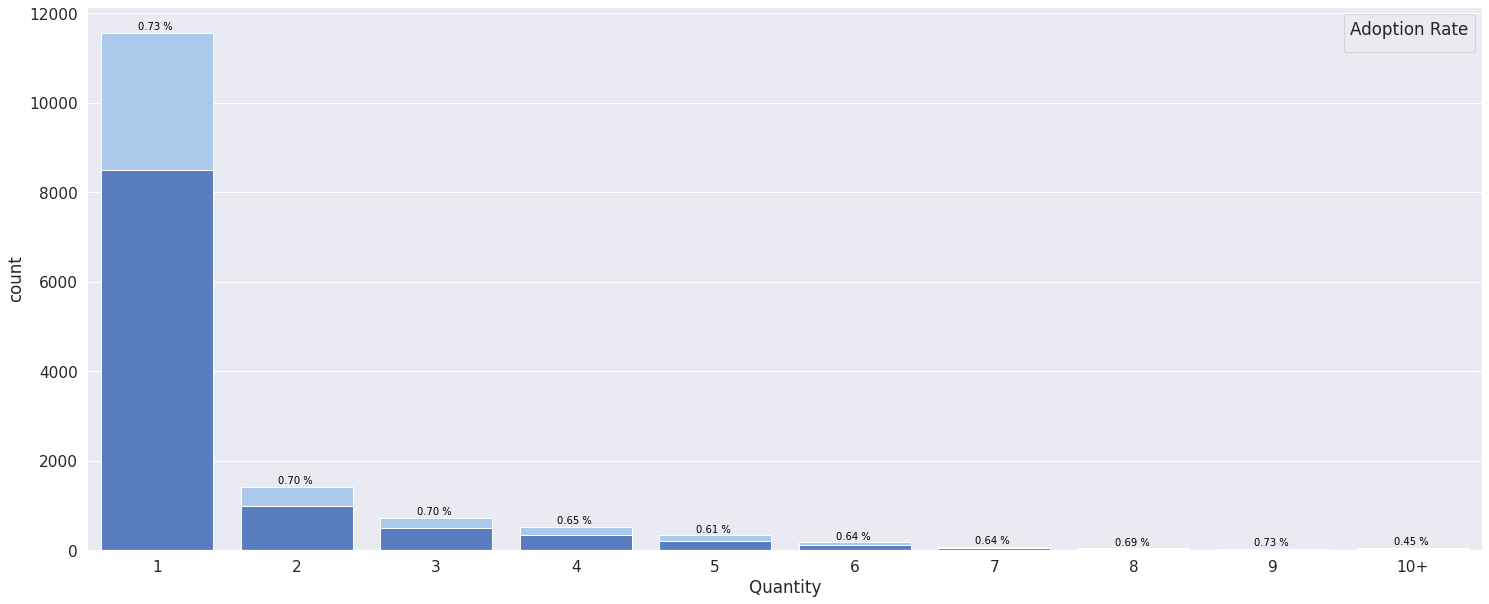

In [39]:
train10_df=adopted01_df.copy()

train10_df.loc[train10_df['Quantity']>=10, 'Quantity']=10

plt.figure(figsize=(25, 10))

sns.set_color_codes("pastel")
ax=sns.countplot(data=train10_df, x="Quantity",order = train10_df['Quantity'].value_counts().sort_index(ascending =True).index,color='b')
plt.legend(title='Adoption Rate', loc='upper right')
adopted0_df=train10_df.loc[train10_df['AdoptionSpeed']==0]

df=adopted0_df['Quantity'].value_counts().sort_index(ascending =True)/train10_df['Quantity'].value_counts().sort_index(ascending =True) # getting the right P%
df=df.to_numpy()
    
for i,p in enumerate(ax.patches):
    ratio = df[i]
    ax.annotate("%.2f %% " % ratio  , (p.get_x() + p.get_width() / 2., p.get_height()+20),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
sns.set_color_codes("muted")
sns.countplot(data=adopted0_df, x="Quantity",order = train10_df['Quantity'].value_counts().sort_index(ascending =True).index, color='b')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[-1] = '10+'
ax=ax.set_xticklabels(labels)

   

# Does the Fee of adopting a pet has an effect on Adoption Speed? #14

In [40]:
train_df['Fee'].describe()

count    14993.000000
mean        21.259988
std         78.414548
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3000.000000
Name: Fee, dtype: float64

seems like we have some outliers in Fees, the Mean is 21 but the max Value is 3000, let's take a closer look

we can see some outliers that should be removed, let's dive a bit deeper to find out what should be dropped.

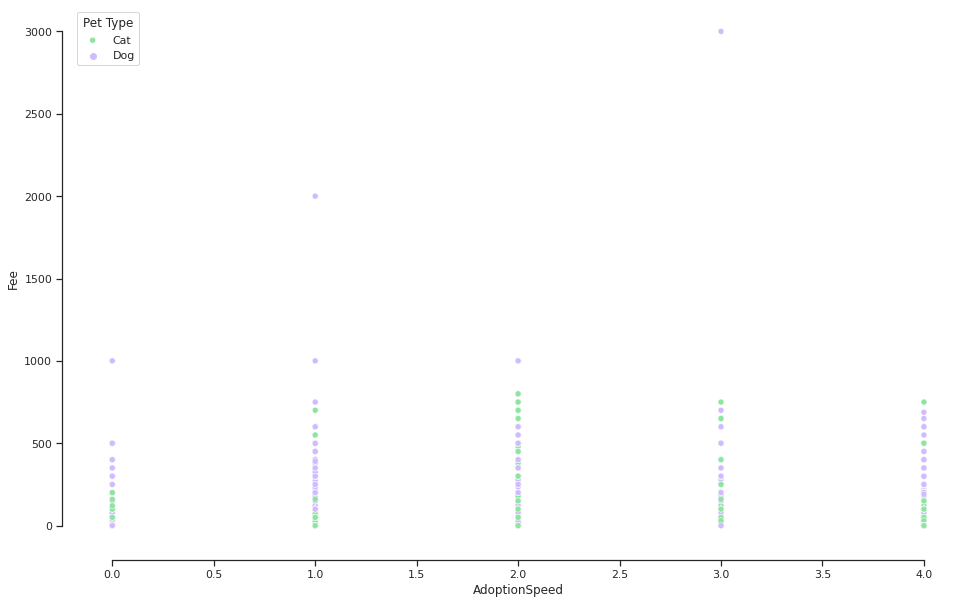

In [41]:
plt.figure(figsize=(16, 10));
sns.set_theme(style="ticks", palette="pastel")
sns.scatterplot(data=train_df, x=train_df['AdoptionSpeed'],hue='Type',y=train_df['Fee'],palette=["m", "g"])
plt.legend(title='Pet Type', loc='upper left', labels=['Cat','Dog'])

sns.despine(offset=10, trim=True)


Seems like after 500 we can cut the outliers and settle with 0.996% of the train set



In [42]:
fee_df=train_df.copy()
print(fee_df['Fee'].value_counts(normalize=True,bins=12)) #seems like after 500 we can cut the outliers

fee_df.drop(fee_df[fee_df['Fee'] >500].index, inplace=True)


(-3.001, 250.0]     0.978257
(250.0, 500.0]      0.018809
(500.0, 750.0]      0.002401
(750.0, 1000.0]     0.000400
(2750.0, 3000.0]    0.000067
(1750.0, 2000.0]    0.000067
(2500.0, 2750.0]    0.000000
(2250.0, 2500.0]    0.000000
(2000.0, 2250.0]    0.000000
(1500.0, 1750.0]    0.000000
(1250.0, 1500.0]    0.000000
(1000.0, 1250.0]    0.000000
Name: Fee, dtype: float64


We can see that most of the pet's are Free of fee.

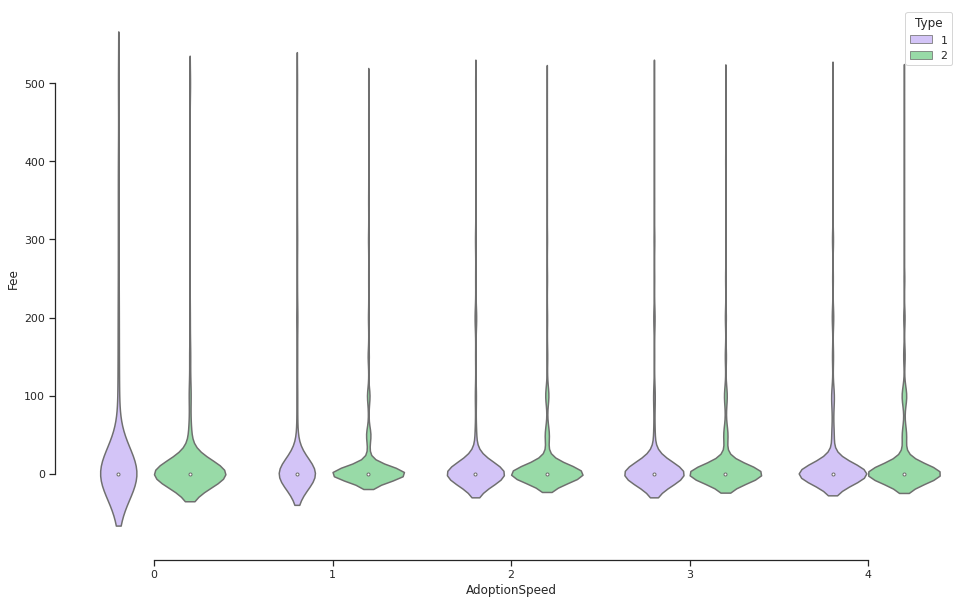

In [43]:
plt.figure(figsize=(16, 10));
sns.set_theme(style="ticks", palette="pastel")
sns.violinplot(data=fee_df, x=fee_df['AdoptionSpeed'],hue='Type',y=fee_df['Fee'],palette=["m", "g"])
sns.despine(offset=10, trim=True)

**Let's compare AdoptionSpeed of Pets that are free to non free pets**

In [44]:
adopted01Fee_df=adopted01_df.copy()
adopted01Fee_df.drop(adopted01Fee_df[adopted01Fee_df['Fee'] >500].index, inplace=True)
adopted01Fee_df.loc[adopted01Fee_df['Fee']>=1, 'Fee']='Paid'
adopted01Fee_df.loc[adopted01Fee_df['Fee']==0, 'Fee']='Free'
#################### Fee with Binning
adoptedBinsFee_df=adopted01_df.copy()
bins=[-1,0,50,100,150,200,250,300,350,400,450,500]
adoptedBinsFee_df['Fee'] = pd.cut(adoptedBinsFee_df['Fee'], bins)
adoptedBinsFee_df['Fee'].value_counts()

(-1, 0]       12663
(0, 50]         954
(50, 100]       516
(150, 200]      246
(100, 150]      191
(250, 300]      126
(200, 250]       97
(450, 500]       58
(300, 350]       52
(350, 400]       35
(400, 450]       11
Name: Fee, dtype: int64

****

**We can see that Pets Free of fee has higher Adoptation Rate, there is also a downtrend of adoptation rate as the fee increases**

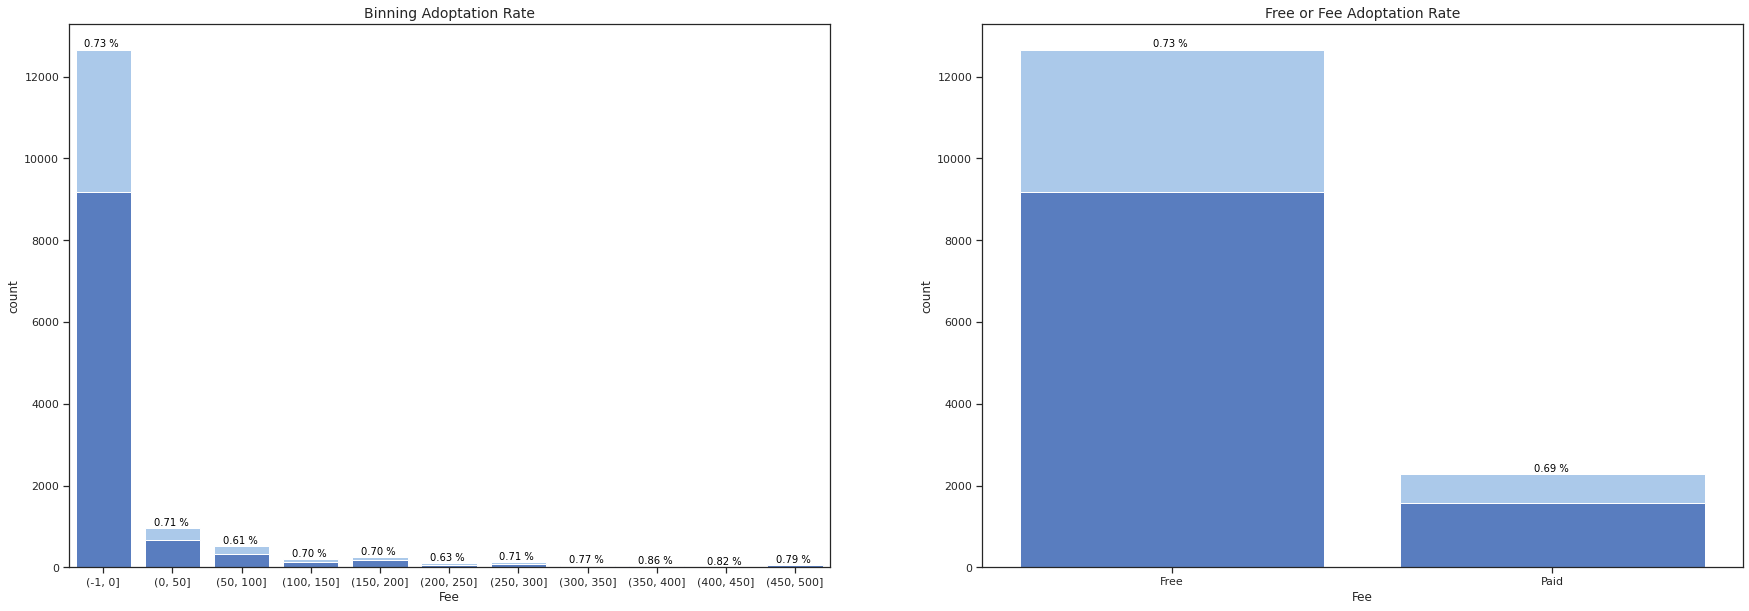

In [45]:
fig, ax = plt.subplots(1,2,figsize=(30,10))
ax[0].set_title("Binning Adoptation Rate",fontsize=14)
ax[1].set_title("Free or Fee Adoptation Rate",fontsize=14)

######################Free or Fee Adoptation Rate 


sns.set_color_codes("pastel")
ax[0]=sns.countplot(data=adoptedBinsFee_df, x="Fee",order = adoptedBinsFee_df['Fee'].value_counts().sort_index(ascending =True).index,color='b',ax=ax[0])
adopted0BinsFee_df=adoptedBinsFee_df.loc[adoptedBinsFee_df['AdoptionSpeed']==0]

df=adopted0BinsFee_df['Fee'].value_counts().sort_index(ascending =True)/adoptedBinsFee_df['Fee'].value_counts().sort_index(ascending =True) # getting the right P%
df=df.to_numpy()

for i,p in enumerate(ax[0].patches):
    ratio = df[i]
    ax[0].annotate("%.2f %% " % ratio  , (p.get_x() + p.get_width() / 2., p.get_height()+20),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
sns.set_color_codes("muted")
ax[0]=sns.countplot(data=adopted0BinsFee_df, x="Fee",order = adoptedBinsFee_df['Fee'].value_counts().sort_index(ascending =True).index, color='b',ax=ax[0])

######################Binning Adoptation Rate 


sns.set_color_codes("pastel")
ax[1]=sns.countplot(data=adopted01Fee_df, x="Fee",order = adopted01Fee_df['Fee'].value_counts().sort_index(ascending =True).index,color='b',ax=ax[1])
adopted0Fee_df=adopted01Fee_df.loc[adopted01Fee_df['AdoptionSpeed']==0]

df=adopted0Fee_df['Fee'].value_counts().sort_index(ascending =True)/adopted01Fee_df['Fee'].value_counts().sort_index(ascending =True) # getting the right P%
df=df.to_numpy()


for i,p in enumerate(ax[1].patches):
    ratio = df[i]
    ax[1].annotate("%.2f %% " % ratio  , (p.get_x() + p.get_width() / 2., p.get_height()+20),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
sns.set_color_codes("muted")
ax[1]=sns.countplot(data=adopted0Fee_df, x="Fee",order = adopted01Fee_df['Fee'].value_counts().sort_index(ascending =True).index, color='b',ax=ax[1])

# Does the amount of photos of a pet has an effect on Adoption Speed? #15

Seems like that the more Photos a pet has the higher the chances for Adoption.

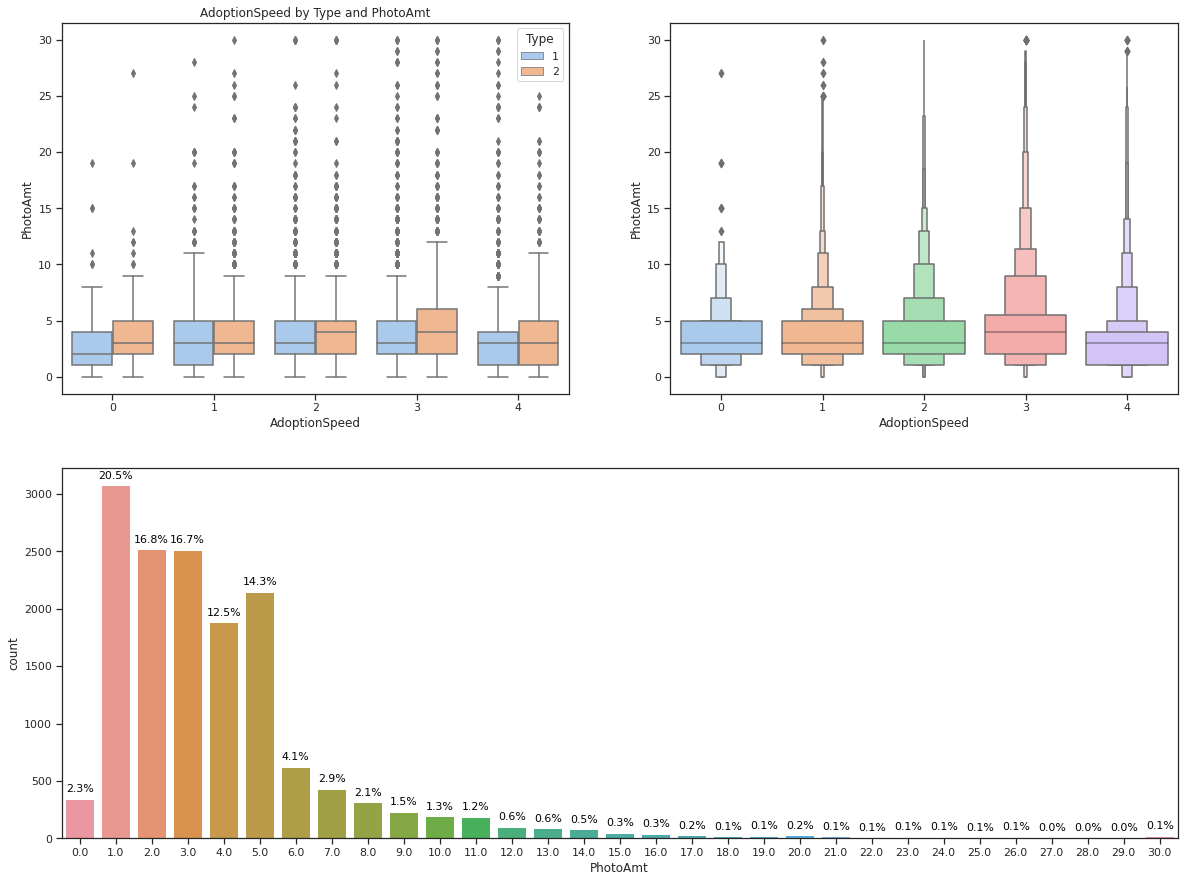

In [46]:
plt.figure(figsize=(20, 15));

ax = plt.subplot2grid((2, 2), (0, 0))

ax2 = plt.subplot2grid((2, 2), (0, 0))
sns.boxplot(x="AdoptionSpeed", y="PhotoAmt", hue="Type", data=train_df);
plt.title('AdoptionSpeed by Type and PhotoAmt');

ax3 = plt.subplot2grid((2, 2), (0, 1))
sns.boxenplot(x="AdoptionSpeed", y="PhotoAmt", data=train_df);

ax4 = plt.subplot2grid((2, 2), (1, 0),colspan=2)

ax=sns.countplot(data=train_df, x="PhotoAmt")

for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / train_df.shape[0]:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')  

Let's check the Adoption Rate per Photo amount.

**We can see a clear insight that the more photos a pet has the higher is the adoption rate!**

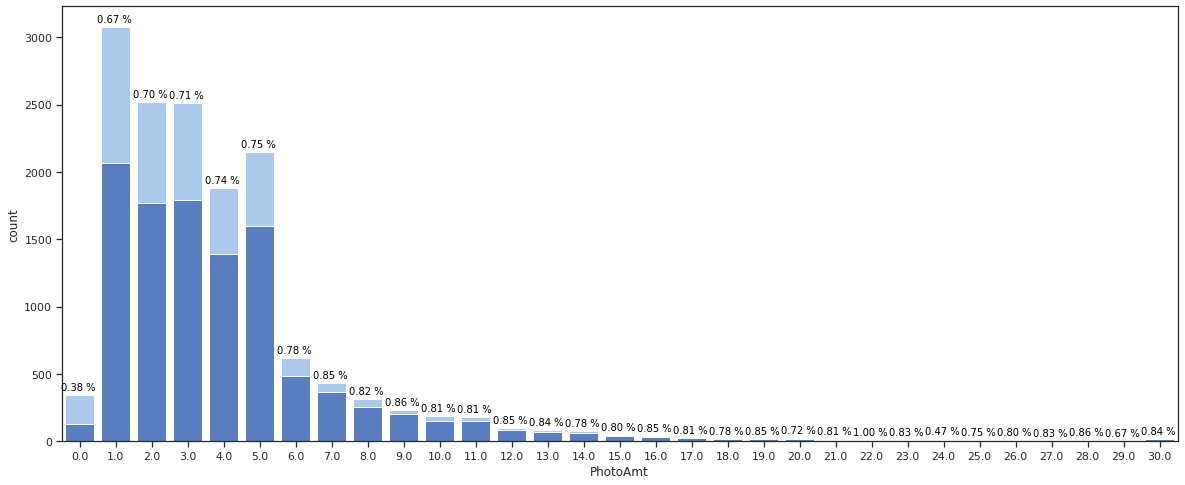

In [47]:
plt.figure(figsize=(20, 8));
adoptedPhoto01_df=adopted01_df.copy()

sns.set_color_codes("pastel")
ax=sns.countplot(data=adoptedPhoto01_df, x="PhotoAmt",order = adoptedPhoto01_df['PhotoAmt'].value_counts().sort_index(ascending =True).index,color='b')
adoptedPhoto0_df=adoptedPhoto01_df.loc[adoptedPhoto01_df['AdoptionSpeed']==0]


df=adoptedPhoto0_df['PhotoAmt'].value_counts().sort_index(ascending =True)/adoptedPhoto01_df['PhotoAmt'].value_counts().sort_index(ascending =True) # getting the right P%
df=df.to_numpy()


for i,p in enumerate(ax.patches):
    ratio = df[i]
    ax.annotate("%.2f %% " % ratio  , (p.get_x() + p.get_width() / 2., p.get_height()+20),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
sns.set_color_codes("muted")
ax=sns.countplot(data=adoptedPhoto0_df, x="PhotoAmt",order = adoptedPhoto01_df['PhotoAmt'].value_counts().sort_index(ascending =True).index, color='b')

# Does the amount of videos of a pet has an effect on Adoption Speed? #16

seems like most pets has 0 videos, I'm not so sure we would be able to use that column in prediction but we can see that pets with videos (at any amount) do have a higher adoption rate,

therefore **I can recommend animal shelters to take a small video of the pet**

(0.0, 4736.0)

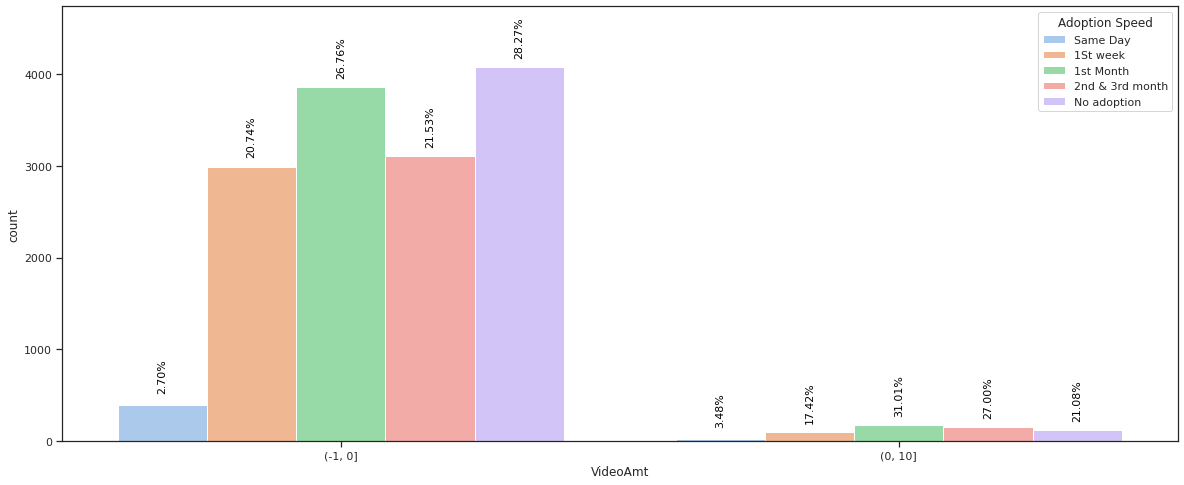

In [48]:
videoAmt_df=train_df.copy()

videoAmt_df['VideoAmt'] = pd.cut(videoAmt_df['VideoAmt'], bins=[-1,0,10])
videoAmt_df['VideoAmt'].value_counts()

plt.figure(figsize=(20, 8));


ax=sns.countplot(data=videoAmt_df, x="VideoAmt",hue='AdoptionSpeed')
videoP=[]
videoP.append((videoAmt_df['VideoAmt']==pd.Interval(-1, 0, closed='right')).value_counts()[1])
videoP.append((videoAmt_df['VideoAmt']==pd.Interval(0, 10, closed='right')).value_counts()[1])


plt.legend(title='Adoption Speed', loc='upper right', labels=['Same Day', '1St week','1st Month','2nd & 3rd month','No adoption'])
max=0
for i,p in enumerate(ax.patches):
    
    ax.annotate("%.2f%%" % (p.get_height() *100  / videoP[i%2]) , (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=90, xytext=(0, 30),
         textcoords='offset points')
    if p.get_height()>max:
        max=p.get_height()
ax.set_ylim(0,max+ 660)



# RescuerID #17

Let's check out the RescuerID column, this column may help us classify the pets better.

We can see that there are some Rescuers with a very high adoption rate and there are two with a very low adoption rate 42%, It's pretty surprsing too see that the RescuerID has such a significant results over the Adoption rate, I will try to use that column in DataFrame 2.

We have no way to understand what the RescuerID means except the fact that it's a unique Key for each Rescuer...

we have 19 Rescuers with more than 50 Listings! 


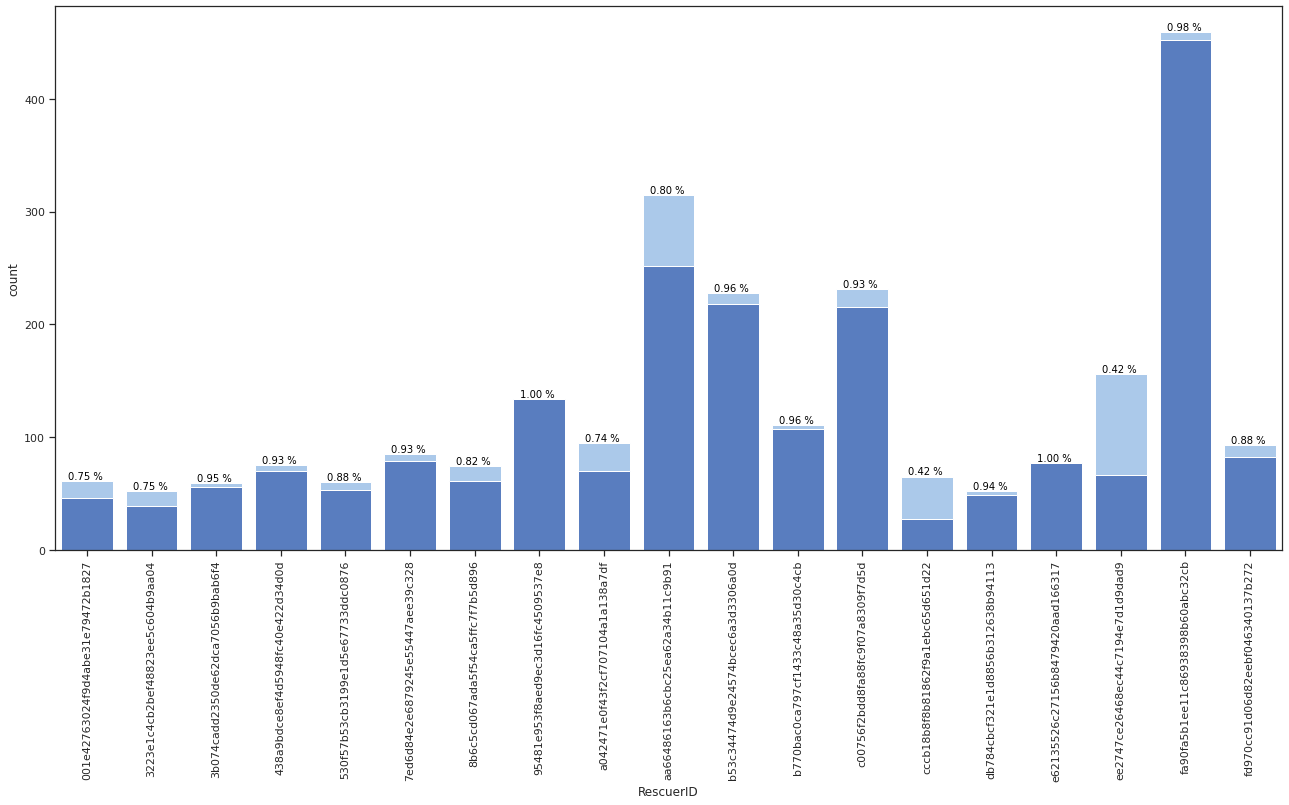

In [49]:
a=train_df.copy()
counts = a['RescuerID'].value_counts()
counts[counts>50]
a=a[a['RescuerID'].isin(counts[counts > 50].index)]
popBreeds=a['RescuerID'].value_counts().index
plt.figure(figsize=(22, 10));

sns.set_color_codes("pastel")
ax=sns.countplot(data=a, x="RescuerID",order = a['RescuerID'].value_counts().sort_index(ascending =True).index,color='b')
a0=a.loc[a['AdoptionSpeed']!=4]

df=a0['RescuerID'].value_counts().sort_index(ascending =True)/a['RescuerID'].value_counts().sort_index(ascending =True) # getting the right P%
df=df.to_numpy()


for i,p in enumerate(ax.patches):
    ratio = df[i]
    ax.annotate("%.2f %% " % ratio  , (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
sns.set_color_codes("muted")
ax=sns.countplot(data=a0, x="RescuerID",order = a['RescuerID'].value_counts().sort_index(ascending =True).index, color='b')
_=plt.xticks(rotation=90)

# Description #17

First time working with text! Let's do it! 

starting out with a wordcloud of popular words in a shape of a dog!.

we can already see the main words are Cat, Dog, Love, Kitten, Found Adoption, Will.

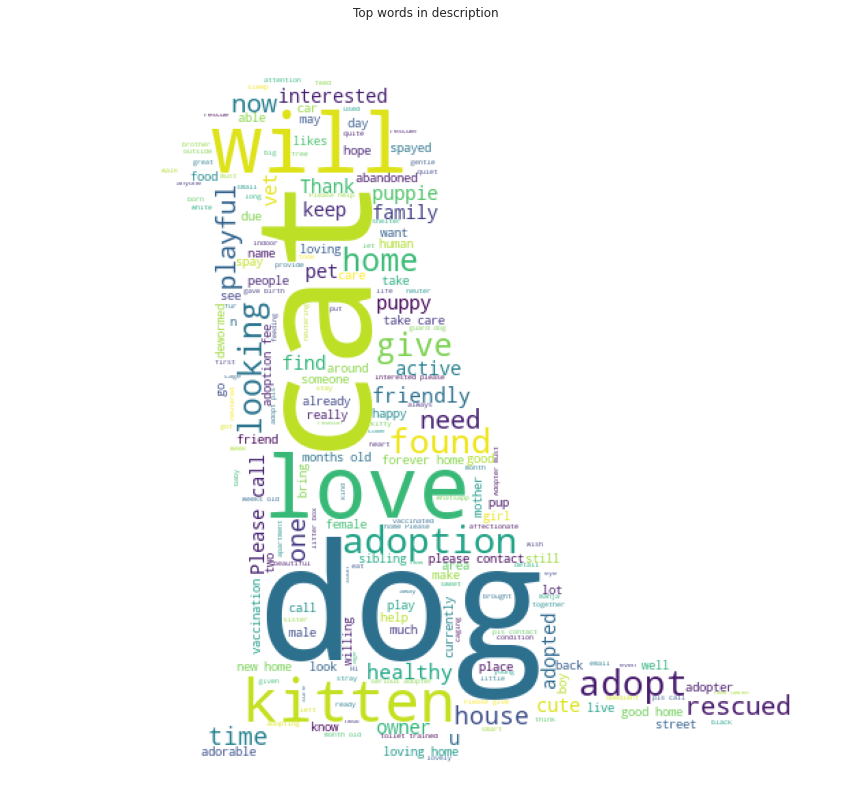

In [50]:
from PIL import Image
mask = np.array(Image.open('../input/cnn-models-petfinder/istockphoto-513133900-612x612.jpg'))

train_df['Description']=train_df['Description'].fillna('').values
fig, ax = plt.subplots(figsize = (15, 15))
Description = ' '.join(train_df['Description'])
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=mask.shape[1], height=mask.shape[0],mask=mask).generate(Description)
plt.axis("off");
plt.imshow(wordcloud)
plt.title('Top words in description');

I wonder if people should pour their heart into the Description box or being cheap on words.

Let's try to check if the length of the Descripton effects adoption rate (In words Count or in total Length)

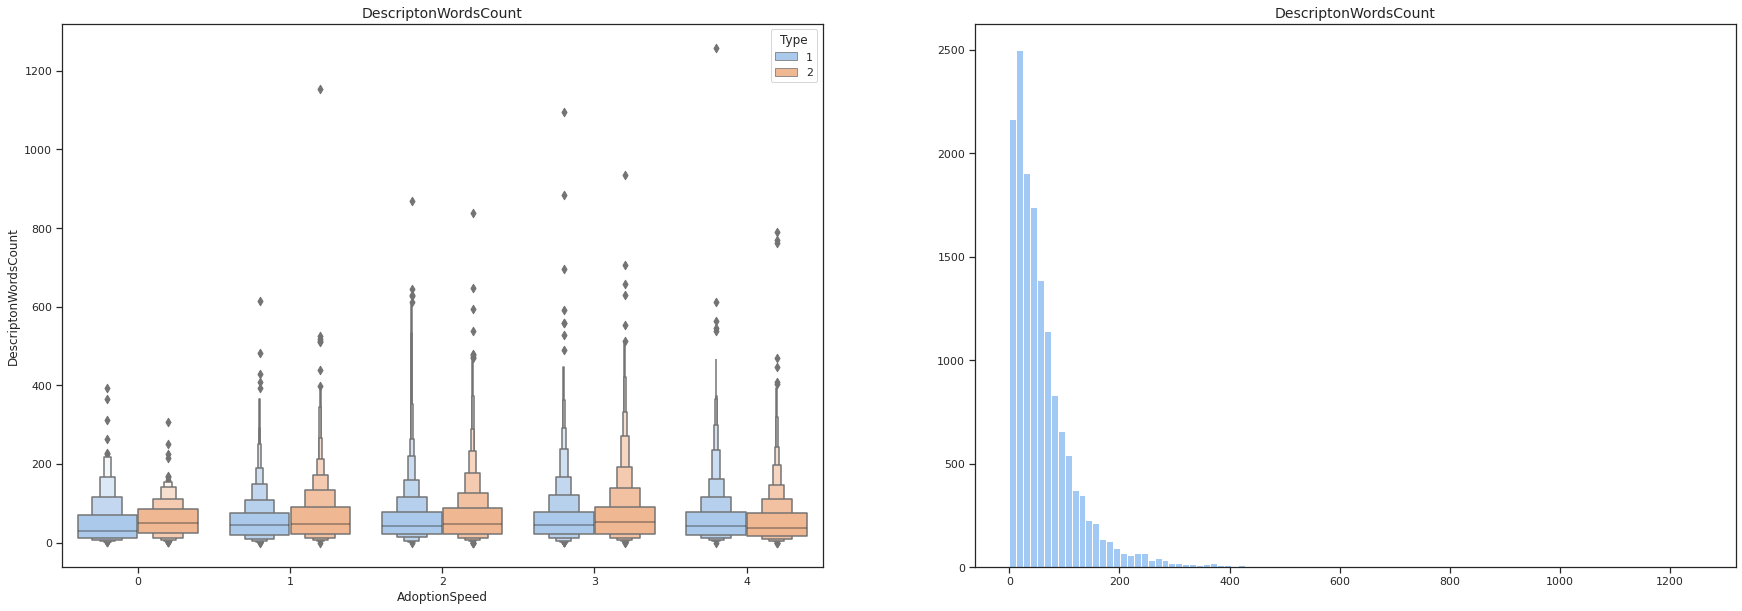

In [51]:
train_df['DescriptonWordsCount'] = train_df['Description'].apply(lambda x: len(x.split()))
fig, ax = plt.subplots(1,2,figsize=(30,10))
ax[0].set_title("DescriptonWordsCount",fontsize=14)
ax[1].set_title("DescriptonWordsCount",fontsize=14)
ax[0]=sns.boxenplot(x="AdoptionSpeed", y="DescriptonWordsCount", hue="Type", data=train_df,ax=ax[0]);
ax[1]=plt.hist(train_df.DescriptonWordsCount,bins=100)

Normalizing the Data with Zscore, we can see that most of the Descripton are quite short, It's hard to see any insight here beside that pets that were adopted at the same date has a shorter descripton.


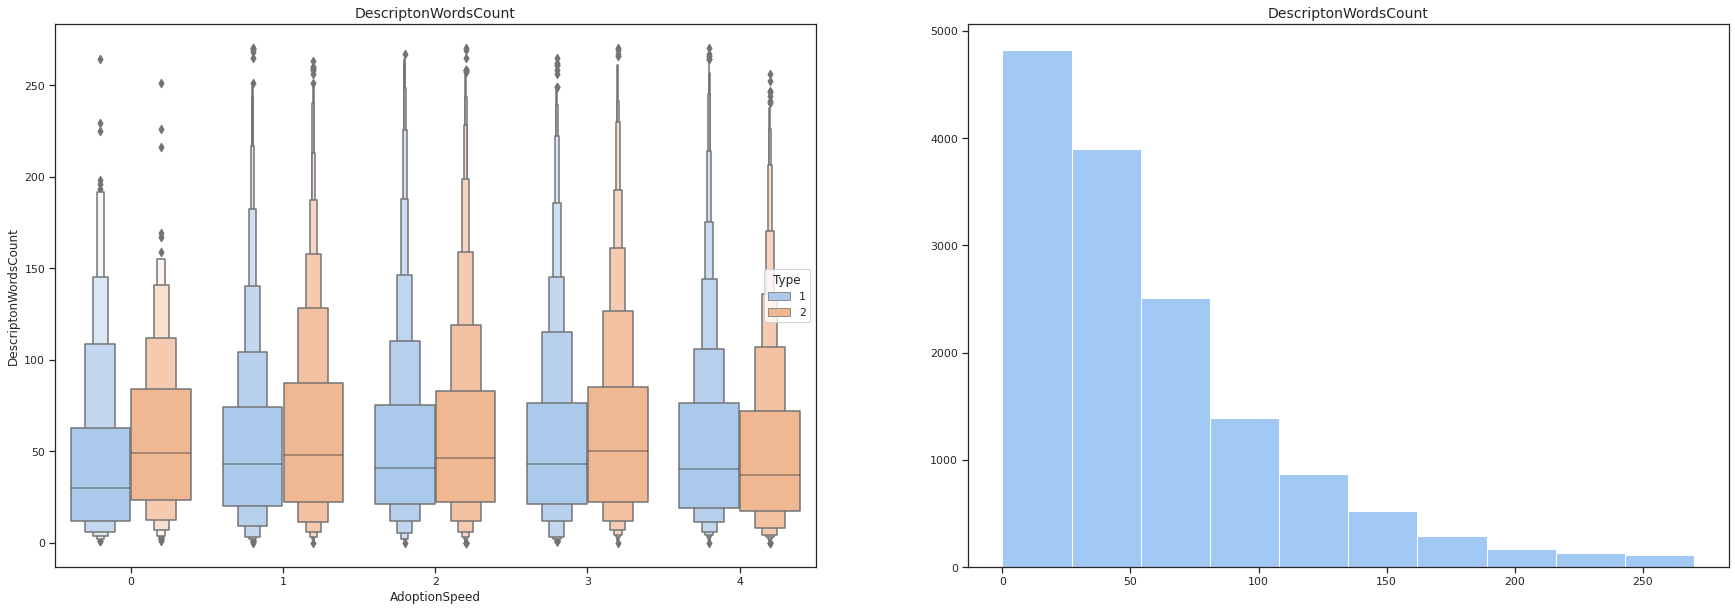

In [52]:
cleanedDescripton=train_df.copy()
cleanedDescripton=cleanedDescripton[(np.abs(stats.zscore(cleanedDescripton['DescriptonWordsCount'])) < 3)]
fig, ax = plt.subplots(1,2,figsize=(30,10))
ax[0].set_title("DescriptonWordsCount",fontsize=14)
ax[1].set_title("DescriptonWordsCount",fontsize=14)
ax[0]=sns.boxenplot(x="AdoptionSpeed", y="DescriptonWordsCount", hue="Type", data=cleanedDescripton,ax=ax[0]);
ax[1]=plt.hist(cleanedDescripton.DescriptonWordsCount,bins=10)

let's bin the data to 10 bins to see it more clearly.

Here we can see a trend that the longer the Descripton the better chances for adoption at all. 

**People do prefer to know more about the pet before adopting it, It's better to write a longer summary about the pet! This is an insight that we should display to animal shelers.**

(0.0, 1704.0)

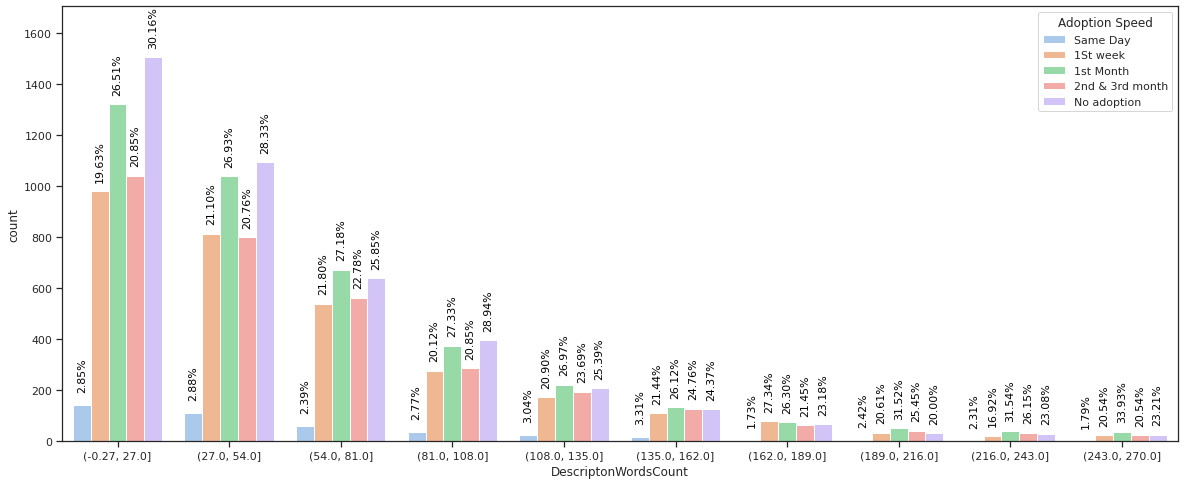

In [53]:
cleanedDescriptonBins=cleanedDescripton.copy()

cleanedDescriptonBins['DescriptonWordsCount'] = pd.cut(cleanedDescriptonBins['DescriptonWordsCount'], bins=10)
cleanedDescriptonBins['DescriptonWordsCount'].value_counts()

plt.figure(figsize=(20, 8));

    
ax=sns.countplot(data=cleanedDescriptonBins, x="DescriptonWordsCount",hue='AdoptionSpeed')
wordsP=[]
wordsP.append((cleanedDescriptonBins['DescriptonWordsCount']==pd.Interval(-0.27, 27, closed='right')).value_counts()[1])

for i in range(1,10):
    wordsP.append((cleanedDescriptonBins['DescriptonWordsCount']==pd.Interval(i*27, (i+1)*27, closed='right')).value_counts()[1])


plt.legend(title='Adoption Speed', loc='upper right', labels=['Same Day', '1St week','1st Month','2nd & 3rd month','No adoption'])
max=0
for i,p in enumerate(ax.patches):
    
    ax.annotate("%.2f%%" % (p.get_height() *100  / wordsP[i%10]) , (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=90, xytext=(0, 30),
         textcoords='offset points')
    if p.get_height()>max:
        max=p.get_height()
ax.set_ylim(0,max+200)

# NLP #18

**Interpreting sentiment analysis values**

The score of a document's sentiment indicates the overall emotion of a document.

The magnitude of a document's sentiment indicates how much emotional content is present within the document, and this value is often proportional to the length of the document.

https://cloud.google.com/natural-language/docs/basics#interpreting_sentiment_analysis_values




**Loading up the JsonFile Data and adding that to our train_df, cleaning some NANS and fill them with 0 too**

In [54]:
train_sentiment_files = sorted(glob.glob('../input/petfinder-adoption-prediction/train_sentiment/*.json'))
print('num of train sentiment files: {}'.format(len(train_sentiment_files)))
data=[]

for i in range (len(train_sentiment_files)):
    with open(train_sentiment_files[i]) as jsonFile:
        jsonObject = json.load(jsonFile)
        jsonFile.close()
    score=jsonObject['documentSentiment']['score']
    magnitude=jsonObject['documentSentiment']['magnitude']
    path=train_sentiment_files[i]
    firstpos=path.rfind("/")
    lastpos=path.rfind(".")
    PetID=path[firstpos+1:lastpos]
    data.append([PetID,score,magnitude,score*magnitude])

data = pd.DataFrame(data, columns=['PetID','Score', 'Magnitude','Sentiment'])

train_df=pd.merge(train_df, data, on='PetID',how='outer')
train_df=train_df.fillna(0)

num of train sentiment files: 14442


Using Kmeans clustring to find a way to use Score and Magnitude together in one column.

I have found that using 3 clusters seperate the data pretty good, therefore i will try to use 3 classes when building sentiment text column.

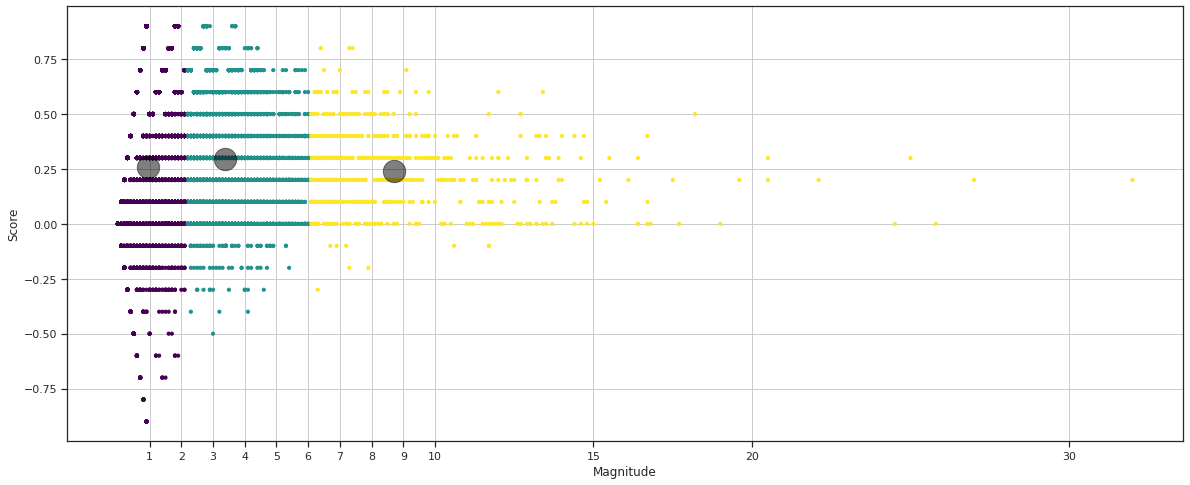

In [55]:
plt.figure(figsize=(20, 8));

cluster_df=train_df.copy()
cluster_df=cluster_df.drop(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 
       'DescriptonWordsCount'],axis=1)


kmeans = KMeans(n_clusters=3, random_state=0).fit(cluster_df[['Score','Magnitude']])
y_kmeans = kmeans.predict(cluster_df[['Score','Magnitude']])

plt.scatter( cluster_df['Magnitude'],cluster_df['Score'], c=y_kmeans, s=10, cmap='viridis')

centers = kmeans.cluster_centers_
plt.xticks([1,2,3,4,5,6,7,8,9,10,15,20,30])
plt.grid(which='both')
plt.xlabel('Magnitude')
plt.ylabel('Score')
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=500, alpha=0.5);


**Sentiment Testing methods**

**1. Bin the Magnitude and Score together to one colum that will represent Negative\ Postive Sentiment and their Magnitude as Netural, Weak, Medium, Strong.**

2. Make a one column called Sentiment that will represent Score * Magnitude, normalize it too.

3. leave both columns "Score", "Magnitude", normalize them and fit to the model.


I Tried all 3 techniques and it seems like method 1 was easier to understand ,better visualized and had better scores when testing DataFrame 2 .




In [56]:
data=[]

for i in range (len(train_sentiment_files)):
    with open(train_sentiment_files[i]) as jsonFile:
        jsonObject = json.load(jsonFile)
        jsonFile.close()
    score=jsonObject['documentSentiment']['score']
    magnitude=jsonObject['documentSentiment']['magnitude']
    path=train_sentiment_files[i]
    firstpos=path.rfind("/")
    lastpos=path.rfind(".")
    PetID=path[firstpos+1:lastpos]
    if score >=0.1:
        if magnitude < 2:
            data.append([PetID,'Weak Postive'])
        elif magnitude < 6 and magnitude>=2:
            data.append([PetID,'Medium Postive'])
        elif magnitude >=6:
            data.append([PetID,'Strong Postive'])
            
    elif score <=-0.1 :
        if magnitude < 2:
            data.append([PetID,'Weak Negative'])
        elif magnitude < 6 and magnitude>=2:
            data.append([PetID,'Medium Negative'])
        elif magnitude >=6:
            data.append([PetID,'Strong Negative'])
            
    else:
        data.append([PetID,'Netural'])

data = pd.DataFrame(data, columns=['PetID','sentiment_TEXT'])

train_df=pd.merge(train_df, data, on='PetID',how='outer')
train_df=train_df.drop(['Score','Magnitude','Sentiment'],axis=1)

Let's take a look at the new column:

In [57]:
train_df.head()

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health  \
0             1          1           2         2           2       1   
1             2          2           3         3           3       1   
2             2          2           1         1           2       1   
3             2          1           1         1           2       1   
4             2          1           2         2           2       1   

   Quantity  Fee  State                         RescuerID  VideoAmt  \
0         1  100  41326  8480853f516546f6cf33aa88cd76c379         0   
1         1    0  41401  3082c7125d8fb66f7dd4bff4192c8b14         0   
2         1    0  41326  fa90fa5b1ee11c86938398b60abc32cb         0   
3         1  150  41401  9238e4f44c71a75282e62f7136c6b240         0   
4         1    0  41326  95481e953f8aed9ec3d16fc4509537e8         0   

                                         Description      PetID  PhotoAmt  \
0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3       1.0   
1  I just found it alone yesterday near my apartm...  6296e909a       2.0   
2  Their pregnant mother was dumped by her irresp...  3422e4906       7.0   
3  Good guard dog, very alert, active, obedience ...  5842f1ff5       8.0   
4  This handsome yet cute boy is up for adoption....  850a43f90       3.0   

   AdoptionSpeed  DescriptonWordsCount  sentiment_TEXT  
0              2                    69  Medium Postive  
1              0                    23   Weak Negative  
2              3                    69  Medium Postive  
3              2                    25    Weak Postive  
4              2                    81  Medium Postive

as we can see the sentiment of the text does effect the adoptionSpeed column but it's not super effective in predicting the AdoptionSpeed.

We dont have a lot of Negative sentiment descriptions in our database, It's not a surprise because people do want to show the adopted pet in a positive light.

the negative sentiment descriptions tend to have lower adoption rate as we can see in the columns "Weak Negative"

The Big surprise here is that the "Netural" column has the best adoption rate over the five periods! 


Weak Postive       6211
Medium Postive     4630
Netural            2328
Weak Negative       587
Strong Postive      557
Medium Negative     120
Strong Negative       9
Name: sentiment_TEXT, dtype: int64


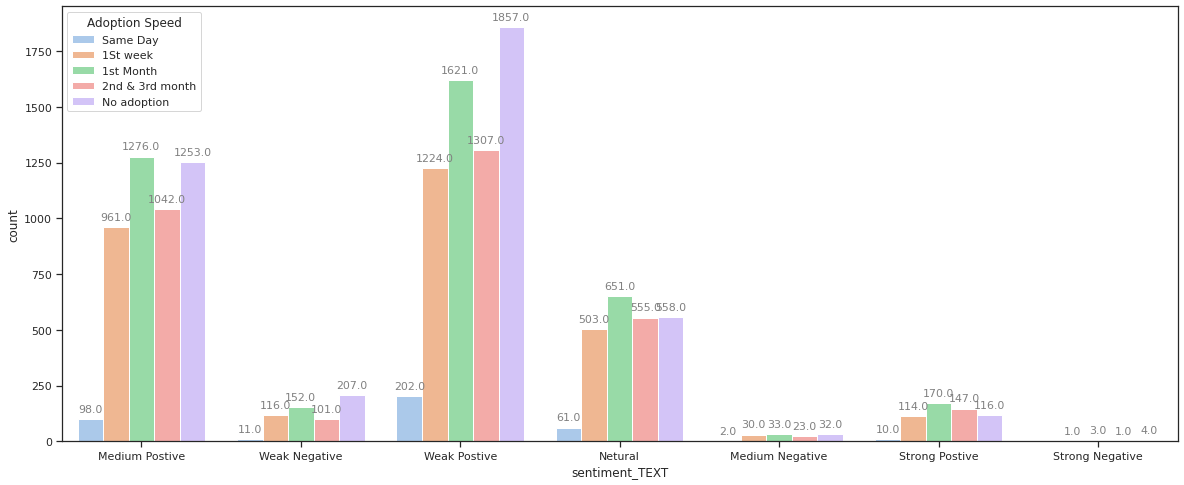

In [58]:
plt.figure(figsize=(20, 8))

ax=sns.countplot(data=train_df, x="sentiment_TEXT", hue="AdoptionSpeed")
sentimentP=[]
print(train_df['sentiment_TEXT'].value_counts())



plt.legend(title='Adoption Speed', loc='upper left', labels=['Same Day', '1St week','1st Month','2nd & 3rd month','No adoption'])
for i,p in enumerate(ax.patches):
    ax.annotate(  p.get_height() , (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                textcoords='offset points')
  
    



# Description NLP for finding and research #19

Here i will use some techniques that i learned to try and find recommendtion on what people should write in the description text to increase adoption rate!

In [59]:
import en_core_web_sm

nlp = en_core_web_sm.load()
from spacy import displacy



Tested out stemming the words

In [60]:
"""import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

def identify_tokens(row):
    review = row['Description']
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words


p_stemmer=PorterStemmer()
s_stemmer=SnowballStemmer(language='english')
meow=train_df.copy()

meow['words'] = meow.apply(identify_tokens, axis=1)

meow['stemmed'] = meow['words'].apply(lambda x: [s_stemmer.stem(y) for y in x]) # Stem every word.
meow['readyS']=meow['stemmed'].apply(lambda x : " ".join(x))


meow['stemmedP'] = meow['words'].apply(lambda x: [p_stemmer.stem(y) for y in x]) # Stem every word.
meow['readyP']=meow['stemmedP'].apply(lambda x : " ".join(x))
"""

'import nltk\nfrom nltk.stem.porter import PorterStemmer\nfrom nltk.stem.snowball import SnowballStemmer\n\ndef identify_tokens(row):\n    review = row[\'Description\']\n    tokens = nltk.word_tokenize(review)\n    # taken only words (not punctuation)\n    token_words = [w for w in tokens if w.isalpha()]\n    return token_words\n\n\np_stemmer=PorterStemmer()\ns_stemmer=SnowballStemmer(language=\'english\')\nmeow=train_df.copy()\n\nmeow[\'words\'] = meow.apply(identify_tokens, axis=1)\n\nmeow[\'stemmed\'] = meow[\'words\'].apply(lambda x: [s_stemmer.stem(y) for y in x]) # Stem every word.\nmeow[\'readyS\']=meow[\'stemmed\'].apply(lambda x : " ".join(x))\n\n\nmeow[\'stemmedP\'] = meow[\'words\'].apply(lambda x: [p_stemmer.stem(y) for y in x]) # Stem every word.\nmeow[\'readyP\']=meow[\'stemmedP\'].apply(lambda x : " ".join(x))\n'

Lematize the Descriptions words, removing stop words and punction.

In [61]:
import nltk
train_NLP=train_df.copy()
train_NLP["lemmatized"] = train_NLP['Description'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x)]))
train_NLP['lemmatized'] = train_NLP['lemmatized'].str.replace(r'[^\w\s]+', '')
train_df['lemmatized'] = train_NLP['lemmatized'].str.replace(r'[^\w\s]+', '')


txt = train_NLP.lemmatized.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nlp.Defaults.stop_words
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 



here we have a dataframe of the procced words and their frequency, we can se "pron" :-PRON- is the default lemma for pronouns in spaCy  https://spacy.io/api/annotation , therefore we will be ignoring "pron" when doing our research.

In [62]:
print('All frequencies:')
print('=' * 60)
rslt = pd.DataFrame(words_except_stop_dist.most_common(100),
                    columns=['Word', 'Frequency'])
rslt


All frequencies:


Word  Frequency
0     pron      94818
1     home       8193
2      dog       6396
3      cat       6229
4     love       6122
..     ...        ...
95     boy        849
96  foster        843
97     sms        839
98       u        831
99    stay        831

[100 rows x 2 columns]

**Creating a Dataframe to analyze the results**

DF columns:

**Word**- The Word

**Numbers of Rows that has the word**- Count the rows in our database that has the word.

**% of rows with that word in the Data**- display the Precentage of rows that has the word.

**Have the word, No Adoption**- Count how many rows have the word but has AdoptionSpeed=4, not adopted.

**Difference between adoption Rate** -  **Have the word % no Adoption** "Minus" **No word % no Adoption**  - Negative value shows that rows that have the word have higher adoption rate than rows that doesnt have the word, Postive value shows the other way around.


In [63]:
wordAdoption=[]

for word in rslt['Word']:
    #print(word)
    if word=='pron':
        continue
        
    YESKeyword=train_NLP[train_NLP['lemmatized'].str.contains(word)]
    NOKeyword=train_NLP[~train_NLP['lemmatized'].str.contains(word)]
    wordAdoption.append([word,
                         YESKeyword.count()[0],
                         YESKeyword.count()[0]/train_NLP.count()[0],
                         YESKeyword['AdoptionSpeed'].value_counts().sort_index(ascending=True)[4],
                         YESKeyword['AdoptionSpeed'].value_counts().sort_index(ascending=True)[4]/YESKeyword.count()[0],
                         NOKeyword['AdoptionSpeed'].value_counts().sort_index(ascending=True)[4],
                         NOKeyword['AdoptionSpeed'].value_counts().sort_index(ascending=True)[4]/NOKeyword.count()[0],
                         (YESKeyword['AdoptionSpeed'].value_counts().sort_index(ascending=True)[4]/YESKeyword.count()[0])-(NOKeyword['AdoptionSpeed'].value_counts().sort_index(ascending=True)[4]/NOKeyword.count()[0])])
wordAdoption = pd.DataFrame(wordAdoption, columns=['Word','Numbers of Rows that has the word','% of rows with that word in the Data', ' Have the word, No Adoption ','Have the word % no Adoption','No Word, No Adoption','No word % no Adoption','Difference between adoption Rate'])


**Let's try to find out which words can help increase the adoption rate of the pet**

we can see that we have some interesting words that can increase the adoption rate up to 12% but we should also look at the % of rows that have the word in our database to deliver robust insights.

I Will recap here some of the words that i have found usefull:

**Usefull** : Difference between adoption rate - 5% Min, % of rows with that word in the Data - 10% Min, Words should be meaningfull and not numbers or '-'.


1. **"Interested"**: 17.3% of the rows have this word, there is a  9.6% difference in adoption rate. more details below.
2. **"Kitten"** :17.9% of the rows have this word, there is a  9%% difference in adoption rate. not surprising that Kittens has a higher adoption rate, we already seen that cats has higher adoption rate and the smaller the age the faster the adoption.
3. **"Neuter"** **+** **"Spay"**: 22% of the rows have these words, there is a 9% difference in adoption rate. more details below.
4. **'Train'**: 12% of the rows have this word, there is a 6% difference in adoption rate.  more details below.
5. **'Play' + Playful' + ''Active'** :57% of the rows have these words 4.8% in adoption rate. more details below.

**Good to know**:
Sibling, Liter, Cage.


In [64]:
wordAdoption.sort_values('Difference between adoption Rate',ascending=True).head(30)

Word  Numbers of Rows that has the word  \
24            _                                 77   
88      sibling                                792   
60       litter                                975   
42       neuter                               1477   
17   interested                               2605   
74         cage                                913   
5        kitten                               2682   
70            6                               1184   
33         spay                               1789   
55          pls                               1126   
75        white                                765   
47       mother                               1096   
21      adopter                               1899   
77          eye                                862   
48         week                               1272   
46         long                               1856   
96          sms                                651   
12          old                               2923   
11            2                               3335   
91       indoor                                771   
40        train                               1828   
65            5                               1452   
4         adopt                               7153   
43            4                               1641   
82         bear                                819   
23            3                               2399   
52     adorable                               1243   
56  vaccination                                981   
8      adoption                               2931   
37       little                               1353   

    % of rows with that word in the Data   Have the word, No Adoption   \
24                              0.005136                            12   
88                              0.052825                           142   
60                              0.065030                           180   
42                              0.098513                           281   
17                              0.173748                           523   
74                              0.060895                           178   
5                               0.178883                           553   
70                              0.078970                           238   
33                              0.119322                           374   
55                              0.075102                           232   
75                              0.051024                           157   
47                              0.073101                           231   
21                              0.126659                           408   
77                              0.057493                           181   
48                              0.084840                           270   
46                              0.123791                           410   
96                              0.043420                           142   
12                              0.194958                           669   
11                              0.222437                           772   
91                              0.051424                           171   
40                              0.121924                           416   
65                              0.096845                           329   
4                               0.477089                          1782   
43                              0.109451                           377   
82                              0.054625                           186   
23                              0.160008                           560   
52                              0.082905                           287   
56                              0.065431                           226   
8                               0.195491                           696   
37                              0.090242                           314   

    Have the word % no Adoption  No Word,

**Let's checkout the chart of "interested"**

In [65]:
def compareWords(YESKeyword,NOKeyword):
    
    fig, ax = plt.subplots(1,2,figsize=(30,10))
    ax[0].set_title("YES KEYWORD",fontsize=14)
    ax[1].set_title("NO KEYWORD",fontsize=14)

    ax[0]=sns.countplot(data=YESKeyword, x='AdoptionSpeed',ax=ax[0])

    for i,p in enumerate(ax[0].patches):
        
        ax[0].annotate("%.2f %%" % (p.get_height() *100  /YESKeyword.count()[0] ) , (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
             textcoords='offset points')  
    
###########NO
    ax[1]=sns.countplot(data=NOKeyword, x='AdoptionSpeed',ax=ax[1])
    P=[]
    
    for i in range(0,5):
        P.append((NOKeyword['AdoptionSpeed']==i).value_counts()[1])

    for i,p in enumerate(ax[1].patches):
        
        ax[1].annotate("%.2f %%" % (p.get_height() *100  / NOKeyword.count()[0]) , (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
             textcoords='offset points')  

**We clearly see that "intersted" has the biggest impact on the adoption rate, By digging into some descriptions i can find out two main uses for this word:**
1. interested as a pet trait, describing the pet as a curious and livly pet.
2. referring to people who are interested in adopting the pet, I can't find a reason why it effects the adoption rate that much but i can assume that it shows more boldness from the post creator and less needy.

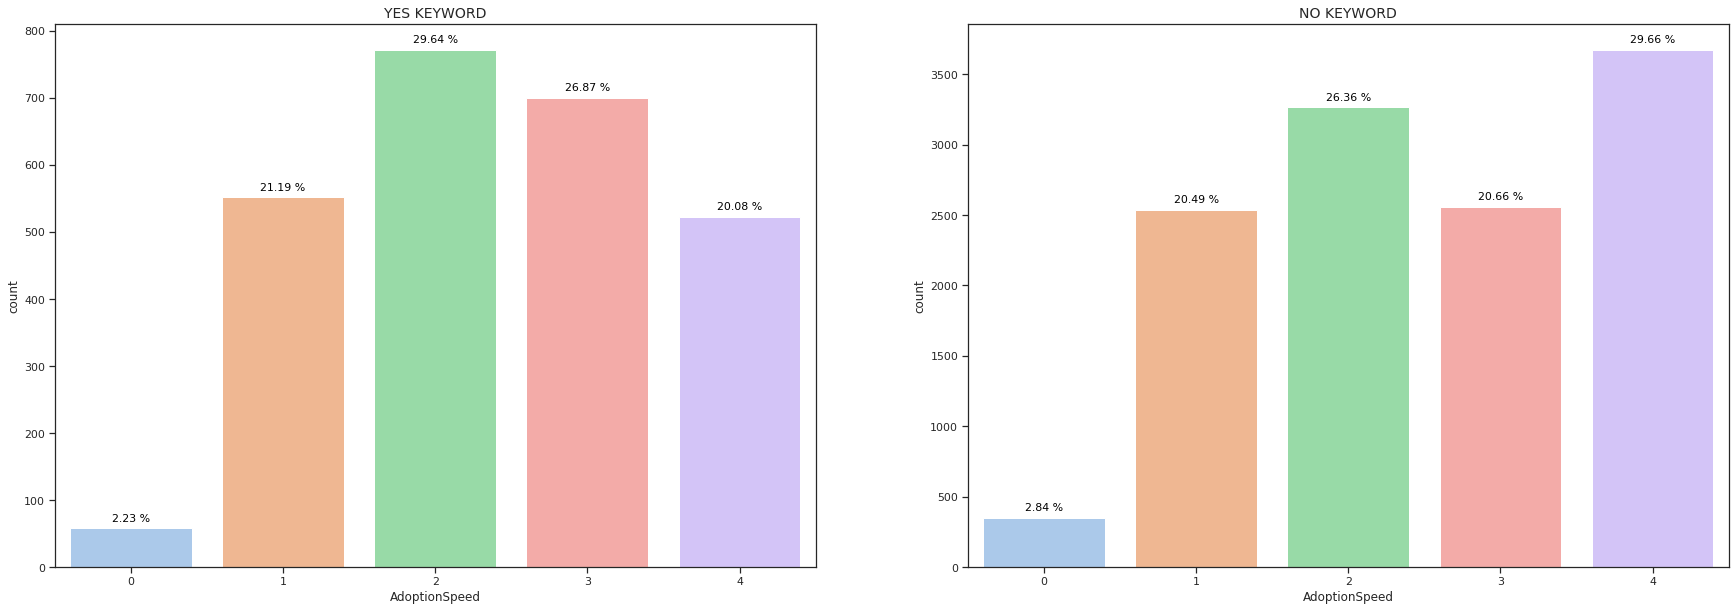

In [66]:
keywords=['interested']
YESKeyword=train_NLP[train_NLP['lemmatized'].str.contains('|'.join(keywords))]
NOKeyword=train_NLP[~train_NLP['lemmatized'].str.contains('|'.join(keywords))]
compareWords(YESKeyword,NOKeyword)

it's really interesting to see that just by using the words neuter and spay (providing the information) the adoption rate per column changed a lot, My recommendtion is to add this extra information to each pet Description.

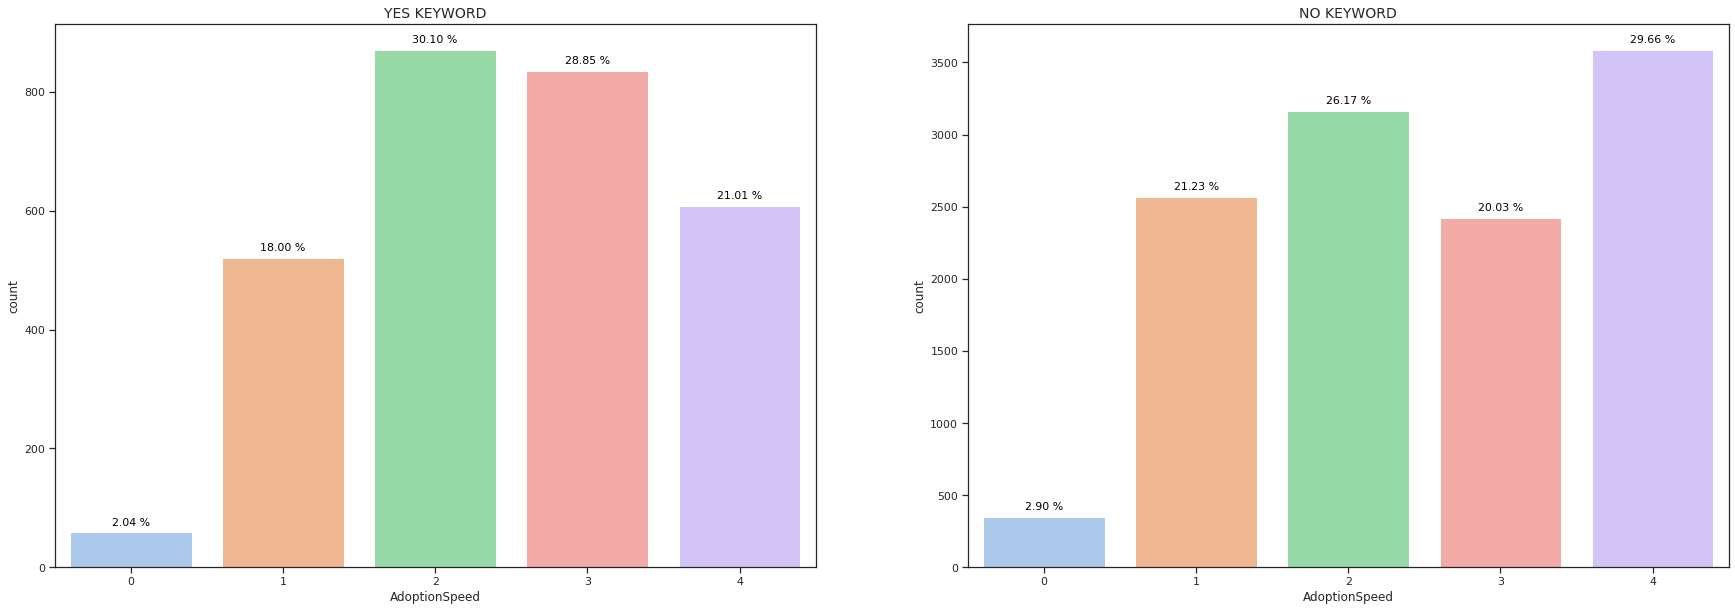

In [67]:
keywords=['neuter','spay']
YESKeyword=train_NLP[train_NLP['lemmatized'].str.contains('|'.join(keywords))]
NOKeyword=train_NLP[~train_NLP['lemmatized'].str.contains('|'.join(keywords))]
compareWords(YESKeyword,NOKeyword)

I wonder what will be the adoption rate of pets when they have the key words intersted + spay or neuter vs pets who didnt use these keywords.

as we can see there is a big difference between each column and also adoption speed 4 has a huge change of 12.8%. 

15.6% of the posts has two (or 3) of the keywords.

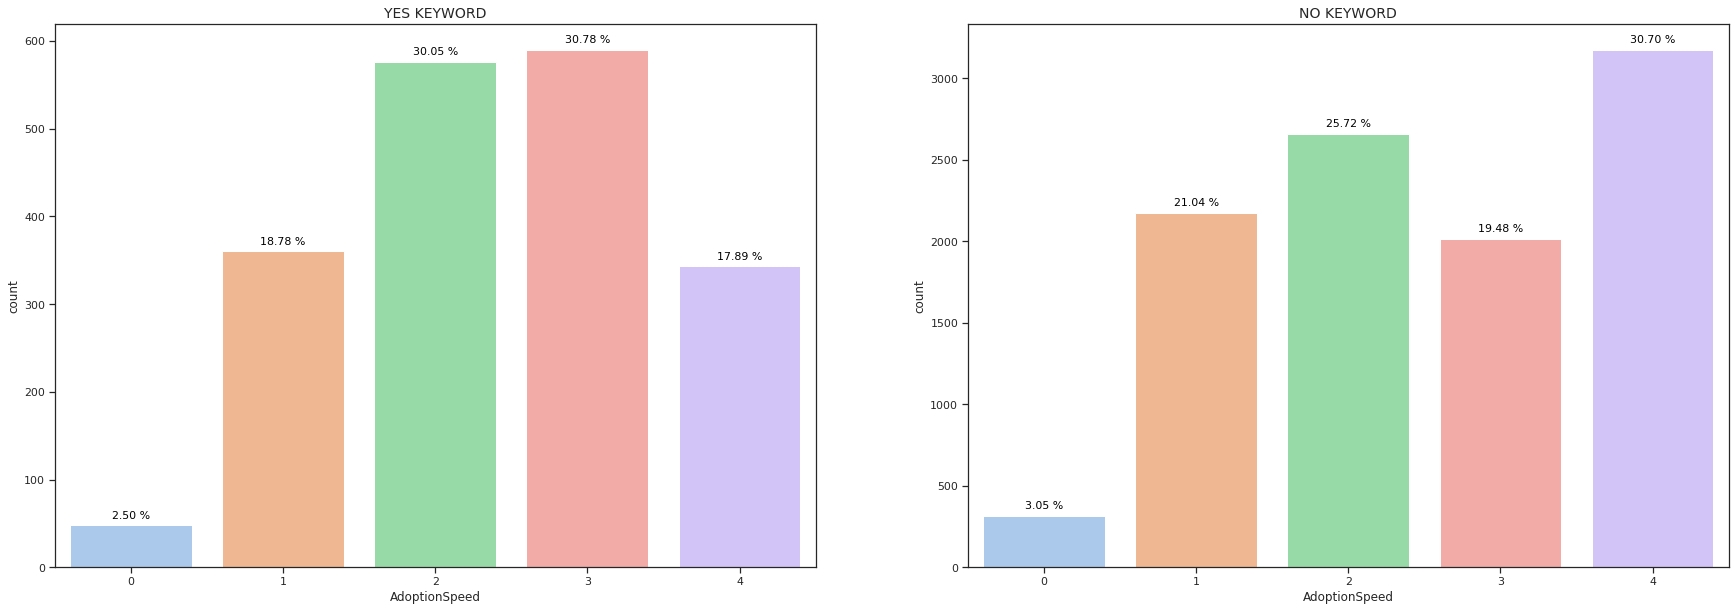

In [68]:
YESKeyword=train_NLP[(train_NLP['lemmatized'].str.contains('neuter')) | (train_NLP['lemmatized'].str.contains('spay')) & (train_NLP['lemmatized'].str.contains('interested'))]
NOKeyword=train_NLP[(~train_NLP['lemmatized'].str.contains('neuter')) & (~train_NLP['lemmatized'].str.contains('spay'))& (~train_NLP['lemmatized'].str.contains('interested'))]
compareWords(YESKeyword,NOKeyword)

train is also a good to have keyword, the train keyword add vital information to wheter or not the pet trained to commands, litter box, cage and more.


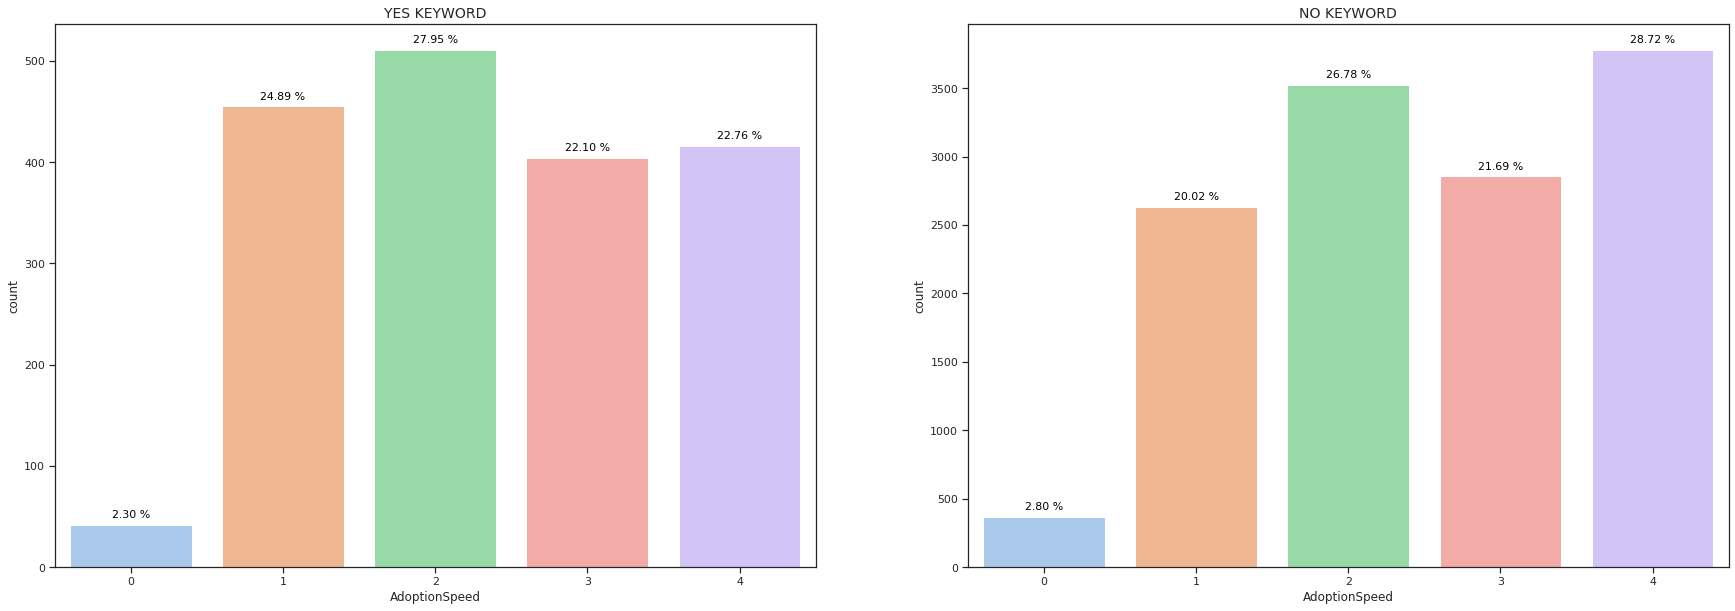

In [69]:
keywords=['train']
YESKeyword=train_NLP[train_NLP['lemmatized'].str.contains('|'.join(keywords))]
NOKeyword=train_NLP[~train_NLP['lemmatized'].str.contains('|'.join(keywords))]
compareWords(YESKeyword,NOKeyword)

by using keywords that shows the level of activity of the pet we can increase the adoption chances by a small margin, this comparsion is backed by 57% of the data.

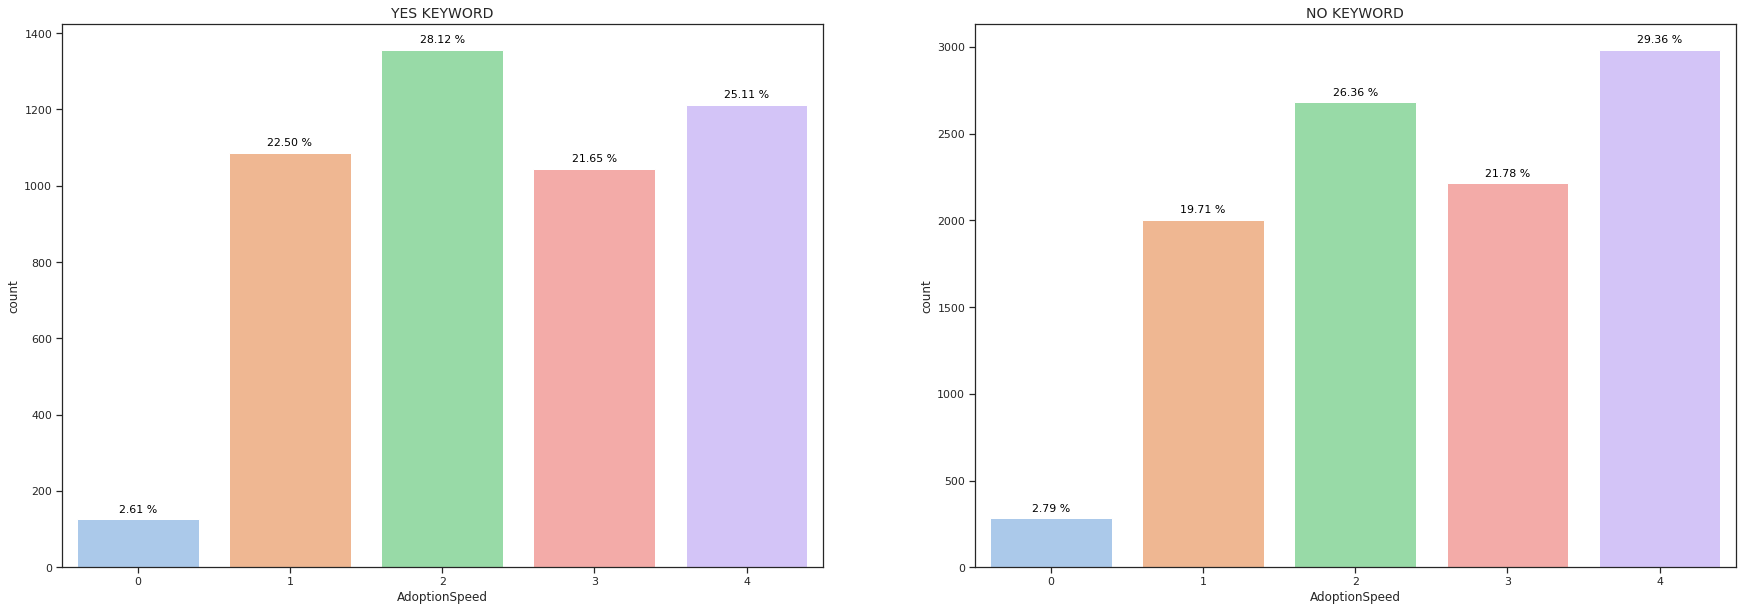

In [70]:
keywords=['play','playful','active']
YESKeyword=train_NLP[train_NLP['lemmatized'].str.contains('|'.join(keywords))]
NOKeyword=train_NLP[~train_NLP['lemmatized'].str.contains('|'.join(keywords))]
compareWords(YESKeyword,NOKeyword)

**Let's try to find out which words can hurt the adoption rate of the pet**


unfortunately i didn't find major insights or words that should be avoided at all cost, but I will recap some of my conclusions:

1. the keywords dog and friendly have a lower adoption rate but why?

 **"dog"**: 23.8% of the rows have this word, there is a 7.3% difference in adoption rate. more details below.
 
 **"friendly"** :12.7% of the rows have this word, there is a  6.7%% difference in adoption rate. more details below.


2. we can see that heart warming or needy words like:  loving, help, need, live, forever, house, hope, family, care

   doesn't provide anything and can even hurt the chances of adoption by using these words or by reflecting the reality too much.
   
**I would recommend using the descrption text box to talk about the good qualities of the pet and not writing an heart warming story**



In [71]:
wordAdoption.sort_values('Difference between adoption Rate',ascending=False).head(30)

Word  Numbers of Rows that has the word  \
1        dog                               3567   
29  friendly                               1907   
76      year                               1002   
63    loving                               1025   
78      area                                838   
80  whatsapp                                660   
79    friend                               2581   
50      help                               1095   
81     leave                                800   
15      need                               2327   
85      live                               1066   
98      stay                                759   
58     stray                               1030   
2        cat                               4271   
9       good                               3017   
64   forever                               1004   
26     house                               1877   
49      hope                               1291   
53      come                               1415   
59      know                               1073   
93      free                                820   
90     human                                772   
35    family                               1461   
16      care                               2456   
83   abandon                                870   
66     bring                                922   
20    rescue                               2573   
36    female                               1501   
62       fee                               2156   
54    people                               1045   

    % of rows with that word in the Data   Have the word, No Adoption   \
1                               0.237911                          1197   
29                              0.127193                           646   
76                              0.066831                           343   
63                              0.068365                           345   
78                              0.055893                           269   
80                              0.044021                           212   
79                              0.172147                           810   
50                              0.073034                           341   
81                              0.053358                           244   
15                              0.155206                           702   
85                              0.071100                           320   
98                              0.050624                           226   
58                              0.068699                           306   
2                               0.284866                          1238   
9                               0.201227                           878   
64                              0.066965                           292   
26                              0.125192                           537   
49                              0.086107                           368   
53                              0.094377                           403   
59                              0.071567                           305   
93                              0.054692                           233   
90                              0.051491                           219   
35                              0.097445                           414   
16                              0.163810                           695   
83                              0.058027                           246   
66                              0.061495                           258   
20                              0.171613                           717   
36                              0.100113                           415   
62                              0.143800                           596   
54                              0.069699                           287   

    Have the word % no Adoption  No Word, No Adoption  No word % no Adoption  \
1                      0.335576                  30

**Why does the word "Dog" has such a bad adoption rate and why the word "friendly" who suppose to be a good quality has a bad adoption rate too?**

we already know that referring to a pet by a generic name or no name (dog, cat) can lower the adoption rate, we also know that dogs has lower adoption rate then cats but what is the main reason here?

people can tell that the pet is a dog by the pictures of it, there is no need to add the word dog for it.

why "Friendly" has lower adoptin rate too? are they connected?

HAHA i got an idea!!! 

we know that friendly is a good trait but what if people uses the words Friendly and Dog to say that the pet **is not** dog friendly?

Let's checkout Dog and Friendly charts, seems like the charts are pretty similar, that strengthen my idea.

Dog keyward charts

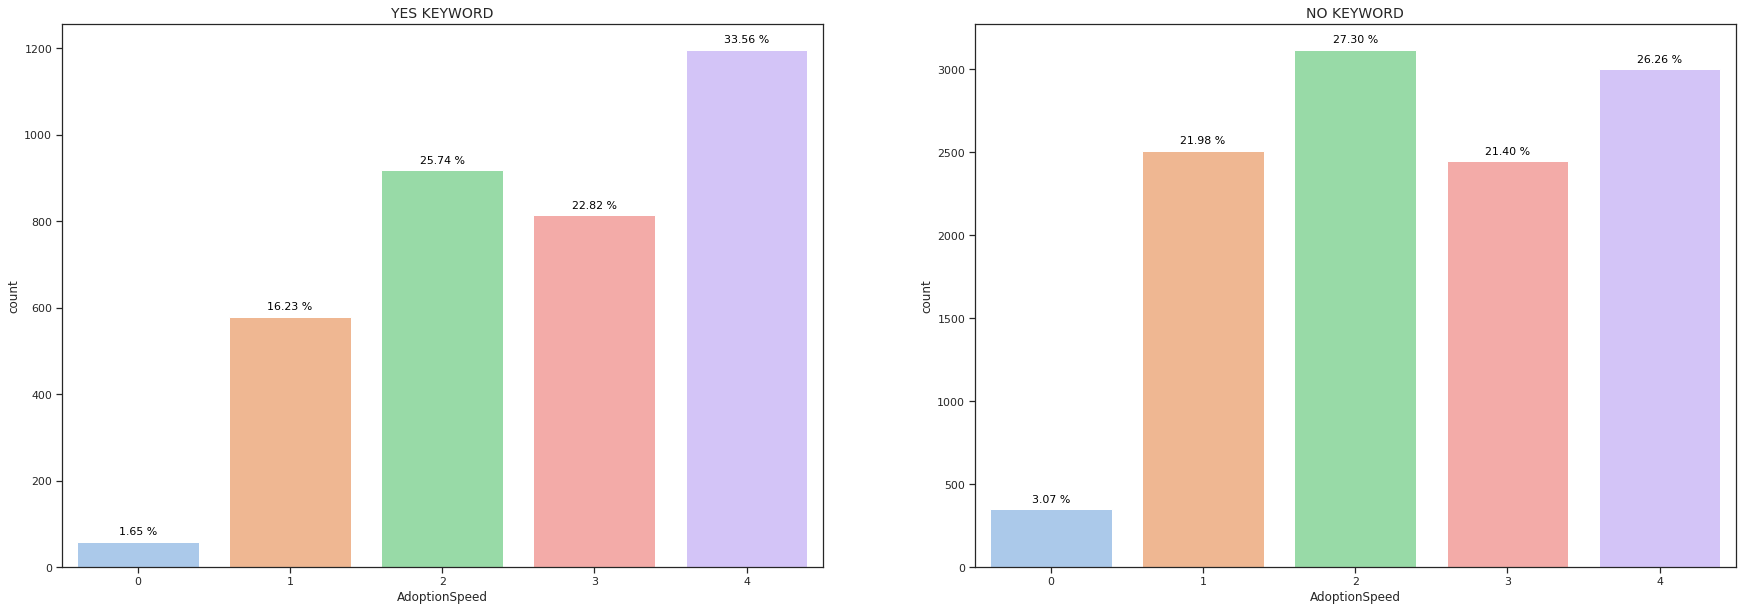

In [72]:
keywords=['dog']
YESKeyword=train_NLP[train_NLP['lemmatized'].str.contains('|'.join(keywords))]
NOKeyword=train_NLP[~train_NLP['lemmatized'].str.contains('|'.join(keywords))]
compareWords(YESKeyword,NOKeyword)

Friendly keyword charts

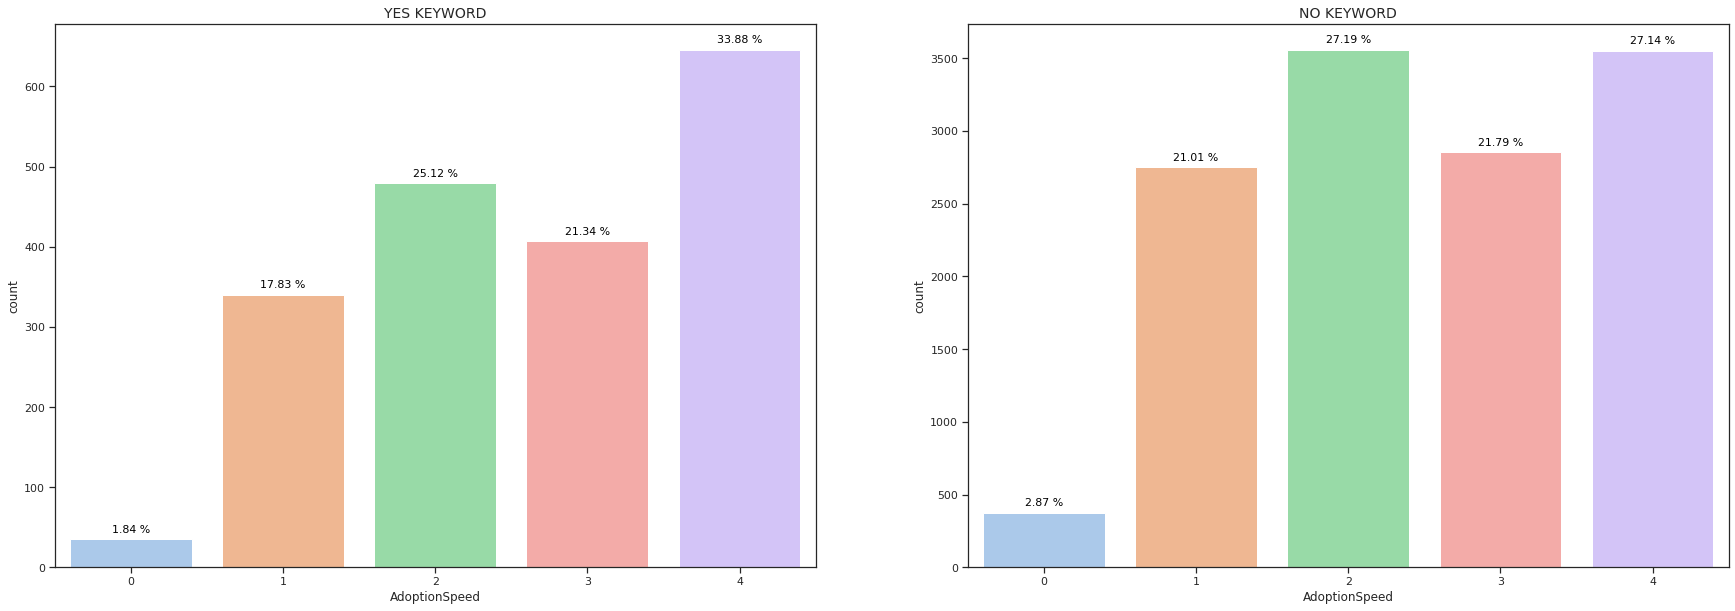

In [73]:
keywords=['friendly']
YESKeyword=train_NLP[train_NLP['lemmatized'].str.contains('|'.join(keywords))]
NOKeyword=train_NLP[~train_NLP['lemmatized'].str.contains('|'.join(keywords))]
compareWords(YESKeyword,NOKeyword)

What if a pet has both the words dog and friendly?

seems like pets with both words have a lower adoption rate in around 12.3%.

unfortunately the insight is backed by 6.7% of the data only.




<Figure size 1440x720 with 0 Axes>

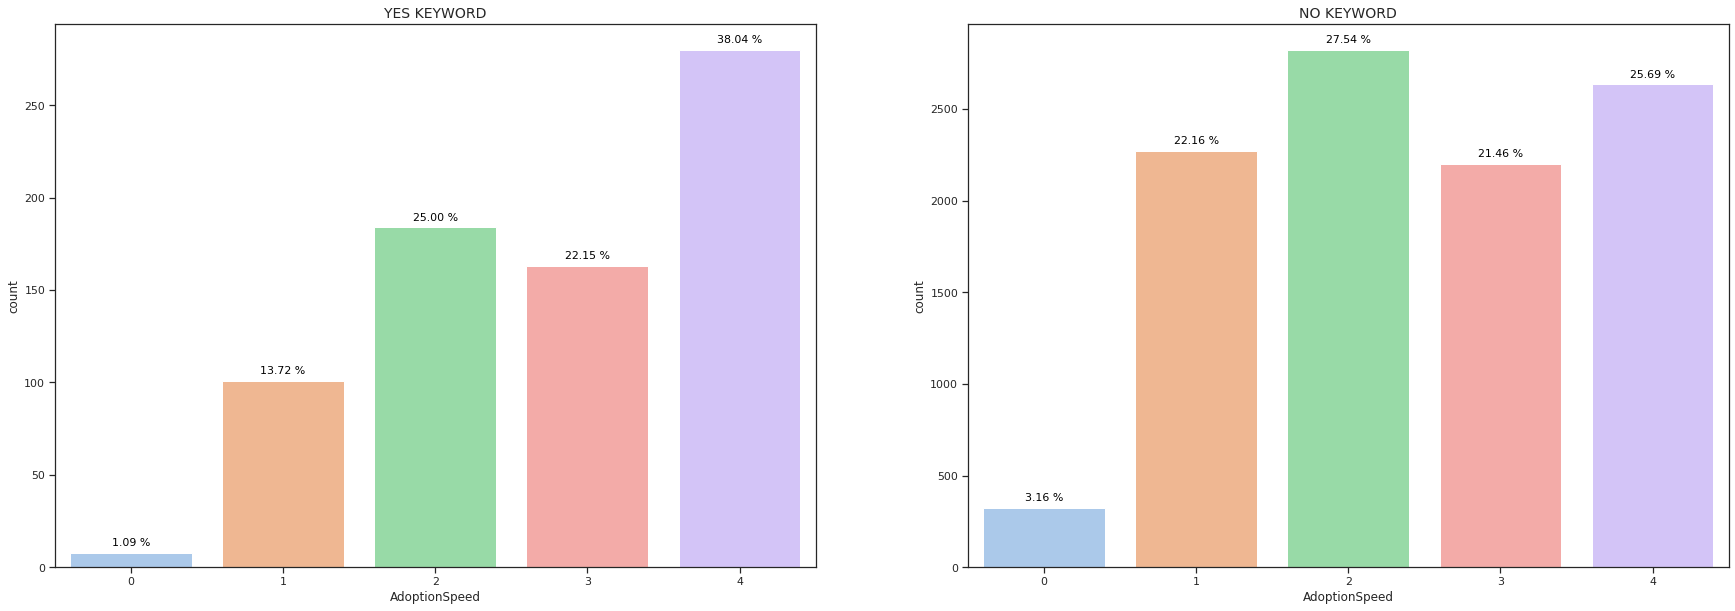

In [74]:
YESKeyword=train_NLP[(train_NLP['lemmatized'].str.contains('friendly')) & (train_NLP['lemmatized'].str.contains('dog'))  ]
NOKeyword=train_NLP[(~train_NLP['lemmatized'].str.contains('friendly')) & (~train_NLP['lemmatized'].str.contains('dog'))]
plt.figure(figsize=(20, 10))
compareWords(YESKeyword,NOKeyword)

# Data fields summary

**PetID** - Unique hash ID of pet profile

**AdoptionSpeed** - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.

**Type** - Type of animal (1 = Dog, 2 = Cat)

**Name** - Name of pet (Empty if not named)

**Age** - Age of pet when listed, in months

**Breed1** - Primary breed of pet (Refer to BreedLabels dictionary)

**Breed2** - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)

**Gender** - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)

**Color1** - Color 1 of pet (Refer to ColorLabels dictionary)

**Color2** - Color 2 of pet (Refer to ColorLabels dictionary)

**Color3** - Color 3 of pet (Refer to ColorLabels dictionary)

**MaturitySize** - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)

**FurLength** - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)

**Vaccinated** - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)

**Dewormed** - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)

**Sterilized** - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)

**Health** - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)

**Quantity** - Number of pets represented in profile

**Fee** - Adoption fee (0 = Free)

**State** - State location in Malaysia (Refer to StateLabels dictionary)

**RescuerID** - Unique hash ID of rescuer

**VideoAmt** - Total uploaded videos for this pet

**PhotoAmt** - Total uploaded photos for this pet

**Description** - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

# AdoptionSpeed

Contestants are required to predict this value. The value is determined by how quickly, if at all, a pet is adopted.

The values are determined in the following way:

**0** - Pet was adopted on the same day as it was listed.

**1** - Pet was adopted between 1 and 7 days (1st week) after being listed.

**2** - Pet was adopted between 8 and 30 days (1st month) after being listed.

**3** - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.

**4** - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

# Summary and Ideas after EDA

* It can be a good idea to split the data into Cats and Dogs and try to make seperate models for each of them.
* The Data need some cleaning of outliers, need to decide how to handle them.
* There are some categories that can be dropped like states or Color2-3 that we will not use now.
* I can build a NLP model upon The Description and Lemmatized columns.
* I can try to use Pets photos to build a CNN model.

# Preparing the Data for the Model - First Version DataFrame #1

I will build differnet Train DataFrames based on some of the insights from the EDA.

# DataFrame 1 

Main Points:
1. remove Outliers and Normalize Numerical columns
2. Work with one hot encoding for categorical data


Lets first remove the data columns that i will not use for sure atm.

In [75]:
train_df.head()
trainDropped_df=train_df.copy()
trainDropped_df.drop(['Breed2', 'State','RescuerID','Description','Color2','Color3','PetID','lemmatized'], axis=1, inplace=True)

test_df.head()
testDropped_df=test_df.copy()
testDropped_df['Description']=testDropped_df['Description'].fillna('').values
testDropped_df['DescriptonWordsCount'] = testDropped_df['Description'].apply(lambda x: len(x.split()))

testDropped_df.drop(['Breed2', 'State','RescuerID','Description','Color2','Color3','PetID'], axis=1, inplace=True)

In [76]:
trainDropped_df.head()

Type         Name  Age  Breed1  Gender  Color1  MaturitySize  FurLength  \
0     2       Nibble    3     299       1       1             1          1   
1     2  No Name Yet    1     265       1       1             2          2   
2     1       Brisco    1     307       1       2             2          2   
3     1         Miko    4     307       2       1             2          1   
4     1       Hunter    1     307       1       1             2          1   

   Vaccinated  Dewormed  Sterilized  Health  Quantity  Fee  VideoAmt  \
0           2         2           2       1         1  100         0   
1           3         3           3       1         1    0         0   
2           1         1           2       1         1    0         0   
3           1         1           2       1         1  150         0   
4           2         2           2       1         1    0         0   

   PhotoAmt  AdoptionSpeed  DescriptonWordsCount  sentiment_TEXT  
0       1.0              2                    69  Medium Postive  
1       2.0              0                    23   Weak Negative  
2       7.0              3                    69  Medium Postive  
3       8.0              2                    25    Weak Postive  
4       3.0              2                    81  Medium Postive

In [77]:
trainCleaned1_df=trainDropped_df.copy()
testCleaned1_df=testDropped_df.copy()


**Change Name Column to Name Vs No Name**

In [78]:
trainCleaned1_df['Name'] =trainCleaned1_df['Name'].fillna('NULL')
trainCleaned1_df['Name'].replace({"No Name": "NULL", "No Name Yet": "NULL", "Unknown": "NULL"},inplace=True)
trainCleaned1_df.loc[trainCleaned1_df['Name'] !="NULL", 'Name'] = 'HasName'
print(trainCleaned1_df['Name'].value_counts())


testCleaned1_df['Name'] =testCleaned1_df['Name'].fillna('NULL')
testCleaned1_df['Name'].replace({"No Name": "NULL", "No Name Yet": "NULL", "Unknown": "NULL"},inplace=True)
testCleaned1_df.loc[testCleaned1_df['Name'] !="NULL", 'Name'] = 'HasName'


HasName    13645
NULL        1348
Name: Name, dtype: int64


**Bin the Breed1 Column to 6 categories like in the EDA**

* we can also dive deeper and UnBin the top 10-20 categories of Pure Dogs and Cats, see if that will change something

In [79]:

trainCleaned1_df.loc[(trainCleaned1_df['Breed1']!=266) & (trainCleaned1_df['Breed1']!=265) & (trainCleaned1_df['Breed1']!=264) & (trainCleaned1_df['Breed1']!=307) & (trainCleaned1_df['Type']== 2),'Breed1'] ="Pure Cats"
trainCleaned1_df.loc[(trainCleaned1_df['Breed1']!=266) & (trainCleaned1_df['Breed1']!=265) & (trainCleaned1_df['Breed1']!=264) & (trainCleaned1_df['Breed1']!=307) & (trainCleaned1_df['Type']== 1),'Breed1'] ="Pure Dogs"
trainCleaned1_df.loc[(trainCleaned1_df['Breed1']==307),'Breed1']='Mixed Dog'
trainCleaned1_df.loc[(trainCleaned1_df['Breed1']==266),'Breed1']='Domestic short Hair Cat'
trainCleaned1_df.loc[(trainCleaned1_df['Breed1']==265),'Breed1']='Domestic Medium Hair Cat'
trainCleaned1_df.loc[(trainCleaned1_df['Breed1']==264),'Breed1']='Domestic Long Hair Cat'

print(trainCleaned1_df['Breed1'].value_counts())

testCleaned1_df.loc[(testCleaned1_df['Breed1']!=266) & (testCleaned1_df['Breed1']!=265) & (testCleaned1_df['Breed1']!=264) & (testCleaned1_df['Breed1']!=307) & (testCleaned1_df['Type']== 2),'Breed1'] ="Pure Cats"
testCleaned1_df.loc[(testCleaned1_df['Breed1']!=266) & (testCleaned1_df['Breed1']!=265) & (testCleaned1_df['Breed1']!=264) & (testCleaned1_df['Breed1']!=307) & (testCleaned1_df['Type']== 1),'Breed1'] ="Pure Dogs"
testCleaned1_df.loc[(testCleaned1_df['Breed1']==307),'Breed1']='Mixed Dog'
testCleaned1_df.loc[(testCleaned1_df['Breed1']==266),'Breed1']='Domestic short Hair Cat'
testCleaned1_df.loc[(testCleaned1_df['Breed1']==265),'Breed1']='Domestic Medium Hair Cat'
testCleaned1_df.loc[(testCleaned1_df['Breed1']==264),'Breed1']='Domestic Long Hair Cat'


Mixed Dog                   5927
Domestic short Hair Cat     3634
Pure Dogs                   2209
Pure Cats                   1669
Domestic Medium Hair Cat    1258
Domestic Long Hair Cat       296
Name: Breed1, dtype: int64


**Change Gender Labels to Male, Female, Group**


In [80]:
trainCleaned1_df.loc[(trainCleaned1_df['Gender']==1),'Gender']='Male'
trainCleaned1_df.loc[(trainCleaned1_df['Gender']==2),'Gender']='Female'
trainCleaned1_df.loc[(trainCleaned1_df['Gender']==3),'Gender']='Mixed'

testCleaned1_df.loc[(testCleaned1_df['Gender']==1),'Gender']='Male'
testCleaned1_df.loc[(testCleaned1_df['Gender']==2),'Gender']='Female'
testCleaned1_df.loc[(testCleaned1_df['Gender']==3),'Gender']='Mixed'

**Change Color1 Labels to 1-Black
2-Brown
3-Golden
4-Yellow
5-Cream
6-Gray
7-White**


In [81]:
colors=["Nan","Black","Brown","Golden","Yellow","Cream","Gray","White"]

for i in range(1,8):
    trainCleaned1_df.loc[(trainCleaned1_df['Color1']==i),'Color1']=colors[i]
    
print(trainCleaned1_df['Color1'].value_counts())

colors=["Nan","Black","Brown","Golden","Yellow","Cream","Gray","White"]

for i in range(1,8):
    testCleaned1_df.loc[(testCleaned1_df['Color1']==i),'Color1']=colors[i]

Black     7427
Brown     3750
Golden     947
Cream      884
Gray       684
White      667
Yellow     634
Name: Color1, dtype: int64


**Bin Fee to Paid Pets and Free Pets**
* we can also try to bin per intervals or leave it as numerical value

In [82]:
trainCleaned1_df

Type     Name  Age                    Breed1  Gender  Color1  \
0         2  HasName    3                 Pure Cats    Male   Black   
1         2     NULL    1  Domestic Medium Hair Cat    Male   Black   
2         1  HasName    1                 Mixed Dog    Male   Brown   
3         1  HasName    4                 Mixed Dog  Female   Black   
4         1  HasName    1                 Mixed Dog    Male   Black   
...     ...      ...  ...                       ...     ...     ...   
14988     2     NULL    2   Domestic short Hair Cat   Mixed   Black   
14989     2  HasName   60  Domestic Medium Hair Cat   Mixed   Black   
14990     2  HasName    2  Domestic Medium Hair Cat   Mixed   Cream   
14991     2  HasName    9   Domestic short Hair Cat  Female  Yellow   
14992     1  HasName    1                 Mixed Dog    Male   Brown   

       MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health  \
0                 1          1           2         2           2       1   
1                 2          2           3         3           3       1   
2                 2          2           1         1           2       1   
3                 2          1           1         1           2       1   
4                 2          1           2         2           2       1   
...             ...        ...         ...       ...         ...     ...   
14988             2          2           2         2           2       1   
14989             2          2           1         1           1       1   
14990             3          2           2         1           3       1   
14991             1          1           1         1           1       1   
14992             2          1           2         2           2       1   

       Quantity  Fee  VideoAmt  PhotoAmt  AdoptionSpeed  DescriptonWordsCount  \
0             1  100         0       1.0              2                    69   
1             1    0         0       2.0              0                    23   
2             1    0         0       7.0              3                    69   
3             1  150         0       8.0              2                    25   
4             1    0         0       3.0              2                    81   
...         ...  ...       ...       ...            ...                   ...   
14988         4    0         0       3.0              2                    78   
14989         2    0         0       3.0              4                    31   
14990         5   30         0       5.0              3                     9   
14991         1    0         0       3.0              4                    18   
14992         1    0         0       1.0              3                    16   

       sentiment_TEXT  
0      Medium Postive  
1       Weak Negative  
2      Medium Postive  
3        Weak Postive  
4      Medium Postive  
...               ...  
14988  Medium Postive  
14989         Netural  
14990  Medium Postive  
14991    Weak Postive  
14992    Weak Postive  

[14993 rows x 19 columns]

In [83]:
trainCleaned1_df.loc[trainCleaned1_df['Fee']>=1, 'Fee']='Paid'
trainCleaned1_df.loc[trainCleaned1_df['Fee']==0, 'Fee']='Free'

testCleaned1_df.loc[testCleaned1_df['Fee']>=1, 'Fee']='Paid'
testCleaned1_df.loc[testCleaned1_df['Fee']==0, 'Fee']='Free'

**Bin Video Amount to Have Video Vs No Video**
* we can also try to drop this column

In [84]:
trainCleaned1_df.loc[trainCleaned1_df['VideoAmt']>=1, 'VideoAmt']='YesVideo'
trainCleaned1_df.loc[trainCleaned1_df['VideoAmt']==0, 'VideoAmt']='NoVideo'

testCleaned1_df.loc[testCleaned1_df['VideoAmt']>=1, 'VideoAmt']='YesVideo'
testCleaned1_df.loc[testCleaned1_df['VideoAmt']==0, 'VideoAmt']='NoVideo'

**Make Dummies for Categorical Data**

In [85]:
trainCleaned1_df['Type'] = pd.Categorical(trainCleaned1_df.Type)
trainCleaned1_df['Gender'] = pd.Categorical(trainCleaned1_df.Gender)
trainCleaned1_df['Vaccinated'] = pd.Categorical(trainCleaned1_df.Vaccinated)
trainCleaned1_df['Dewormed'] = pd.Categorical(trainCleaned1_df.Dewormed)
trainCleaned1_df['Sterilized'] = pd.Categorical(trainCleaned1_df.Sterilized)
trainCleaned1_df['Health'] = pd.Categorical(trainCleaned1_df.Health)
trainCleaned1_df=pd.get_dummies(trainCleaned1_df)

testCleaned1_df['Type'] = pd.Categorical(testCleaned1_df.Type)
testCleaned1_df['Gender'] = pd.Categorical(testCleaned1_df.Gender)
testCleaned1_df['Vaccinated'] = pd.Categorical(testCleaned1_df.Vaccinated)
testCleaned1_df['Dewormed'] = pd.Categorical(testCleaned1_df.Dewormed)
testCleaned1_df['Sterilized'] = pd.Categorical(testCleaned1_df.Sterilized)
testCleaned1_df['Health'] = pd.Categorical(testCleaned1_df.Health)
testCleaned1_df=pd.get_dummies(testCleaned1_df)

**Now Lets remove outliers from the rest of the Numeric values**

**Remove Outliers from Age**

* we can also Bin Age like we did in the EDA, This is a possbility that i will explore later.

count    14993.000000
mean        10.452078
std         18.155790
min          0.000000
25%          2.000000
50%          3.000000
75%         12.000000
max        255.000000
Name: Age, dtype: float64
count    14615.000000
mean         8.351488
std         12.037444
min          0.000000
25%          2.000000
50%          3.000000
75%          9.000000
max         64.000000
Name: Age, dtype: float64


<AxesSubplot:xlabel='Age', ylabel='Count'>

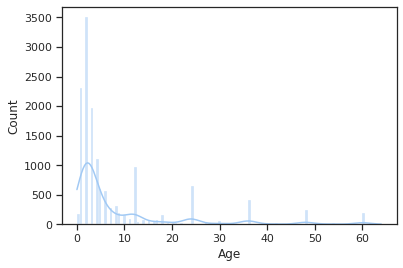

In [86]:
print(trainCleaned1_df['Age'].describe())
trainCleaned1_df=trainCleaned1_df[(np.abs(stats.zscore(trainCleaned1_df['Age'])) < 3)]
print(trainCleaned1_df['Age'].describe())
sns.histplot(data=trainCleaned1_df, x='Age',kde=True)

count    14615.000000
mean         3.912077
std          3.500533
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         30.000000
Name: PhotoAmt, dtype: float64
count    14332.000000
mean         3.592241
std          2.603131
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         14.000000
Name: PhotoAmt, dtype: float64


<AxesSubplot:xlabel='PhotoAmt', ylabel='Count'>

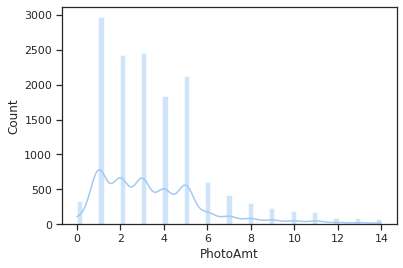

In [87]:
print(trainCleaned1_df['PhotoAmt'].describe())
trainCleaned1_df=trainCleaned1_df[(np.abs(stats.zscore(trainCleaned1_df['PhotoAmt'])) < 3)]
print(trainCleaned1_df['PhotoAmt'].describe())

sns.histplot(data=trainCleaned1_df, x='PhotoAmt',kde=True)

count    14332.000000
mean         1.570541
std          1.451413
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         20.000000
Name: Quantity, dtype: float64
count    13944.000000
mean         1.398523
std          0.913705
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: Quantity, dtype: float64


<AxesSubplot:xlabel='Quantity', ylabel='Count'>

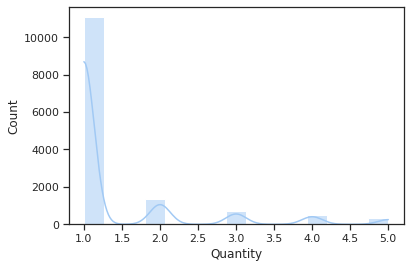

In [88]:
print(trainCleaned1_df['Quantity'].describe())
trainCleaned1_df=trainCleaned1_df[(np.abs(stats.zscore(trainCleaned1_df['Quantity'])) < 3)]
print(trainCleaned1_df['Quantity'].describe())

sns.histplot(data=trainCleaned1_df, x='Quantity',kde=True)

count    13944.000000
mean        61.205536
std         66.060187
min          0.000000
25%         21.000000
50%         43.000000
75%         79.000000
max       1257.000000
Name: DescriptonWordsCount, dtype: float64
count    13693.000000
mean        55.595268
std         48.363082
min          0.000000
25%         20.000000
50%         42.000000
75%         77.000000
max        259.000000
Name: DescriptonWordsCount, dtype: float64


<AxesSubplot:xlabel='DescriptonWordsCount', ylabel='Count'>

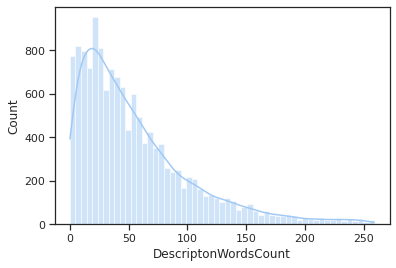

In [89]:
print(trainCleaned1_df['DescriptonWordsCount'].describe())
trainCleaned1_df=trainCleaned1_df[(np.abs(stats.zscore(trainCleaned1_df['DescriptonWordsCount'])) < 3)]
print(trainCleaned1_df['DescriptonWordsCount'].describe())

sns.histplot(data=trainCleaned1_df, x='DescriptonWordsCount',kde=True)

**Now Let's go and Normalize the data**

In [90]:
column_names_to_normalize = ['Age','MaturitySize','FurLength','Quantity','PhotoAmt','DescriptonWordsCount']
x = trainCleaned1_df[column_names_to_normalize].values
scaler = MinMaxScaler()

x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = trainCleaned1_df.index)
trainCleaned1_df[column_names_to_normalize] = df_temp

column_names_to_normalize = ['Age','MaturitySize','FurLength','Quantity','PhotoAmt','DescriptonWordsCount']
x = testCleaned1_df[column_names_to_normalize].values
scaler = MinMaxScaler()

x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = testCleaned1_df.index)
testCleaned1_df[column_names_to_normalize] = df_temp

**Prepare Train Data and Prepare TestData as valid data.**

In [91]:
trainData=trainCleaned1_df.copy()
trainData=trainData.drop(['AdoptionSpeed'],axis=1)
trainTarget=trainCleaned1_df.copy()
trainTarget=trainTarget['AdoptionSpeed']

x_test=testCleaned1_df.copy()

**Create DataFrames of Cats and dog separately**

Let's try if the model will work better when trained and tested on Cats and Dogs separately.

In [92]:
#making a Dog DS
dogsTrainData=trainCleaned1_df[(trainCleaned1_df['Type_1']==1)]
dogsTrainData=dogsTrainData.drop(['Type_2'],axis=1)
dogsTrainData=dogsTrainData.drop(['Type_1'],axis=1)
dogsTrainTarget=dogsTrainData.copy()
dogsTrainTarget=dogsTrainTarget['AdoptionSpeed']
dogsTrainData=dogsTrainData.drop(['AdoptionSpeed'],axis=1)

#Making a Cat DS
catsTrainData=trainCleaned1_df[(trainCleaned1_df['Type_1']==0)]
catsTrainData=catsTrainData.drop(['Type_2'],axis=1)
catsTrainData=catsTrainData.drop(['Type_1'],axis=1)
catsTrainTarget=catsTrainData.copy()
catsTrainTarget=catsTrainTarget['AdoptionSpeed']
catsTrainData=catsTrainData.drop(['AdoptionSpeed'],axis=1)

# Build XGBoost Model Version #1 DataFrame #1

In [93]:

def quadratic_kappa(actuals, preds, N=5):
    """This function calculates the Quadratic Kappa Metric used for Evaluation in the PetFinder competition
    at Kaggle. It returns the Quadratic Weighted Kappa metric score between the actual and the predicted values 
    of adoption rating."""
    w = np.zeros((N,N))
    O = confusion_matrix(actuals, preds)
    for i in range(len(w)): 
        for j in range(len(w)):
            w[i][j] = float(((i-j)**2)/(N-1)**2)
    
    act_hist=np.zeros([N])
    for item in actuals: 
        act_hist[item]+=1
    
    pred_hist=np.zeros([N])
    for item in preds: 
        pred_hist[item]+=1
                         
    E = np.outer(act_hist, pred_hist);
    E = E/E.sum();
    O = O/O.sum();
    
    num=0
    den=0
    for i in range(len(w)):
        for j in range(len(w)):
            num+=w[i][j]*O[i][j]
            den+=w[i][j]*E[i][j]
    return (1 - (num/den))


Spliting the Train Test to Train and Test

In [94]:
#combined model
data_dmatrix = xgb.DMatrix(data=trainData,label=trainTarget)
X_train, X_test, y_train, y_test = train_test_split(trainData, trainTarget, test_size=0.25, random_state=123,stratify=trainTarget)


In [95]:
# Cats and Dogs Models
dataDogs_dmatrix = xgb.DMatrix(data=dogsTrainData,label=dogsTrainTarget)
dataCats_dmatrix = xgb.DMatrix(data=catsTrainData,label=catsTrainTarget)

X_trainDogs, X_testDogs, y_trainDogs, y_testDogs = train_test_split(dogsTrainData, dogsTrainTarget, test_size=0.25, random_state=123)
X_trainCats, X_testCats, y_trainCats, y_testCats = train_test_split(catsTrainData, catsTrainTarget, test_size=0.25, random_state=123)


Playing with some params -39.78% accuracy and 0.325% weighted Kappa is not bad for a first try without tuning anything at the model and using all the Data, We got plenty of room for improvments! (the Weighted Kappa that won the competiton is 45%)

In [96]:
model = XGBClassifier( colsample_bytree = 0.3, learning_rate = 0.5,
                max_depth = 15, alpha = 20, n_estimators = 20,use_label_encoder=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(quadratic_kappa(y_test, predictions))




[06:42:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 39.78%
0.32649894391044687


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


**Training Dogs and Cats Models**

Let's try to train two models one for Dogs and one for Cats

In [97]:
DogsModel = XGBClassifier( colsample_bytree = 0.3, learning_rate = 0.5,
                max_depth = 15, alpha = 20, n_estimators = 20, use_label_encoder=False)
DogsModel.fit(X_trainDogs, y_trainDogs)
y_predDogs = DogsModel.predict(X_testDogs)
predictionsDogs = [round(value) for value in y_predDogs]
accuracyDogs = accuracy_score(y_testDogs, predictionsDogs)
print('Dogs Model Details:')
print("Accuracy: %.2f%%" % (accuracyDogs * 100.0))
print(f'Quadratic_kappa {quadratic_kappa(y_testDogs, predictionsDogs)}')


CatsModel = XGBClassifier( colsample_bytree = 0.3, learning_rate = 0.5,
                max_depth = 15, alpha = 20, n_estimators = 20,use_label_encoder=False)
CatsModel.fit(X_trainCats, y_trainCats)
y_predCats = CatsModel.predict(X_testCats)

predictionsCats = [round(value) for value in y_predCats]
accuracyCats = accuracy_score(y_testCats, predictionsCats)
print('Cats Model Details:')
print("Accuracy: %.2f%%" % (accuracyCats * 100.0))
print(f'Quadratic_kappa {quadratic_kappa(y_testCats, predictionsCats)}')

[06:42:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


Dogs Model Details:
Accuracy: 41.42%
Quadratic_kappa 0.3530208785068104
[06:42:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Cats Model Details:
Accuracy: 36.43%
Quadratic_kappa 0.288281775140918


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


**Results of 3 Models**

Seems like on AVG here we get better results when using using Cats and Dogs Model Separately , we get around 0.335 Kappa Score instead of 0.30 while using the combined model

In [98]:
print(tabulate([['CombinedModel', accuracy * 100.0,quadratic_kappa(y_test, predictions)],
                ['CatsModel', accuracyCats * 100.0,quadratic_kappa(y_testCats, predictionsCats)],
                ['DogsModel',accuracyDogs * 100.0,quadratic_kappa(y_testDogs, predictionsDogs)]],
               headers=['Model Name', 'Accuracy','Quadratic Kappa']))

Model Name       Accuracy    Quadratic Kappa
-------------  ----------  -----------------
CombinedModel     39.778            0.326499
CatsModel         36.4259           0.288282
DogsModel         41.4191           0.353021


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

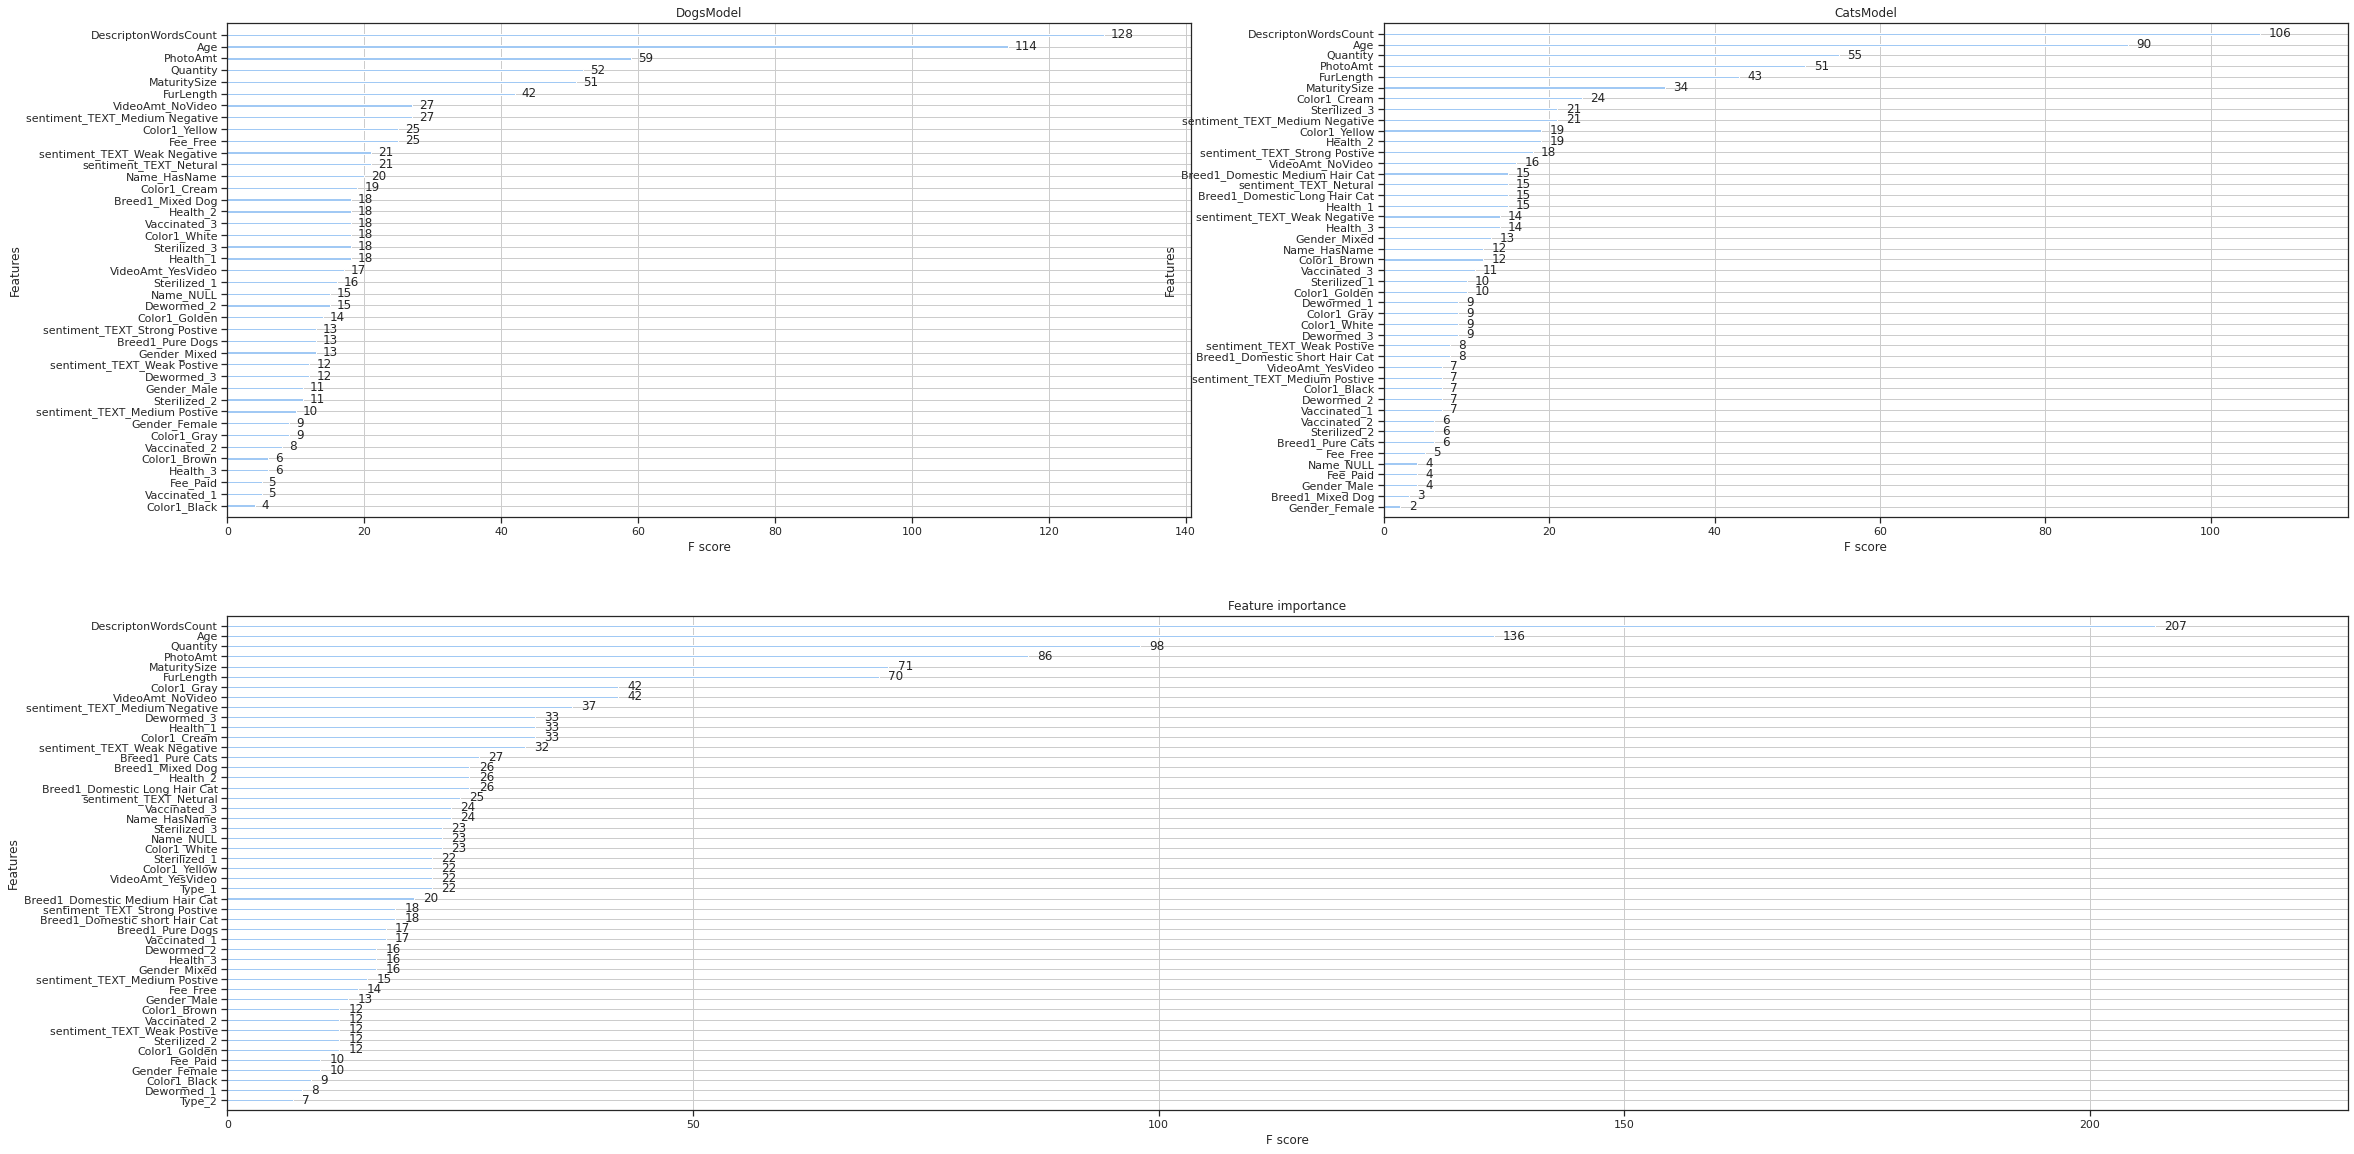

In [99]:
plt.figure(figsize=(38, 20));
ax2 = plt.subplot2grid((2, 2), (0, 0))
xgb.plot_importance(DogsModel,ax=ax2)

plt.title('DogsModel');

ax3 = plt.subplot2grid((2, 2), (0, 1))
xgb.plot_importance(CatsModel,ax=ax3)
plt.title('CatsModel');

ax4 = plt.subplot2grid((2, 2), (1, 0),colspan=2)
plt.title('Combined');

xgb.plot_importance(model,ax=ax4)

we can see some difference between the important features of each model
1. Woha DescriptionWordsCount is the most important Feature here! That is pretty surprising! that Means that extracting NLP info and Sentiment from the Description Could hold valuable information
2. Age is the second most important feature but the age of cats is much more important then the age of dogs.
3. Maturity size of dogs is also more important than of cats, that probably because dogs have a higher variance of sizes.

What a cool tree!

Age is the main tree node, in level 1 we can see Type and Color and in level 2 we can see Quantity, Age again, Breed_Domestic long hair cat and a Leaf already.

most of the leafs are , that is super weird, we should work on a better dataframe and a better model.

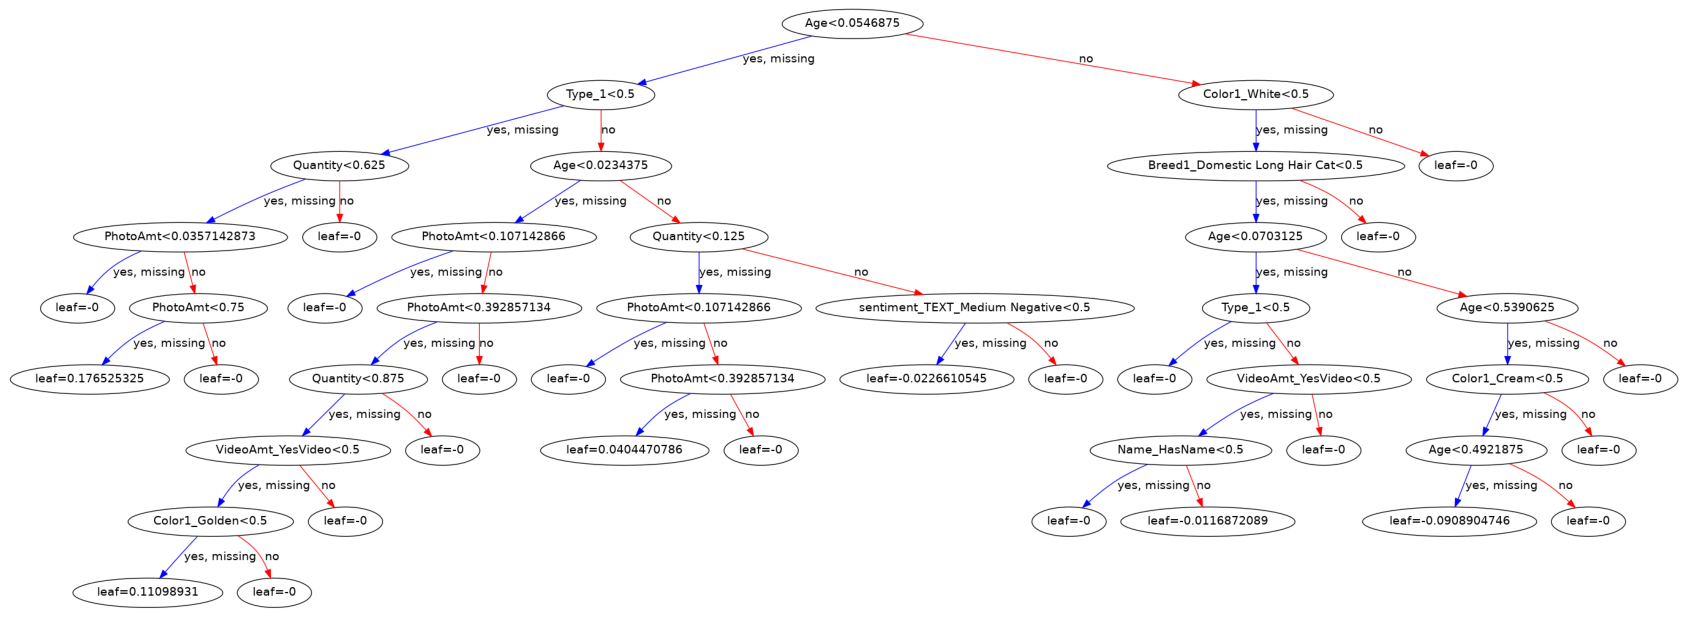

In [100]:
import matplotlib.pyplot as plt

ax=xgb.plot_tree(model,num_trees=1)
fig = ax.figure
fig.set_size_inches(30, 30)
plt.show()



# DataFrame 2

Let's work on another version of the DataFrame and make some changes:

1. we are going to use RescuerID info instead of dropping it.
2. keeping Breed1 Names for popular breeds.
3. add Sentiment Text from NLP section

we will also work on preproccessing the test set!

In [101]:
trainCleaned1_df

Age  MaturitySize  FurLength  Quantity  PhotoAmt  AdoptionSpeed  \
0      0.046875      0.000000        0.0      0.00  0.071429              2   
1      0.015625      0.333333        0.5      0.00  0.142857              0   
2      0.015625      0.333333        0.5      0.00  0.500000              3   
3      0.062500      0.333333        0.0      0.00  0.571429              2   
4      0.015625      0.333333        0.0      0.00  0.214286              2   
...         ...           ...        ...       ...       ...            ...   
14988  0.031250      0.333333        0.5      0.75  0.214286              2   
14989  0.937500      0.333333        0.5      0.25  0.214286              4   
14990  0.031250      0.666667        0.5      1.00  0.357143              3   
14991  0.140625      0.000000        0.0      0.00  0.214286              4   
14992  0.015625      0.333333        0.0      0.00  0.071429              3   

       DescriptonWordsCount  Type_1  Type_2  Name_HasName  Name_NULL  \
0                  0.266409       0       1             1          0   
1                  0.088803       0       1             0          1   
2                  0.266409       1       0             1          0   
3                  0.096525       1       0             1          0   
4                  0.312741       1       0             1          0   
...                     ...     ...     ...           ...        ...   
14988              0.301158       0       1             0          1   
14989              0.119691       0       1             1          0   
14990              0.034749       0       1             1          0   
14991              0.069498       0       1             1          0   
14992              0.061776       1       0             1          0   

       Breed1_Domestic Long Hair Cat  Breed1_Domestic Medium Hair Cat  \
0                                  0                                0   
1                                  0                                1   
2                                  0                                0   
3                                  0                                0   
4                                  0                                0   
...                              ...                              ...   
14988                              0                                0   
14989                              0                                1   
14990                              0                                1   
14991                              0                                0   
14992                              0                                0   

       Breed1_Domestic short Hair Cat  Breed1_Mixed Dog  Breed1_Pure Cats  \
0                                   0                 0                 1   
1                                   0                 0                 0   
2                                   0                 1                 0   
3                                   0                 1                 0   
4                                   0                 1                 0   
...                               ...               ...               ...   
14988                               1                 0                 0   
14989                               0                 0                 0   
14990                               0                 0                 0   
14991                               1                 0                 0   
14992                               0                 1                 0   

       Breed1_Pure Dogs  Gender_Female  Gender_Male  Gender_Mixed  \
0                     0              0            1             0   
1                     0              0            1             0   
2                     0              0            1             0   
3                     0              1            0             0   
4                     0              0            1

In [112]:
train_df.head()
trainDropped_df=train_df.copy()
trainDropped_df.drop(['Breed2', 'State','Color2','Color3'], axis=1, inplace=True)


test_df.head()
testDropped_df=test_df.copy()
testDropped_df['Description']=testDropped_df['Description'].fillna('').values
testDropped_df['DescriptonWordsCount'] = testDropped_df['Description'].apply(lambda x: len(x.split()))

testDropped_df.drop(['Breed2', 'State','Color2','Color3',], axis=1, inplace=True)

trainCleaned1_df=trainDropped_df.copy()
testCleaned1_df=testDropped_df.copy()

#name
trainCleaned1_df['Name'] =trainCleaned1_df['Name'].fillna('NULL')
trainCleaned1_df['Name'].replace({"No Name": "NULL", "No Name Yet": "NULL", "Unknown": "NULL", "Baby": "NULL","Lucky": "NULL","Brownie": "NULL","Blackie": "NULL","Puppy": "NULL","Kitty": "NULL","Kittens":"NULL"},inplace=True)
trainCleaned1_df.loc[trainCleaned1_df['Name'] !="NULL", 'Name'] = 'HasName'


testCleaned1_df['Name'] =testCleaned1_df['Name'].fillna('NULL')
testCleaned1_df['Name'].replace({"No Name": "NULL", "No Name Yet": "NULL", "Unknown": "NULL", "Baby": "NULL","Lucky": "NULL","Brownie": "NULL","Blackie": "NULL","Puppy": "NULL","Kitty": "NULL","Kittens":"NULL"},inplace=True)
testCleaned1_df.loc[testCleaned1_df['Name'] !="NULL", 'Name'] = 'HasName'
#Breed

a=train_df.copy()
counts = a['Breed1'].value_counts()
counts[counts>30] #i have tried many numbers but it seems like 30 is the sweet spot between good accuracy and high training\infernce time.
a=a[a['Breed1'].isin(counts[counts > 30].index)]
popBreeds=a['Breed1'].value_counts().index
    
    
trainCleaned1_dfDogs=trainCleaned1_df.loc[trainCleaned1_df['Type']==1]
trainCleaned1_dfCats=trainCleaned1_df.loc[trainCleaned1_df['Type']==2] 

trainCleaned1_dfDogs.loc[~(trainCleaned1_dfDogs['Breed1'].isin(popBreeds)),'Breed1'] ="Pure Dogs"
trainCleaned1_dfCats.loc[~(trainCleaned1_dfCats['Breed1'].isin(popBreeds)),'Breed1'] ="Pure Cats"

trainCleaned1_df=trainCleaned1_dfCats.append(trainCleaned1_dfDogs)
trainCleaned1_df.loc[(trainCleaned1_df['Breed1']==307),'Breed1']='Mixed Dog'
trainCleaned1_df.loc[(trainCleaned1_df['Breed1']==266),'Breed1']='Domestic short Hair Cat'
trainCleaned1_df.loc[(trainCleaned1_df['Breed1']==265),'Breed1']='Domestic Medium Hair Cat'
trainCleaned1_df.loc[(trainCleaned1_df['Breed1']==264),'Breed1']='Domestic Long Hair Cat'
                                 #Test Breed
a=test_df.copy()
counts = a['Breed1'].value_counts()
counts[counts>30] #i have tried many numbers but it seems like 30 is the sweet spot between good accuracy and high training\infernce time.
a=a[a['Breed1'].isin(counts[counts > 30].index)]
popBreeds=a['Breed1'].value_counts().index
    
    
testCleaned1_dfDogs=testCleaned1_df.loc[testCleaned1_df['Type']==1]
testCleaned1_dfCats=testCleaned1_df.loc[testCleaned1_df['Type']==2] 

testCleaned1_dfDogs.loc[~(testCleaned1_dfDogs['Breed1'].isin(popBreeds)),'Breed1'] ="Pure Dogs"
testCleaned1_dfCats.loc[~(testCleaned1_dfCats['Breed1'].isin(popBreeds)),'Breed1'] ="Pure Cats"

testCleaned1_df=testCleaned1_dfCats.append(testCleaned1_dfDogs)
testCleaned1_df.loc[(testCleaned1_df['Breed1']==307),'Breed1']='Mixed Dog'
testCleaned1_df.loc[(testCleaned1_df['Breed1']==266),'Breed1']='Domestic short Hair Cat'
testCleaned1_df.loc[(testCleaned1_df['Breed1']==265),'Breed1']='Domestic Medium Hair Cat'
testCleaned1_df.loc[(testCleaned1_df['Breed1']==264),'Breed1']='Domestic Long Hair Cat'  
                                 
#Gender
trainCleaned1_df.loc[(trainCleaned1_df['Gender']==1),'Gender']='Male'
trainCleaned1_df.loc[(trainCleaned1_df['Gender']==2),'Gender']='Female'
trainCleaned1_df.loc[(trainCleaned1_df['Gender']==3),'Gender']='Mixed'

testCleaned1_df.loc[(testCleaned1_df['Gender']==1),'Gender']='Male'
testCleaned1_df.loc[(testCleaned1_df['Gender']==2),'Gender']='Female'
testCleaned1_df.loc[(testCleaned1_df['Gender']==3),'Gender']='Mixed'

#colors
colors=["Nan","Black","Brown","Golden","Yellow","Cream","Gray","White"]

for i in range(1,8):
    trainCleaned1_df.loc[(trainCleaned1_df['Color1']==i),'Color1']=colors[i]
    
    
colors=["Nan","Black","Brown","Golden","Yellow","Cream","Gray","White"]

for i in range(1,8):
    testCleaned1_df.loc[(testCleaned1_df['Color1']==i),'Color1']=colors[i]

#fee
trainCleaned1_df.loc[trainCleaned1_df['Fee']>=1, 'Fee']='Paid'
trainCleaned1_df.loc[trainCleaned1_df['Fee']==0, 'Fee']='Free'

testCleaned1_df.loc[testCleaned1_df['Fee']>=1, 'Fee']='Paid'
testCleaned1_df.loc[testCleaned1_df['Fee']==0, 'Fee']='Free'
#videoamt
trainCleaned1_df.loc[trainCleaned1_df['VideoAmt']>=1, 'VideoAmt']='YesVideo'
trainCleaned1_df.loc[trainCleaned1_df['VideoAmt']==0, 'VideoAmt']='NoVideo'

testCleaned1_df.loc[testCleaned1_df['VideoAmt']>=1, 'VideoAmt']='YesVideo'
testCleaned1_df.loc[testCleaned1_df['VideoAmt']==0, 'VideoAmt']='NoVideo'


#RescuerID
# 2 is the sweet spot i will try 50 to reduce gridsearch time

a=train_df.copy()
counts = a['RescuerID'].value_counts()
counts[counts>2]
a=a[a['RescuerID'].isin(counts[counts > 2].index)]
popRescuers=a['RescuerID'].value_counts().index
    
    
trainCleaned1_df.loc[~(trainCleaned1_df['RescuerID'].isin(popRescuers)),'RescuerID'] ="less than 2 listings"

#RESUCER FOR TEST
a=test_df.copy()
counts = a['RescuerID'].value_counts()
counts[counts>2]
a=a[a['RescuerID'].isin(counts[counts > 2].index)]
popRescuers=a['RescuerID'].value_counts().index
    
    
testCleaned1_df.loc[~(testCleaned1_df['RescuerID'].isin(popRescuers)),'RescuerID'] ="less than 2 listings"

# Clean Outliers
trainCleaned1_df=trainCleaned1_df[(np.abs(stats.zscore(trainCleaned1_df['Age'])) < 3)]
trainCleaned1_df=trainCleaned1_df[(np.abs(stats.zscore(trainCleaned1_df['PhotoAmt'])) < 3)]
trainCleaned1_df=trainCleaned1_df[(np.abs(stats.zscore(trainCleaned1_df['Quantity'])) < 3)]
trainCleaned1_df=trainCleaned1_df[(np.abs(stats.zscore(trainCleaned1_df['DescriptonWordsCount'])) < 3)]


#drop Lemmatized from main XGBBoost models while keeping it for RNN Text classification.
train_RNN=trainCleaned1_df.copy() # to be continued , implement this to the RNN !!!!!!!!!!!!!!!!!!!!!!!!!!
trainCleaned1_df.drop(['lemmatized'], axis=1, inplace=True)



#dummies
trainCleaned1_df['Type'] = pd.Categorical(trainCleaned1_df.Type)
trainCleaned1_df['Gender'] = pd.Categorical(trainCleaned1_df.Gender)
trainCleaned1_df['Vaccinated'] = pd.Categorical(trainCleaned1_df.Vaccinated)
trainCleaned1_df['Dewormed'] = pd.Categorical(trainCleaned1_df.Dewormed)
trainCleaned1_df['Sterilized'] = pd.Categorical(trainCleaned1_df.Sterilized)
trainCleaned1_df['Health'] = pd.Categorical(trainCleaned1_df.Health)
trainCleaned1_df['RescuerID'] = pd.Categorical(trainCleaned1_df.RescuerID)

###################################
trainCleaned1_df['sentiment_TEXT'] = pd.Categorical(trainCleaned1_df.sentiment_TEXT)
###########################


#trainCleaned1_df=pd.get_dummies(trainCleaned1_df,columns=['Type','Gender','Vaccinated','Dewormed','Sterilized','Health','RescuerID','sentiment_TEXT'])
trainCleaned1_df=pd.get_dummies(trainCleaned1_df,columns=['Type','Gender','Vaccinated','Dewormed','Sterilized','Health','RescuerID','sentiment_TEXT','Name', 'Breed1', 'Color1', 'Fee', 'VideoAmt'])
##################################
#test adding sentiment_text
test_sentiment_files = sorted(glob.glob('../input/petfinder-adoption-prediction/test_sentiment/*.json'))

print('num of train sentiment files: {}'.format(len(test_sentiment_files)))


data=[]

for i in range (len(test_sentiment_files)):
    with open(test_sentiment_files[i]) as jsonFile:
        jsonObject = json.load(jsonFile)
        jsonFile.close()
    score=jsonObject['documentSentiment']['score']
    magnitude=jsonObject['documentSentiment']['magnitude']
    path=test_sentiment_files[i]
    firstpos=path.rfind("/")
    lastpos=path.rfind(".")
    PetID=path[firstpos+1:lastpos]
    if score >=0.1:
        if magnitude < 2:
            data.append([PetID,'Weak Postive'])
        elif magnitude < 6 and magnitude>=2:
            data.append([PetID,'Medium Postive'])
        elif magnitude >=6:
            data.append([PetID,'Strong Postive'])
            
    elif score <=-0.1 :
        if magnitude < 2:
            data.append([PetID,'Weak Negative'])
        elif magnitude < 6 and magnitude>=2:
            data.append([PetID,'Medium Negative'])
        elif magnitude >=6:
            data.append([PetID,'Strong Negative'])
            
    else:
        data.append([PetID,'Netural'])


data = pd.DataFrame(data, columns=['PetID','sentiment_TEXT'])
testCleaned1_df=pd.merge(testCleaned1_df, data, on='PetID',how='outer')


##################################


#testdummies
testCleaned1_df['sentiment_TEXT'] = pd.Categorical(testCleaned1_df.sentiment_TEXT)
testCleaned1_df['Type'] = pd.Categorical(testCleaned1_df.Type)
testCleaned1_df['Gender'] = pd.Categorical(testCleaned1_df.Gender)
testCleaned1_df['Vaccinated'] = pd.Categorical(testCleaned1_df.Vaccinated)
testCleaned1_df['Dewormed'] = pd.Categorical(testCleaned1_df.Dewormed)
testCleaned1_df['Sterilized'] = pd.Categorical(testCleaned1_df.Sterilized)
testCleaned1_df['Health'] = pd.Categorical(testCleaned1_df.Health)
testCleaned1_df['RescuerID'] = pd.Categorical(testCleaned1_df.RescuerID)

testCleaned1_df=pd.get_dummies(testCleaned1_df,columns=['Type','Gender','Vaccinated','Dewormed','Sterilized','Health','RescuerID','sentiment_TEXT','Name', 'Breed1', 'Color1', 'Fee', 'VideoAmt'])


#Normalize
column_names_to_normalize = ['Age','MaturitySize','FurLength','Quantity','PhotoAmt','DescriptonWordsCount']
x = trainCleaned1_df[column_names_to_normalize].values
scaler = MinMaxScaler()

x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = trainCleaned1_df.index)
trainCleaned1_df[column_names_to_normalize] = df_temp


column_names_to_normalize = ['Age','MaturitySize','FurLength','Quantity','PhotoAmt','DescriptonWordsCount']
x = testCleaned1_df[column_names_to_normalize].values
scaler = MinMaxScaler()

x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = testCleaned1_df.index)
testCleaned1_df[column_names_to_normalize] = df_temp


# DS train
trainData=trainCleaned1_df.copy()
trainData=trainData.drop(['AdoptionSpeed'],axis=1)
trainTarget=trainCleaned1_df.copy()
trainTarget=trainTarget['AdoptionSpeed']

# DS test
testData=testCleaned1_df.copy()

#################

#dropping petID after copying it for ensemble_df
ensemble_df=trainCleaned1_df.copy()
trainData.drop(['PetID','Description'], axis=1, inplace=True)
trainCleaned1_df.drop(['PetID','Description'], axis=1, inplace=True)

#ensemble test
TestEnsemble_df=testCleaned1_df.copy()
testData.drop(['PetID','Description'], axis=1, inplace=True)
testCleaned1_df.drop(['PetID','Description'], axis=1, inplace=True)


num of train sentiment files: 3865


# XGBOOST for DF 2


We can see that DataFrame 2 is performing better and that our Combinedmodel is close to using two distinct models.

We got to 41.5% accuracy with our combined model and 0.345 Quadractic Kappa.

**From now on i will continue to work on a combined model and not two distinct models!**

In [103]:
#Model
#making a Dog DS
dogsTrainData=trainCleaned1_df[(trainCleaned1_df['Type_1']==1)]
dogsTrainData=dogsTrainData.drop(['Type_2'],axis=1)
dogsTrainData=dogsTrainData.drop(['Type_1'],axis=1)
dogsTrainTarget=dogsTrainData.copy()
dogsTrainTarget=dogsTrainTarget['AdoptionSpeed']
dogsTrainData=dogsTrainData.drop(['AdoptionSpeed'],axis=1)

#Making a Cat DS
catsTrainData=trainCleaned1_df[(trainCleaned1_df['Type_1']==0)]
catsTrainData=catsTrainData.drop(['Type_2'],axis=1)
catsTrainData=catsTrainData.drop(['Type_1'],axis=1)
catsTrainTarget=catsTrainData.copy()
catsTrainTarget=catsTrainTarget['AdoptionSpeed']
catsTrainData=catsTrainData.drop(['AdoptionSpeed'],axis=1)
#combined model
data_dmatrix = xgb.DMatrix(data=trainData,label=trainTarget)
X_train, X_test, y_train, y_test = train_test_split(trainData, trainTarget, test_size=0.25, random_state=123,stratify=trainTarget)
# Cats and Dogs Models
dataDogs_dmatrix = xgb.DMatrix(data=dogsTrainData,label=dogsTrainTarget)
dataCats_dmatrix = xgb.DMatrix(data=catsTrainData,label=catsTrainTarget)

X_trainDogs, X_testDogs, y_trainDogs, y_testDogs = train_test_split(dogsTrainData, dogsTrainTarget, test_size=0.25, random_state=123,stratify=dogsTrainTarget)
X_trainCats, X_testCats, y_trainCats, y_testCats = train_test_split(catsTrainData, catsTrainTarget, test_size=0.25, random_state=123,stratify =catsTrainTarget)

model = XGBClassifier( colsample_bytree = 0.3, learning_rate = 0.5,
                max_depth = 10, alpha = 20, n_estimators = 20,use_label_encoder =False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(quadratic_kappa(y_test, predictions))
DogsModel = XGBClassifier( colsample_bytree = 0.3, learning_rate = 0.5,
                max_depth = 10, alpha = 20, n_estimators = 20,use_label_encoder =False)
DogsModel.fit(X_trainDogs, y_trainDogs)
y_predDogs = DogsModel.predict(X_testDogs)
predictionsDogs = [round(value) for value in y_predDogs]
accuracyDogs = accuracy_score(y_testDogs, predictionsDogs)
print('Dogs Model Details:')
print("Accuracy: %.2f%%" % (accuracyDogs * 100.0))
print(f'Quadratic_kappa {quadratic_kappa(y_testDogs, predictionsDogs)}')


CatsModel = XGBClassifier( colsample_bytree = 0.3, learning_rate = 0.5,
                max_depth = 10, alpha = 20, n_estimators = 50,use_label_encoder =False)
CatsModel.fit(X_trainCats, y_trainCats)
y_predCats = CatsModel.predict(X_testCats)
predictionsCats = [round(value) for value in y_predCats]
accuracyCats = accuracy_score(y_testCats, predictionsCats)
print('Cats Model Details:')
print("Accuracy: %.2f%%" % (accuracyCats * 100.0))
print(f'Quadratic_kappa {quadratic_kappa(y_testCats, predictionsCats)}')
from tabulate import tabulate
print(tabulate([['CombinedModel', accuracy * 100.0,quadratic_kappa(y_test, predictions)],
                ['CatsModel', accuracyCats * 100.0,quadratic_kappa(y_testCats, predictionsCats)],
                ['DogsModel',accuracyDogs * 100.0,quadratic_kappa(y_testDogs, predictionsDogs)]],
               headers=['Model Name', 'Accuracy','Quadratic Kappa']))


[06:43:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


Accuracy: 39.40%
0.2787658714620813
[06:43:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


Dogs Model Details:
Accuracy: 42.79%
Quadratic_kappa 0.3525781227876503
[06:43:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Cats Model Details:
Accuracy: 39.98%
Quadratic_kappa 0.32857797816774414
Model Name       Accuracy    Quadratic Kappa
-------------  ----------  -----------------
CombinedModel     39.3984           0.278766
CatsModel         39.9751           0.328578
DogsModel         42.7943           0.352578


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


# GridSearchResult for the Combined model.

I will try to find the optimal parameters for our model with GridSeach:



After tuning some HyperParameters for hours we got to good results:

Accuracy Sum over 100 RandomStates is: 44.400700934579426 

Quadratic Kappa Sum over 100 RandomStates is: 0.40919143816050394

we are in a better spot with the new Hyperparameters!



Followed this great guide on Hyperparameters tunning ! https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

I Will comment out the GridSearch algorithem becasue we already found the best parameters for our model.

In [104]:
params={
    "learning_rate": [0.1],
    "colsample_bytree" : [0.5],
        'gamma': [0.35],
        'subsample': [0.9],
        'colsample_bytree': [0.9],
        "min_child_weight" : [ 1 ],
        'max_depth': [8,10,12],
        'n_estimators' : [175],
        'alpha': [0,0.2,0.5],
        'objective': 'multi:softprob'
    
        }

Making a Timer function to see how much time each Fit was taken during Gridsearch

In [105]:
from datetime import datetime

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


n_iter is the number of random iterations, CV is the number of Cross Validation on each iteration.

In [106]:
"""
classifier=XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=9,cv=5,verbose=3)

from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable
print(random_search.best_estimator_)
print(random_search.best_params_)

"""

'\nclassifier=XGBClassifier()\nrandom_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=9,cv=5,verbose=3)\n\nfrom datetime import datetime\n# Here we go\nstart_time = timer(None) # timing starts from this point for "start_time" variable\nrandom_search.fit(X_train, y_train)\ntimer(start_time) # timing ends here for "start_time" variable\nprint(random_search.best_estimator_)\nprint(random_search.best_params_)\n\n'

I Configured the XGBoost model with hyperparemters that i have found.

i wanted to make sure the model is robust and checked out the model average Accuracy and kappa over 100 Random states of train-test split. (even tho i made CV when selecting the parameters)

this is where we fit or XGBModel too.

In [220]:
accuracysum=0
quadratic_kappasum=0
NumRandomStates=1
for i in range(NumRandomStates): #100
    print(i)

    data_dmatrix = xgb.DMatrix(data=trainData,label=trainTarget)
    X_train, X_test, y_train, y_test = train_test_split(trainData, trainTarget, test_size=0.20, random_state=1000+1000*i,stratify=trainTarget)

    XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
          colsample_bynode=1, colsample_bytree=0.9, gamma=0.35, gpu_id=-1,
          importance_type='gain', interaction_constraints='',
          learning_rate=0.1, max_delta_step=0, max_depth=20,
          min_child_weight=1, monotone_constraints='()',
          n_estimators=175, n_jobs=-1, num_parallel_tree=1,
          objective='multi:softprob', random_state=0, reg_alpha=0,
          reg_lambda=1, scale_pos_weight=None, subsample=0.9,
          tree_method='exact', validate_parameters=1,alpha=0.25, verbosity=None,use_label_encoder =False)
              
    
    XGBmodel.fit(X_train, y_train)
    y_pred = XGBmodel.predict(X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    accuracysum+=accuracy *100.0
    quadratic_kappasum+=quadratic_kappa(y_test, predictions)
    
    print(accuracy * 100.0,quadratic_kappa(y_test, predictions))
    

print(f'Accuracy Sum over {NumRandomStates} RandomStates is:{accuracysum/NumRandomStates}')
print(f'Quadratic Kappa Sum over {NumRandomStates} RandomStates is:{quadratic_kappasum/NumRandomStates}')

0
[09:20:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


44.724351953267615 0.4050811713464286
Accuracy Sum over 1 RandomStates is:44.724351953267615
Quadratic Kappa Sum over 1 RandomStates is:0.4050811713464286


Let's plot some Feature Importantance here.

I had to limit the number of features displayed becasue keeping many Unique RescuerId and using OneHot to encode them created many columns.

# Feature Importance Results and comparsin to DF1:



Our top features changed a bit, while DescriptionWordsCount, PhotoAmt, Age, MatuirtySize, FureLength and Quantity remained Top 6, we can now see Color Black, Gender Female, Sentiment Weak Postive and Color1 Brown sneaking up to Top 10!

we can also see two RescuerID columns here!

In [ ]:
ax=xgb.plot_importance(XGBmodel,max_num_features=40)
fig = ax.figure
fig.set_size_inches(20, 20)

Plotting XGBoost trees:

Displaying these trees in kaggle broke my notebook again and again, I do not recommend running the code below...


In [ ]:
"""fig, ax = plt.subplots(figsize=(200, 200))
xgb.plot_tree(XGBmodel, ax=ax,font_size=20)
plt.savefig("XGBoostTree.pdf")
plt.savefig("XGBoostTree.png")
plt.show()
"""

# ADABOOST Model for DF2

After fiddling around with some testing on ADABoost I couldnt get better results than XGBoost, Tried to optmize the Learning rate and Estimator numbers got to : 5000 Estimators and 0.5 learning rate


Accuracy Sum over 1 RandomStates is:40.67177802117561

Quadratic Kappa Sum over 1 RandomStates is:0.37643191497631756

**GridSearch**

In [ ]:
"""search_grid={'n_estimators':[200,300,400,500,600],
             'learning_rate':[0.05, 0.1,0.01,0.2,0.3,0.4,0.5]}
search=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=4,verbose=3)
start_time = timer(None) # timing starts from this point for "start_time" variable
search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable
print(search.best_estimator_)
print(search.best_params_)
"""

This is also where we train our ADAModel!

In [221]:
accuracysum=0
quadratic_kappasum=0
NumRandomStates=1
for i in range(NumRandomStates): #100
    X_train, X_test, y_train, y_test = train_test_split(trainData, trainTarget, test_size=0.20, random_state=1000*i,stratify=trainTarget)

    ADAmodel = AdaBoostClassifier( 
              n_estimators=5000,random_state=1000*i,learning_rate =0.5)

    ADAmodel.fit(X_train, y_train)
    y_pred = ADAmodel.predict(X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    accuracysum+=accuracy *100.0
    quadratic_kappasum+=quadratic_kappa(y_test, predictions)
    
    print(accuracy * 100.0,quadratic_kappa(y_test, predictions))
    
print(f'Accuracy Sum over {NumRandomStates} RandomStates is:{accuracysum/NumRandomStates}')
print(f'Quadratic Kappa Sum over {NumRandomStates} RandomStates is:{quadratic_kappasum/NumRandomStates}')

40.67177802117561 0.37643191497631756
Accuracy Sum over 1 RandomStates is:40.67177802117561
Quadratic Kappa Sum over 1 RandomStates is:0.37643191497631756


In [222]:
predictions=pd.DataFrame(predictions)
predictions.value_counts()

4    864
2    703
3    543
1    532
0     97
dtype: int64

**So far we got two Models that are based on DF2 the models are ADAmodel and XGBmodel, i will be using both of them in the final prediction**

# Computer Vision Models-  VGG16

Most of the pets have photos in their post , here i will try to use their photos and build a CNN model and train VGG16 model to predict adoption speed

# Images Functions 

these small functions will helped me load and display images

In [223]:
def load_image(path, pet_id): # Load the first image of a pet
    image = cv2.imread(f'{path}/{pet_id}-1.jpg')
    return image

def load_images(path, pet_id): # Load all images of a pet to a list, return the list and the length of the list
    pictures=glob.glob(f'{path}/{pet_id}-*.jpg')
    #print(files)
    return pictures,len(pictures)

def displayImages(imageList): # Gets an ImageList and display all of them maximum 30
    plt.figure(figsize=(20, 10))
    for _,i in enumerate(imageList):
        ax = plt.subplot(6, 5, _ + 1) 
        currentImage=cv2.imread(i)
        plt.imshow(currentImage)
        plt.axis("off")
    plt.show()

Let's see some pictures from our database

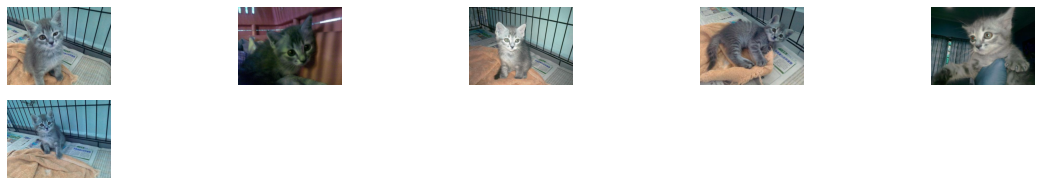

In [224]:
petID=train_df['PetID'].iloc[8]
imageList,imageCount = load_images(trainImagesPath, petID)
displayImages(imageList)

Building CNN Models:

What i have tried so far:

Data:
1. Using all the Data and pictures- heavy overfit  
2. Balance the Data to have the same amount of pictures per class - low ammount of accuracy around 22-23
3. Balancing the Data and adding 1000 more pictures for each class except class 0 who has low amounts of pictures - best results so far with 29-31%

Models:

1. Custom CNN Model
2. VGG16 non trainable
3. VGG16 all trainable with imagenet weights
4. VGG16 all trainable with no weights
5. Resnet.

Models in Use:
1. VGG16 with trainable Imagenet weights -VGG1
2. VGG16 with without base Imagnetweights -VGG2

**I Wont Be training the VGG Models here live, it takes a couple hours to do so, I will load the Weights i have trained before**

Uncomment the next sections to train the VGG Model

Let's start by building a dataframe for all ImageURLs and their adoptionSpeed so we can use it to train our models.

In [ ]:
trainCNN_df=train_df.copy()
trainCNN_df=trainCNN_df[trainCNN_df.PhotoAmt!=0]

image_df=[]
for index, row in trainCNN_df.iterrows(): 
    imageList,imageCount = load_images(trainImagesPath, row['PetID'])
    if imageCount==0:
        continue
    speed=row['AdoptionSpeed']
    for image in imageList:
        image_df.append([image,speed])
                                                             
print(f' we found: {len(image_df)} amount of pictures in the database')
image_df = pd.DataFrame(image_df, columns=['ImageURL','Speed'])

image_df['Speed']=image_df['Speed'].astype(str)


sneakpeak into the new dataframe:

In [ ]:
image_df

Here we will balance the classes in our image_df to try and prevent overfit to the popular classes only, i will add 1000 moure pictures for classes 1-4 to combat the underfit that we get by using so little data.

In [ ]:
               
image_df['Speed']=image_df['Speed'].astype(str)
image_df0=image_df.loc[image_df['Speed']=='0']
image_df1=image_df.loc[image_df['Speed']=='1']
image_df2=image_df.loc[image_df['Speed']=='2']
image_df3=image_df.loc[image_df['Speed']=='3']
image_df4=image_df.loc[image_df['Speed']=='4']

image_df1=image_df1.sample(n=len(image_df0)+1000)
image_df2=image_df2.sample(n=len(image_df0)+1000)
image_df3=image_df3.sample(n=len(image_df0)+1000)
image_df4=image_df4.sample(n=len(image_df0)+1000)

image_dfBalanced=image_df0.append([image_df1,image_df2,image_df3,image_df4])
image_dfBalanced['Speed'].value_counts()

We want to have the same amount of pictures per class in train and validation sets (to prevent situiatons like there are only 100 pictures from classes 0-3 in validation and the rest are from class 4 only)

we will be using train_test_split with stratify to make sure we have the right balance between sets.

In [ ]:
pics=image_dfBalanced['ImageURL']
label=image_dfBalanced['Speed']
val_split = 0.20
X_train, X_val, y_train, y_val = train_test_split(pics, label, test_size=val_split,stratify=label)

train_balancedCNN = np.concatenate((X_train, y_train))
val_balancedCNN = np.concatenate((X_val, y_val))

train_balancedCNN=pd.DataFrame(list(zip(X_train, y_train)),
              columns=['ImageURL','Speed'])

val_balancedCNN=pd.DataFrame(list(zip(X_val,y_val)),
              columns=['ImageURL','Speed'])

print(f' the length of train set is: {len(train_balancedCNN)},the length of validation set is: {len(val_balancedCNN)}')

we will use Tensorflow and Keras to make our VGG16 Model first.

* we are using plenty of data augmention techniques to help us prevent overfit.
* we are resizing each picutre to 112,112(half of the normal size for vgg16) so we can train faster.
* This model uses imagnet weights as a baseline and train upon them, i also removed the top of VGG16 and add Dense layer and Softmax layer.
* Training the model for 80 epochs took me around 8 hours so we wont be training the model live in the notebook due to 9 hours maximum sessions of kaggle.
* we are saving the weights everytime the model improve (determined by the validation accuracy) and loading up the weights that we want next when using the model for predicitons




In [ ]:
#VGG16 Model for training

datagen=ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode="nearest",
    horizontal_flip=True,
    validation_split=0.2) 
datagen2=ImageDataGenerator(validation_split=0.99,rescale=1.0/255.0) 

train_generator=datagen.flow_from_dataframe(dataframe=train_balancedCNN, x_col="ImageURL", y_col="Speed", class_mode="categorical", target_size=(112,112), batch_size=32,subset="training",shuffle=True,color_mode="rgb")
valid_generator=datagen2.flow_from_dataframe(dataframe=val_balancedCNN, x_col="ImageURL", y_col="Speed", class_mode="categorical", target_size=(112,112), batch_size=32,subset="validation",shuffle=True,color_mode="rgb")

## Loading VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(112,112,3))
#base_model.trainable = False ## Not trainable weights

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(5, activation='softmax')
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.1,
        decay_steps=10000,
        decay_rate=0.90)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)
model.compile(
        loss='categorical_crossentropy',
        optimizer='SGD',
        metrics=['accuracy']
    )

filepath = "VGG16-{epoch:02d}-{val_accuracy:.2f}.hdf5"  # the new name for the model

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,
                                                    mode='max')
callbacks_list = [checkpoint]

print(model.summary())
epochs=80
history=model.fit(train_generator
                    ,validation_data=valid_generator, epochs=epochs, batch_size=32, callbacks=callbacks_list)

Plotting graphs for VGG Model1 

I used the weights when getting to 0.27 val accuracy, I could take the 0.29 weights but I would have reached overfit according to the graph.

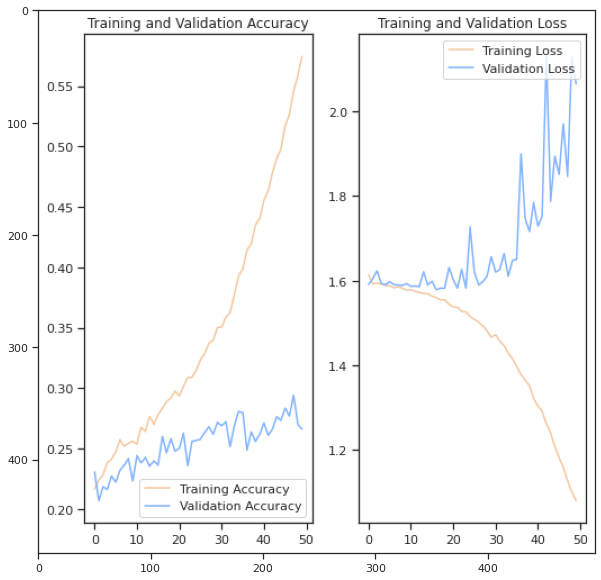

In [225]:
image = cv2.imread('../input/cnn-models-petfinder/VGG029.4.png')
plt.figure(figsize = (10,10))
plt.imshow(image)



In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Natural language processing Models - Bert, LSTM.

What i have tried:

1. LSTM models in many aritchtures , had problems with GPU memory and low accuracy after solving some of them by making a smaller network -  not used anymore

2. Bert Model - different bert models from tensorflowhub, different split of data and balancing.

* Using the Full Data lead to overfitting label 4 and classifing around 50% of the data to it...

* I also tried to train Bert with a balance between all classes but that lead to low amount of training data due to the low amount of posts labeled as AdoptionSpeed=0 and low accuracy.
 
* my last attempt was to start with a balance between classes and add 200-300 more description data to the other 4 classes, This attempt was the most successfull but i fear to underfit the data with so little data...






Helpful links that i have studied from the topic of NLP:

https://www.udemy.com/course/nlp-natural-language-processing-with-python/ - Great Udemy course who helped me start the journey.

https://jalammar.github.io/illustrated-word2vec/

https://www.coursera.org/learn/nlp-sequence-models?specialization=deep-learning - coursera course on Sequence Models by DeepLearning.AI

https://www.tensorflow.org/tutorials/keras/text_classification_with_hub - tensorflow text guides

https://www.tensorflow.org/text/tutorials/text_classification_rnn - another tensorflow guide for simple RNN LSTM

https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/ - Bert guide


We will be using Bert from tensorflow, https://tfhub.dev/google/collections/bert/1, we will be using a small bert to train faster.

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1")

balancing the classes to try and prevent overfit, while adding a bit more data to 1-4 classes

In [ ]:
text_train_df=train_df.copy()
                     
text_df0=text_train_df.loc[text_train_df['AdoptionSpeed']==0]
text_df1=text_train_df.loc[text_train_df['AdoptionSpeed']==1]
text_df2=text_train_df.loc[text_train_df['AdoptionSpeed']==2]
text_df3=text_train_df.loc[text_train_df['AdoptionSpeed']==3]
text_df4=text_train_df.loc[text_train_df['AdoptionSpeed']==4]

print(len(text_df0))
print(len(text_df1))
print(len(text_df2))
print(len(text_df3))
print(len(text_df4))
text_df1=text_df1.sample(n=len(text_df0)+200)
text_df2=text_df2.sample(n=len(text_df0)+300)
text_df3=text_df3.sample(n=len(text_df0)+200)
text_df4=text_df4.sample(n=len(text_df0)+300)

text_dfBalanced=text_df0.append([text_df1,text_df2,text_df3,text_df4])

text_train_df=text_dfBalanced[['Description','AdoptionSpeed']]
text_train_df

X_train, X_test, y_train, y_test = train_test_split(text_train_df['Description'],text_train_df['AdoptionSpeed'],train_size=0.8,stratify=text_train_df['AdoptionSpeed'])
text_train_df

Building 3 more layers above Bert to classify our classes

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.2, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(256, activation='relu', name="DENSE")(l)
l = tf.keras.layers.Dense(5, activation='softmax', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])
model.summary()

Training the model and saving checkpoints every val accuracy improvment

In [ ]:
filepath = "BERTsomebalance200-{epoch:02d}-{val_accuracy:.2f}.hdf5"  # the new name for the model

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,
                                                    mode='max')
callbacks_list = [checkpoint]

epochs=50
model.compile(optimizer='Adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=epochs ,validation_data=((X_test,y_test)),
    batch_size=32,callbacks=callbacks_list)

I Stopped training the Bert model when it reached 0.3 Validation Accuracy

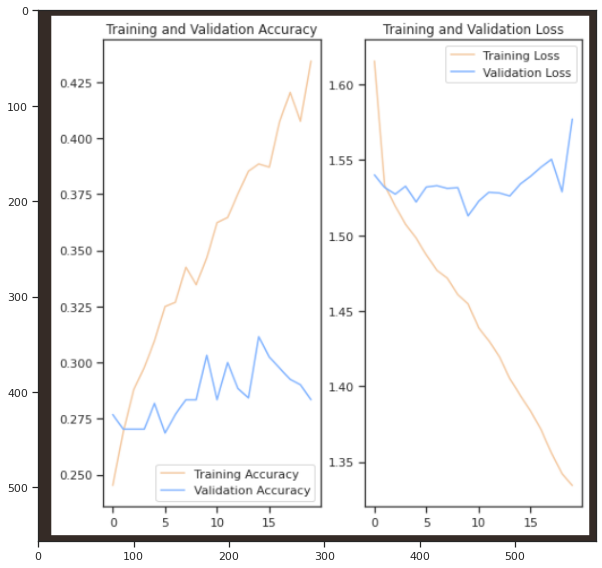

In [227]:
image = cv2.imread('../input/cnn-models-petfinder/Bert.png')
plt.figure(figsize = (10,10))
plt.imshow(image)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# LSTM - leftovers, not used anymore.
the Idea was to use the Lematized column from the EDA instead of using the Description and Bert preprocess, the idea didnt go well, the Accuracy was low and tended to overfit really quickly after overcoming plenty of bug and GPU memory problms...

I will leave the code here maybe i will get an idea how to improve it later.

In [ ]:
"""
def get_sequences(texts, tokenizer, train=True, max_seq_length=None):
    sequences = tokenizer.texts_to_sequences(texts)
    
    if train == True:
        max_seq_length = np.max(list(map(len, sequences)))
    
    sequences = pad_sequences(sequences, maxlen=max_seq_length, padding='post')
    
    return sequences
def preprocess_inputs(df):
    df = df.copy()
    
    # Limit data to only the review and rating column
    y = df['AdoptionSpeed']
    X = df['lemmatized'] #changed from Description to lemmatized
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)
    
    # Fit tokenizer
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_train)
    print("Vocab length:", len(tokenizer.word_index) + 1)
    
    # Convert texts to sequences
    X_train = get_sequences(X_train, tokenizer, train=True)
    X_test = get_sequences(X_test, tokenizer, train=False, max_seq_length=X_train.shape[1])
    
    return X_train, X_test, y_train, y_test, tokenizer
    """

In [ ]:
"""text_df0=train_RNN.loc[train_RNN['AdoptionSpeed']==0]
text_df1=train_RNN.loc[train_RNN['AdoptionSpeed']==1]
text_df2=train_RNN.loc[train_RNN['AdoptionSpeed']==2]
text_df3=train_RNN.loc[train_RNN['AdoptionSpeed']==3]
text_df4=train_RNN.loc[train_RNN['AdoptionSpeed']==4]

print(len(text_df0))
print(len(text_df1))
print(len(text_df2))
print(len(text_df3))
print(len(text_df4))
text_df1=text_df1.sample(n=len(text_df0)+500)
text_df2=text_df2.sample(n=len(text_df0)+500)
text_df3=text_df3.sample(n=len(text_df0)+500)
text_df4=text_df4.sample(n=len(text_df0)+500)

text_dfBalanced=text_df0.append([text_df1,text_df2,text_df3,text_df4])
                                

X_train, X_test, y_train, y_test, t = preprocess_inputs(text_dfBalanced)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


inputs = tf.keras.Input(shape=(264,))
x = tf.keras.layers.Embedding(input_dim=19606,output_dim=64)(inputs)
x= tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True))(x)

x= tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True))(x)

x= tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16))(x)

x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1, name="dropout1")(x)


outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.1,
        decay_steps=10000,
        decay_rate=0.90)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
optimizer='adam'
    
model.compile(
    loss='SparseCategoricalCrossentropy', optimizer=optimizer, metrics=['accuracy'])
   
history = model.fit(
    X_train,
    y_train,
    validation_data=((X_test,y_test)),
    batch_size=16,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=25,
            restore_best_weights=True
        )
    ]
)
"""

# Ensembling all models to one main Model to rule them all!

The Plan is to use all 5 Models to create a dataframe who will record all of their predictions.

after that train a XGB or ADABoost model on the dataframe as the last Model to rule them all!




**ABORT ABORT THE PLAN!**
after many tests i have finaly improved my Kappa score to 0.2495, Kappa score ranges between -1 to 1 so i guess that's fine for my first Kaggle Competition.

* I tried to make a dataframe from all 5 models and put another model on top of it to predict the label, after that i tried to use a voting scheme so all the models would be equal - didnt work it just got worse and fell to 0.2 kappa score.
* in the end i decided to take Ensemble_df and append to it dummay varaibles based on Bert and two VGG predictions,after that i used XGBModel to predict the labels, this way got me to 0.2495 Kappa score.

Here is a small usefull function that i have used and can use in the future to check the differnce between two models predictions

In [151]:
def find_percentage_agreement(s1, s2): # Small function to see the differnce between model predictions
    assert len(s1)==len(s2), "Lists must have the same shape"
    nb_agreements = 0  # initialize counter to 0
    for idx, value in enumerate(s1):
        if s2[idx] == value:
            nb_agreements += 1

    percentage_agreement = nb_agreements/len(s1)

    return percentage_agreement


# Building the Main_DF from scratch:

Use our XGB and ADA Models to make predictions on ensemble database who holds our preprocessed data

we will build a dataframe called Main_df who will hold all model predictions.

In [ ]:
XGB_ADA_df=ensemble_df.copy()
Main_df=ensemble_df.copy()
Main_df.drop(Main_df.columns.difference(['PetID','AdoptionSpeed']), 1, inplace=True)
#XGB_ADA_df=XGB_ADA_df.drop(['AdoptionSpeed'],axis=1)
XGB_ADA_df=XGB_ADA_df.drop(['PetID','Description','AdoptionSpeed'],axis=1)
#all(XGB_ADA_df==trainData)
XGB_pred = XGBmodel.predict(XGB_ADA_df)
ADA_pred = ADAmodel.predict(XGB_ADA_df)

Main_df['XGBSpeedPredict'] = XGB_pred
Main_df['ADASpeedPredict'] = ADA_pred

In [ ]:
Main_df

**Adding Bert Model**

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1")

# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.2, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(256, activation='relu', name="DENSE")(l)

l = tf.keras.layers.Dense(5, activation='softmax', name="output")(l)

# Use inputs and outputs to construct a final model
BERTmodel = tf.keras.Model(inputs=[text_input], outputs = [l])

BERTmodel.load_weights('../input/cnn-models-petfinder/BERT-0.31.hdf5')

In [ ]:
Bert_df=ensemble_df.copy()

Bert_pred = BERTmodel.predict(Bert_df['Description'])

Bert_pred = Bert_pred.argmax(axis=-1)  # declaring the winner of the elections
Main_df['BertPrediction'] = Bert_pred



In [ ]:
Main_df

Adding predictions from our Computer visions models, **It takes a lot of time to run!**

We will make predictions on every photo that is tied to a post, after that we will choose the label with the got the highest prediciton score all acros the photos.



In [ ]:
VGGmodel1 = tf.keras.models.load_model('../input/cnn-models-petfinder/NewModelVGG (1).hdf5VGG 0.297.hdf5') 
VGGmodel2Stra = tf.keras.models.load_model('../input/cnn-models-petfinder/VGG STRA 0.29Imagnet.hdf5') 

FullPredictions=[]
j=0

class_names = ["0", '1', '2','3','4']
for index, row in ensemble_df.iterrows():
    if(j%1000==0):
        print(j)
    j+=1
    imageList,imageCount = load_images(trainImagesPath, row['PetID'])
    
    if imageCount==0:
        continue
    SpeedProb1=[0,0,0,0,0]
    SpeedProb2=[0,0,0,0,0]
    for image in imageList:
                    currentImage=cv2.imread(image)
                    resized_image = cv2.resize(currentImage, (112, 112)) 
                    img_array = tf.keras.preprocessing.image.img_to_array(resized_image)
                    img_array = tf.expand_dims(img_array, 0)
                    SpeedProb1 += VGGmodel1.predict(img_array)[0]  
                    SpeedProb2 += VGGmodel2Stra.predict(img_array)[0]  
    predictedSpeedVGG1 = class_names[np.argmax(SpeedProb1)]  # declaring the winner of the elections
    predictedSpeedVGG2 = class_names[np.argmax(SpeedProb2)]  # declaring the winner of the elections

    ##### add predictions from all models
    FullPredictions.append([row['PetID'],predictedSpeedVGG1,predictedSpeedVGG2])

       
FullPredictions= pd.DataFrame(FullPredictions, columns=['PetID','AdoptionPredictedVGG1','AdoptionPredictedVGG2'])

Main_df=Main_df.merge(FullPredictions, on='PetID', how='left')


In [ ]:
Main_df

Now we can see that some of our rows has NAN value in the Adoption by Computer Vision, that is because some of the posts doesnt have photos!
we will replace all NAN values by 4 , we already know form our EDA that posts without photos had 38% adoption rate! that is 62% posts with the label 4!

In [ ]:

Main_df['AdoptionPredictedVGG1'] = Main_df['AdoptionPredictedVGG1'].replace(np.nan, 4)
Main_df['AdoptionPredictedVGG2'] = Main_df['AdoptionPredictedVGG2'].replace(np.nan, 4)

Main_df[['AdoptionPredictedVGG1', 'AdoptionPredictedVGG2']] = Main_df[['AdoptionPredictedVGG1', 'AdoptionPredictedVGG2']].astype('int64')

Main_df.to_csv('Main_train_df.csv',index=False)
Main_df


# Loading up Main_df file

Getting predictions from all 5 models takes a lot of time, that's why we save the prediction table to CSV and now load it !

Merging the prediction with ensemble_df

In [194]:
Main_df = pd.read_csv('../input/cnn-models-petfinder/Main_train_dfNIGHTT.csv')
Main_data=Main_df.copy()
Main_data.drop(['AdoptionSpeed'],axis=1,inplace=True)

backup=ensemble_df.copy()
Main_data=ensemble_df.merge(Main_data, on='PetID')
Main_data

Age  MaturitySize  FurLength  Quantity  \
0      0.046875      0.000000        0.0       0.0   
1      0.015625      0.333333        0.5       0.0   
2      0.046875      0.333333        0.0       0.0   
3      0.187500      0.333333        1.0       0.0   
4      0.031250      0.333333        0.5       0.0   
...         ...           ...        ...       ...   
13688  0.046875      0.333333        0.5       0.0   
13689  0.937500      0.333333        0.5       0.0   
13690  0.375000      0.333333        0.5       0.0   
13691  0.093750      0.000000        1.0       0.0   
13692  0.015625      0.333333        0.0       0.0   

                                             Description      PetID  PhotoAmt  \
0      Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3  0.071429   
1      I just found it alone yesterday near my apartm...  6296e909a  0.142857   
2      This is a stray kitten that came to my house. ...  d24c30b4b  0.142857   
3      anyone within the area of ipoh or taiping who ...  1caa6fcdb  0.214286   
4      healthy and active, feisty kitten found in nei...  c06d167ca  0.428571   
...                                                  ...        ...       ...   
13688  He is very intelligent and cute. Fluffy and lo...  cca88204d  0.500000   
13689                              abandoned,but healthy  f5dc70d35  0.071429   
13690  been at my place for a while..am hoping to fin...  e7f7066b6  0.000000   
13691                                              ooooo  4d163b731  0.071429   
13692  Fili just loves laying around and also loves b...  a83d95ead  0.071429   

       AdoptionSpeed  DescriptonWordsCount  Type_1  Type_2  Gender_Female  \
0                  2              0.266409       0       1              0   
1                  0              0.088803       0       1              0   
2                  2              0.069498       0       1              1   
3                  1              0.301158       0       1              0   
4                  1              0.050193       0       1              1   
...              ...                   ...     ...     ...            ...   
13688              2              0.146718       1       0              0   
13689              4              0.007722       1       0              1   
13690              4              0.054054       1       0              0   
13691              0              0.003861       1       0              1   
13692              3              0.061776       1       0              0   

       Gender_Male  Gender_Mixed  Vaccinated_1  Vaccinated_2  Vaccinated_3  \
0                1             0             0             1             0   
1                1             0             0             0             1   
2                0             0             0             1             0   
3                1             0             0             1             0   
4                0             0             0             1             0   
...            ...           ...           ...           ...           ...   
13688            1             0             1             0             0   
13689            0             0             0             0             1   
13690            1             0             0             0             1   
13691            0             0             1             0             0   
13692            1             0             0             1             0   

       Dewormed_1  Dewormed_2  Dewormed_3  Sterilized_1  Sterilized_2  \
0               0           1           0             0             1   
1               0           0           1             0             0   
2               0           1           0             0             1   
3               0           1           0             0             0   
4               0           1           0             0             1   
...           ...         ...         ...           ...           ...   
13688           1

Dropping out XGB and ADA prediction who were trained on the same data and lead to overfit!

In [195]:
Main_label=Main_df.copy()
Main_label.drop(['PetID','XGBSpeedPredict','ADASpeedPredict','BertPrediction','AdoptionPredictedVGG1','AdoptionPredictedVGG2'], axis=1, inplace=True)
Main_data.drop(['XGBSpeedPredict','ADASpeedPredict'], axis=1, inplace=True)

#Main_data['XGBSpeedPredict'] = pd.Categorical(Main_data.XGBSpeedPredict)
#Main_data['ADASpeedPredict'] = pd.Categorical(Main_data.ADASpeedPredict)
Main_data['BertPrediction'] = pd.Categorical(Main_data.BertPrediction)
Main_data['AdoptionPredictedVGG1'] = pd.Categorical(Main_data.AdoptionPredictedVGG1)
Main_data['AdoptionPredictedVGG2'] = pd.Categorical(Main_data.AdoptionPredictedVGG2)
Main_data.drop(['PetID','Description','AdoptionSpeed'], axis=1, inplace=True)

Main_data=pd.get_dummies(Main_data,columns=['AdoptionPredictedVGG2','AdoptionPredictedVGG1','BertPrediction'])
Main_data


Age  MaturitySize  FurLength  Quantity  PhotoAmt  \
0      0.046875      0.000000        0.0       0.0  0.071429   
1      0.015625      0.333333        0.5       0.0  0.142857   
2      0.046875      0.333333        0.0       0.0  0.142857   
3      0.187500      0.333333        1.0       0.0  0.214286   
4      0.031250      0.333333        0.5       0.0  0.428571   
...         ...           ...        ...       ...       ...   
13688  0.046875      0.333333        0.5       0.0  0.500000   
13689  0.937500      0.333333        0.5       0.0  0.071429   
13690  0.375000      0.333333        0.5       0.0  0.000000   
13691  0.093750      0.000000        1.0       0.0  0.071429   
13692  0.015625      0.333333        0.0       0.0  0.071429   

       DescriptonWordsCount  Type_1  Type_2  Gender_Female  Gender_Male  \
0                  0.266409       0       1              0            1   
1                  0.088803       0       1              0            1   
2                  0.069498       0       1              1            0   
3                  0.301158       0       1              0            1   
4                  0.050193       0       1              1            0   
...                     ...     ...     ...            ...          ...   
13688              0.146718       1       0              0            1   
13689              0.007722       1       0              1            0   
13690              0.054054       1       0              0            1   
13691              0.003861       1       0              1            0   
13692              0.061776       1       0              0            1   

       Gender_Mixed  Vaccinated_1  Vaccinated_2  Vaccinated_3  Dewormed_1  \
0                 0             0             1             0           0   
1                 0             0             0             1           0   
2                 0             0             1             0           0   
3                 0             0             1             0           0   
4                 0             0             1             0           0   
...             ...           ...           ...           ...         ...   
13688             0             1             0             0           1   
13689             0             0             0             1           0   
13690             0             0             0             1           0   
13691             0             1             0             0           1   
13692             0             0             1             0           0   

       Dewormed_2  Dewormed_3  Sterilized_1  Sterilized_2  Sterilized_3  \
0               1           0             0             1             0   
1               0           1             0             0             1   
2               1           0             0             1             0   
3               1           0             0             0             1   
4               1           0             0             1             0   
...           ...         ...           ...           ...           ...   
13688           0           0             0             1             0   
13689           0           1             0             0             1   
13690           0           1             0             1             0   
13691           0           0             0             1             0   
13692           1           0             0             1             0   

       Health_1  Health_2  Health_3  \
0             1         0         0   
1             1         0         0   
2             1         0         0   
3             1         0         0   
4             1         0         0   
...         ...       ...       ...   
13688         1         0         0   
13689         1         0         0   
13690         1         0         0   
13691         1         0         0   
13692         1         0         0   

       RescuerID_000a5830787b64da2d61b0bbceb767

# One Model to rule them all!

# GridSearch for XGBoost Main_df

In [196]:
data_dmatrix = xgb.DMatrix(data=Main_data,label=Main_label)
X_train, X_test, y_train, y_test = train_test_split(Main_data, Main_label, test_size=0.30, random_state=99,stratify =Main_label)


In [ ]:
params={
    "learning_rate": [0.1,0.15,0.2,],
    "colsample_bytree" : [0.5,0.8],
        'gamma': [0.35,0.4],
        'subsample': [0.9],
        'colsample_bytree': [0.9],
        "min_child_weight" : [ 1 ],
        'max_depth': [3,4,5],
        'n_estimators' : [40,30,50],
        'alpha': [0.5],
        'objective': 'multi:softprob'
    
        }

In [ ]:
"""classifier=XGBClassifier(use_label_encoder=False)
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=108,cv=5,verbose=3)

from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable
print(random_search.best_estimator_)
print(random_search.best_params_)"""

Making predictions with XGB model 

In [212]:
accuracysum=0
quadratic_kappasum=0
MainXGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
          colsample_bynode=1, colsample_bytree=0.8, gamma=0.35, gpu_id=-1,
          importance_type='gain', interaction_constraints='',
          learning_rate=0.1, max_delta_step=0, max_depth=20,
          min_child_weight=1, monotone_constraints='()',
          n_estimators=175, n_jobs=-1, num_parallel_tree=1,
          objective='multi:softprob', random_state=0, reg_alpha=0,
          reg_lambda=1, scale_pos_weight=None, subsample=0.8,
          tree_method='exact', validate_parameters=1,alpha=0.25, verbosity=None,use_label_encoder =False)
              
    
MainXGBmodel.fit(X_train, y_train)
y_pred = MainXGBmodel.predict(X_test)
predictions = [round(value) for value in y_pred]
#print(predictions)
print(len(predictions))
#print(list(y_test['AdoptionSpeed']))
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
accuracysum+=accuracy *100.0
quadratic_kappasum+=quadratic_kappa(list(y_test['AdoptionSpeed']), predictions)
    
print(accuracy * 100.0,quadratic_kappa(list(y_test['AdoptionSpeed']), predictions))

[08:37:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


3424
0.4485981308411215
44.85981308411215 0.3803563655216602


We can see that the new predictions from VGG and Bert got to the top 40 and even starring in the top 20!

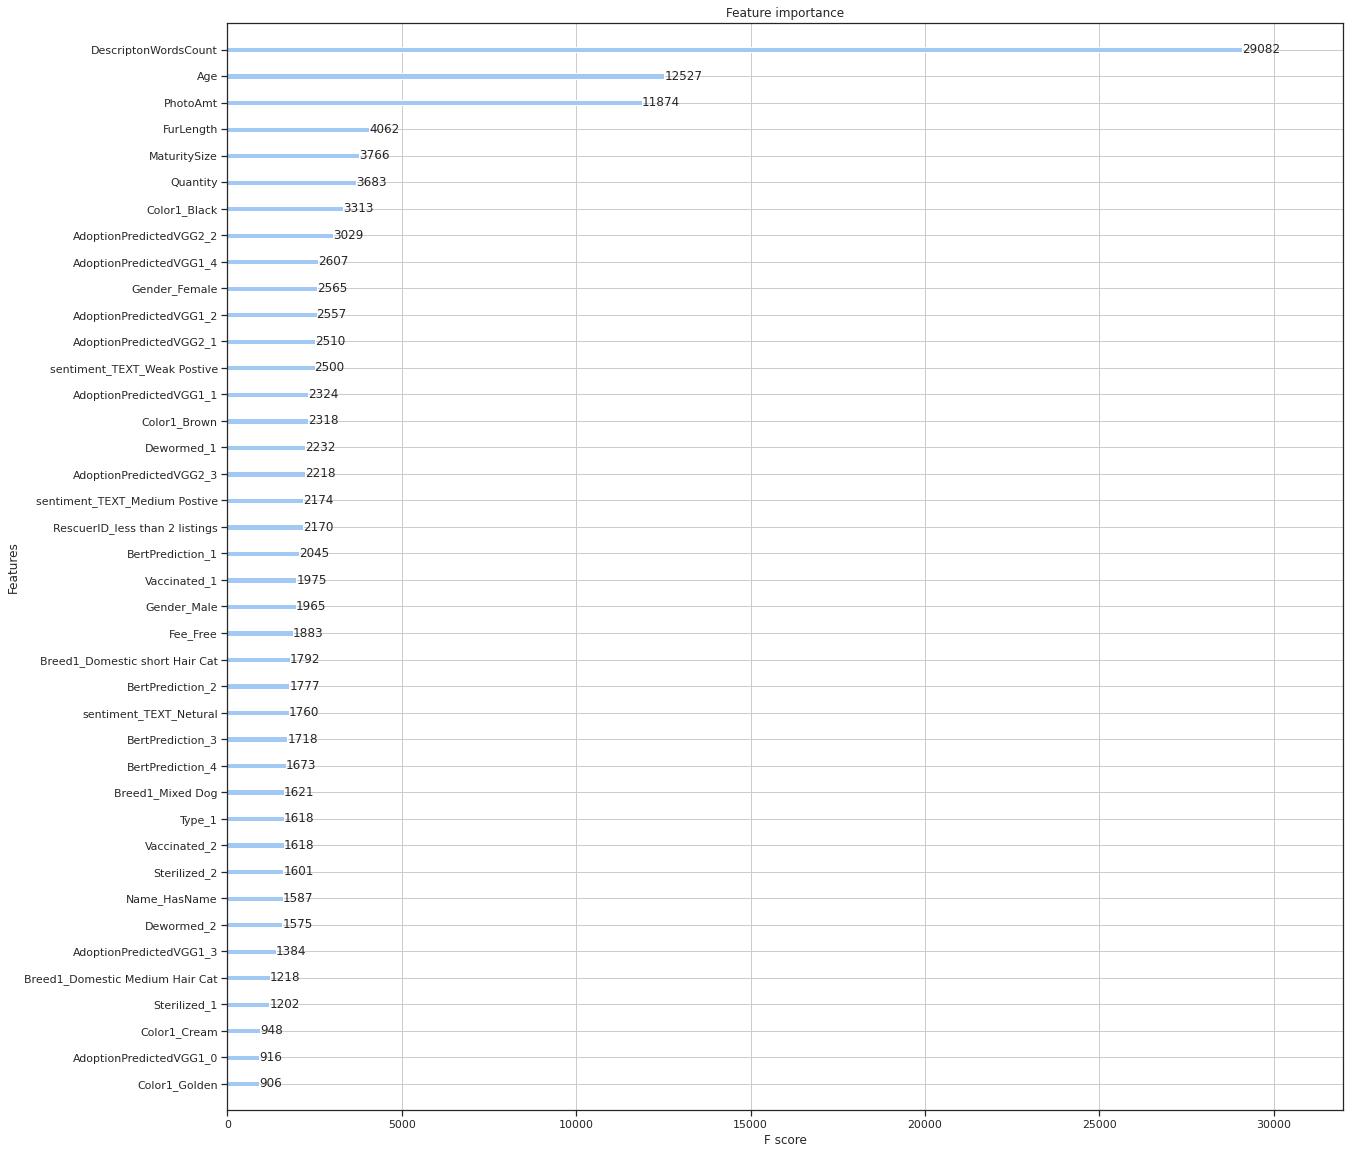

In [213]:
ax=xgb.plot_importance(MainXGBmodel,max_num_features=40)
fig = ax.figure
fig.set_size_inches(20, 20)


# Training ADABOOST

In [199]:
accuracysum=0
quadratic_kappasum=0
NumRandomStates=1
for i in range(NumRandomStates): #100
        
    X_train, X_test, y_train, y_test = train_test_split(Main_data, Main_label, test_size=0.25, random_state=1000*i,stratify =Main_label)
    Main_ADAmodel = AdaBoostClassifier( 
              n_estimators=1000,random_state=1000*i,learning_rate =0.1)

    Main_ADAmodel.fit(X_train, y_train)
    y_pred = Main_ADAmodel.predict(X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    accuracysum+=accuracy *100.0
    quadratic_kappasum+=quadratic_kappa(list(y_test['AdoptionSpeed']), predictions)
    
    print(accuracy * 100.0,quadratic_kappa(list(y_test['AdoptionSpeed']), predictions))    

print(f'Accuracy Sum over {NumRandomStates} RandomStates is:{accuracysum/NumRandomStates}')
print(f'Quadratic Kappa Sum over {NumRandomStates} RandomStates is:{quadratic_kappasum/NumRandomStates}')

    
  

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


41.64719626168225 0.3347706621007991
Accuracy Sum over 1 RandomStates is:41.64719626168225
Quadratic Kappa Sum over 1 RandomStates is:0.3347706621007991


# Building Test predictions Dataframe for Kaggle submission

If we need to build the Test set from scratch use the code below, otherwise continue to load the data that is already prepared later in the code

In [ ]:
Test_XGB_ADA_df=TestEnsemble_df.copy()
Test_Main_df=TestEnsemble_df.copy()
Test_XGB_ADA_df=Test_XGB_ADA_df.drop(['AdoptionSpeed','PetID','Description'],axis=1)

Test_Main_df.drop(Test_Main_df.columns.difference(['PetID']), 1, inplace=True)
Test_XGB_pred = XGBmodel.predict(Test_XGB_ADA_df)
Test_ADA_pred = ADAmodel.predict(Test_XGB_ADA_df)

Test_Main_df['XGBSpeedPredict'] = Test_XGB_pred
Test_Main_df['ADASpeedPredict'] = Test_ADA_pred
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1")

# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.2, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(256, activation='relu', name="DENSE")(l)

l = tf.keras.layers.Dense(5, activation='softmax', name="output")(l)

# Use inputs and outputs to construct a final model
BERTmodel = tf.keras.Model(inputs=[text_input], outputs = [l])

BERTmodel.load_weights('../input/cnn-models-petfinder/BERT-0.31.hdf5')
Test_Bert_df=TestEnsemble_df.copy()

Test_Bert_pred = BERTmodel.predict(Test_Bert_df['Description'])

Test_Bert_pred = Test_Bert_pred.argmax(axis=-1)  # declaring the winner of the elections
Test_Main_df['BertPrediction'] = Test_Bert_pred
VGGmodel1 = tf.keras.models.load_model('../input/cnn-models-petfinder/NewModelVGG (1).hdf5VGG 0.297.hdf5') 
VGGmodel2Stra = tf.keras.models.load_model('../input/cnn-models-petfinder/VGG STRA 0.29Imagnet.hdf5') 

#CNNmodel = tf.keras.models.load_model('../input/cnn-models-petfinder/VGG02.68.hdf5') # need to check tomorrow didnt see it yet 
FullPredictions=[]
j=0

class_names = ["0", '1', '2','3','4']
for index, row in TestEnsemble_df.iterrows():
    if(j%1000==0):
        print(j)
    j+=1
    imageList,imageCount = load_images(testImagesPath, row['PetID'])
    
    
    if imageCount==0:
        continue
    SpeedProb1=[0,0,0,0,0]
    SpeedProb2=[0,0,0,0,0]
    for image in imageList:
                    currentImage=cv2.imread(image)
                    resized_image = cv2.resize(currentImage, (112, 112)) 
                    #gray = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)
                    img_array = tf.keras.preprocessing.image.img_to_array(resized_image)
                    img_array = tf.expand_dims(img_array, 0)
                    SpeedProb1 += VGGmodel1.predict(img_array)[0]  # each char cast a vote
                    SpeedProb2 += VGGmodel2Stra.predict(img_array)[0]  # each char cast a vote

    
    #print(SpeedProb, VGGmodel.predict_classes(img_array))   
    predictedSpeedVGG1 = class_names[np.argmax(SpeedProb1)]  # declaring the winner of the elections
    predictedSpeedVGG2 = class_names[np.argmax(SpeedProb2)]  # declaring the winner of the elections

    #print(predictedSpeedVGG1,predictedSpeedVGG2)
    ##### add predictions from all models
    FullPredictions.append([row['PetID'],predictedSpeedVGG1,predictedSpeedVGG2])

       
FullPredictions= pd.DataFrame(FullPredictions, columns=['PetID','AdoptionPredictedVGG1','AdoptionPredictedVGG2'])

Test_Main_df=Test_Main_df.merge(FullPredictions, on='PetID', how='left')
Test_Main_df['AdoptionPredictedVGG1'] = Test_Main_df['AdoptionPredictedVGG1'].replace(np.nan, 4)
Test_Main_df['AdoptionPredictedVGG2'] = Test_Main_df['AdoptionPredictedVGG2'].replace(np.nan, 4)

Test_Main_df[['AdoptionPredictedVGG1', 'AdoptionPredictedVGG2']] = Test_Main_df[['AdoptionPredictedVGG1', 'AdoptionPredictedVGG2']].astype('int64')

Test_Main_df.to_csv('TestPredictions.csv',index=False)



# Load the Test Data 

**Load the Data and make predictions**

Just like in the training set we will do everything in the same way.

we have some columns that appeared only at train data so to be able to use the model to predict our test data we need to fill them up with 0 (some of these columns are RescuerID)

In [214]:
missing_cols = set( ensemble_df.columns ) - set( TestEnsemble_df.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    TestEnsemble_df[c] = 0
    
# Ensure the order of column in the test set is in the same order than in train set
TestEnsemble_df = TestEnsemble_df[ensemble_df.columns]
TestEnsemble_df

Test_Main_df = pd.read_csv('../input/cnn-models-petfinder/TestPredictionNightGood.csv')
backup2=TestEnsemble_df.copy()
Test_Main_df=TestEnsemble_df.merge(Test_Main_df, on='PetID')
Test_PetID=Test_Main_df.copy()
Test_Main_df

Age  MaturitySize  FurLength  Quantity  \
0     0.051282      0.000000        0.0  0.052632   
1     0.230769      0.333333        1.0  0.000000   
2     0.012821      0.333333        0.5  0.000000   
3     0.076923      0.333333        0.5  0.000000   
4     0.025641      0.333333        0.5  0.000000   
...        ...           ...        ...       ...   
3967  0.102564      0.000000        1.0  0.000000   
3968  0.076923      0.666667        0.5  0.000000   
3969  0.032051      0.333333        0.0  0.052632   
3970  0.192308      0.333333        0.0  0.000000   
3971  0.153846      0.333333        0.5  0.000000   

                                            Description      PetID  PhotoAmt  \
0     Dopey Age: 8mths old Male One half of a pair, ...  e2dfc2935  0.066667   
1     Please note that Chichi has been neutered, the...  f153b465f  0.033333   
2     Sticky, named such because of his tendency to ...  3c90f3f54  0.133333   
3     Extremely cuddly cat, hence the origin of his ...  09f0df7d1  0.166667   
4     Porridge the cat is looking for a place to cal...  0487529d4  0.100000   
...                                                 ...        ...       ...   
3967  It is my cousin's pet, she want to give for ad...  e7197c3e4  0.033333   
3968                                   Dog for adoption  34a2402b3  0.166667   
3969  Found on the streets. Treated for mange. They ...  ae57f8d52  0.166667   
3970  Very good guard dog. Healthy was found in Fron...  83432904d  0.066667   
3971  smokey is good family pet. very obedient,so lo...  fd80b8c80  0.100000   

      AdoptionSpeed  DescriptonWordsCount  Type_1  Type_2  Gender_Female  \
0                 0              0.149923       0       1              0   
1                 0              0.119011       0       1              1   
2                 0              0.146832       0       1              0   
3                 0              0.075734       0       1              0   
4                 0              0.148377       0       1              0   
...             ...                   ...     ...     ...            ...   
3967              0              0.111283       1       0              0   
3968              0              0.004637       1       0              0   
3969              0              0.032457       1       0              0   
3970              0              0.037094       1       0              0   
3971              0              0.029366       1       0              1   

      Gender_Male  Gender_Mixed  Vaccinated_1  Vaccinated_2  Vaccinated_3  \
0               1             0             1             0             0   
1               0             0             1             0             0   
2               1             0             1             0             0   
3               1             0             1             0             0   
4               1             0             1             0             0   
...           ...           ...           ...           ...           ...   
3967            1             0             1             0             0   
3968            1             0             1             0             0   
3969            1             0             1             0             0   
3970            1             0             0             0             1   
3971            0             0             0             1             0   

      Dewormed_1  Dewormed_2  Dewormed_3  Sterilized_1  Sterilized_2  \
0              1           0           0             0             1   
1              1           0           0             1             0   
2              1           0           0             0             1   
3              1           0           0             1             0   
4              1           0           0             0             1   
...          ...         ...         ...           ...           ...   
3967           1           0           0             0             1   

In [216]:
Test_Main_df.drop(['XGBSpeedPredict','ADASpeedPredict'], axis=1, inplace=True)

#Test_Main_df['XGBSpeedPredict'] = pd.Categorical(Test_Main_df.XGBSpeedPredict)
#Test_Main_df['ADASpeedPredict'] = pd.Categorical(Test_Main_df.ADASpeedPredict)
Test_Main_df['BertPrediction'] = pd.Categorical(Test_Main_df.BertPrediction)
Test_Main_df['AdoptionPredictedVGG1'] = pd.Categorical(Test_Main_df.AdoptionPredictedVGG1)
Test_Main_df['AdoptionPredictedVGG2'] = pd.Categorical(Test_Main_df.AdoptionPredictedVGG2)

Test_Main_df=pd.get_dummies(Test_Main_df,columns=['AdoptionPredictedVGG2','AdoptionPredictedVGG1','BertPrediction'])
Test_Main_df.drop(['PetID','Description','AdoptionSpeed'], axis=1, inplace=True)
Test_Main_df


Age  MaturitySize  FurLength  Quantity  PhotoAmt  \
0     0.051282      0.000000        0.0  0.052632  0.066667   
1     0.230769      0.333333        1.0  0.000000  0.033333   
2     0.012821      0.333333        0.5  0.000000  0.133333   
3     0.076923      0.333333        0.5  0.000000  0.166667   
4     0.025641      0.333333        0.5  0.000000  0.100000   
...        ...           ...        ...       ...       ...   
3967  0.102564      0.000000        1.0  0.000000  0.033333   
3968  0.076923      0.666667        0.5  0.000000  0.166667   
3969  0.032051      0.333333        0.0  0.052632  0.166667   
3970  0.192308      0.333333        0.0  0.000000  0.066667   
3971  0.153846      0.333333        0.5  0.000000  0.100000   

      DescriptonWordsCount  Type_1  Type_2  Gender_Female  Gender_Male  \
0                 0.149923       0       1              0            1   
1                 0.119011       0       1              1            0   
2                 0.146832       0       1              0            1   
3                 0.075734       0       1              0            1   
4                 0.148377       0       1              0            1   
...                    ...     ...     ...            ...          ...   
3967              0.111283       1       0              0            1   
3968              0.004637       1       0              0            1   
3969              0.032457       1       0              0            1   
3970              0.037094       1       0              0            1   
3971              0.029366       1       0              1            0   

      Gender_Mixed  Vaccinated_1  Vaccinated_2  Vaccinated_3  Dewormed_1  \
0                0             1             0             0           1   
1                0             1             0             0           1   
2                0             1             0             0           1   
3                0             1             0             0           1   
4                0             1             0             0           1   
...            ...           ...           ...           ...         ...   
3967             0             1             0             0           1   
3968             0             1             0             0           1   
3969             0             1             0             0           1   
3970             0             0             0             1           1   
3971             0             0             1             0           0   

      Dewormed_2  Dewormed_3  Sterilized_1  Sterilized_2  Sterilized_3  \
0              0           0             0             1             0   
1              0           0             1             0             0   
2              0           0             0             1             0   
3              0           0             1             0             0   
4              0           0             0             1             0   
...          ...         ...           ...           ...           ...   
3967           0           0             0             1             0   
3968           0           0             1             0             0   
3969           0           0             0             1             0   
3970           0           0             0             1             0   
3971           1           0             0             1             0   

      Health_1  Health_2  Health_3  \
0            1         0         0   
1            0         1         0   
2            1         0         0   
3            1         0         0   
4            1         0         0   
...        ...       ...       ...   
3967         1         0         0   
3968         1         0         0   
3969         1         0         0   
3970         1         0         0   
3971         1         0         0   

      RescuerID_000a5830787b64da2d61b0bbceb7676d  \
0                                              0   
1 

___________________ 

Make predictions with ADAModel and saving it to a CSV

In [217]:
Test_predictions = Main_ADAmodel.predict(Test_Main_df)
predictions2 = [round(value) for value in Test_predictions]
print(len(predictions2))
submission = pd.DataFrame({'PetID': Test_PetID['PetID'].values, 'AdoptionSpeed': predictions2})
submission.head()
submission.to_csv('submissionADA.csv', index=False)

3972


Make predictions with XGBModel and saving it to a CSV

In [218]:
Test_predictions = MainXGBmodel.predict(Test_Main_df)
predictions = [round(value) for value in Test_predictions]
print(len(predictions))
submission = pd.DataFrame({'PetID': Test_PetID['PetID'].values, 'AdoptionSpeed': predictions})
submission.head()
submission.to_csv('submissionXGB.csv', index=False)

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


3972


I Wonder how much ADABoost and XGBboost model agrees on the labels, 

59% that's nice, let's see who is the better model.

In [219]:
find_percentage_agreement(predictions, predictions2)

0.5944108761329305

___________________

# And the Winner Model is LastVersionXGB.csv  with 0.2495 kappa score!

If you reached to this point, you are awesome , this is my first time doing Kaggle Competitions and making a Datasciene project in this scale.


I'm not super happy with my Kappa score but the important part is that I learned a lot about the Data sceince world learned new skills in the field of EDA, NLP, CNN, Machine Learning, Deep Learing and I'm super grateful for that.

**This notebook took me countless days and nights to make and I Finally reached my destination!**

I Accomplished all my projects goals and now i can represent the Main Docuemnt I created to help Animal Shelter\ Individual Resucer make better Adoption post!

https://drive.google.com/file/d/1Ljp4Vg8qjqDdkzfjTGn9FnpyR3Efns6d/view?usp=sharing

Take this PDF and spread it! let us help our little friends find the Home they Deserve ♥



Stav Cohen.




